# Offsetcentroid Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pa
from scipy.io import readsav
from math import sqrt, pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import matplotlib as mpl
#import glob

In [2]:
plt.style.use('seaborn-pastel')

In [3]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [4]:
#file_LGS = "/../g/lu/data/keck_telemetry/*/*/*/*/*LGS*.sav"
#files_lgs = glob.glob(file_LGS)

In [5]:
#file_NGS = "/../g/lu/data/keck_telemetry/*/*/*/*/*NGS*.sav"
#files_ngs = glob.glob(file_LGS)

In [6]:
file = "n0098_LGS_trs (1).sav"
data = readsav(file)

In [7]:
data.header

array([b'SIMPLE  =                    T / Tape is in Fits format                         ',
       b'BITPIX  =                   32 / Bits per pixel                                 ',
       b'NAXIS   =                    2 / Number of axes                                 ',
       b'NAXIS1  =                 1024 / Number of pixels in axis 1                     ',
       b'NAXIS2  =                 1024 / Number of pixels in axis 2                     ',
       b'BSCALE  =              1.00000 / Scaling factor                                 ',
       b'BZERO   =              0.00000 / Scaling zero-point                             ',
       b"OUTDIR  = '/sdata901/nirc15/2017jul18/           ' / Original directory         ",
       b"ROOTNAME= 'n                 ' / File prefix                                    ",
       b'FRAMENO =                   98 / Frame number                                   ',
       b"FILENAME= 'n0098.fits        ' / Original File name                    

In [8]:
data.a.subapintensity[0].shape


(19072, 304)

## Plot for point 111

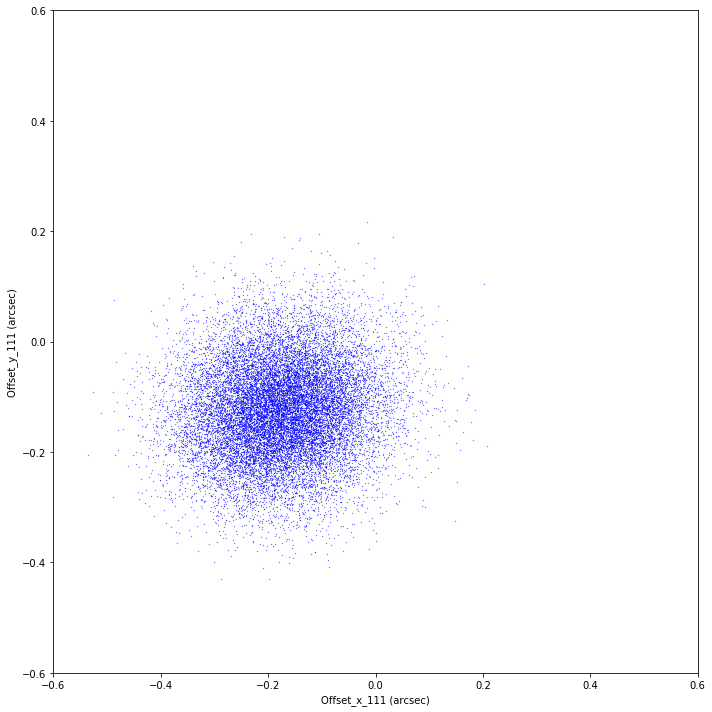

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (10, 10))
plt.scatter(data.a.offsetcentroid[0][:, 222], data.a.offsetcentroid[0][:, 223], c = 'b', s = 0.05, cmap = cm.RdBu)

plt.xlabel('Offset_x_111 (arcsec)')
plt.ylabel('Offset_y_111 (arcsec)')
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.tight_layout()
#plt.grid()
plt.show()

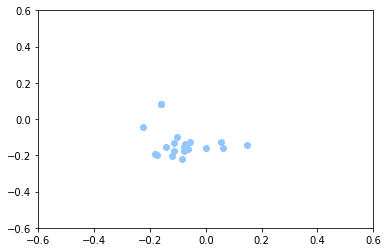

In [10]:
a = data.a.offsetcentroid[0][:, 222]
b = data.a.offsetcentroid[0][:, 223]

import matplotlib.animation


fig, ax = plt.subplots()
x, y = [],[]
sc = ax.scatter(x,y)
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)

def animate(i):
    x.append(a[i])
    y.append(b[i])
    sc.set_offsets(np.c_[x,y])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=19, interval=100, repeat=True) 
ani.save('point10.gif', writer='pillow')
plt.show()

## Average Position & Standard Deviation of point 111

###### Total Standard Deviation: 0.12809505752468653

In [11]:
mean_x = data.a.offsetcentroid[0][:, 222].mean()
mean_x

-0.1764795

In [12]:
mean_y = data.a.offsetcentroid[0][:, 223].mean()
mean_y

-0.12349806

In [13]:
std_x = data.a.offsetcentroid[0][:, 222].std()
std_x

0.09578382

In [14]:
std_y = data.a.offsetcentroid[0][:, 223].std()
std_y

0.08505177

In [15]:
std_total = sqrt((std_x)**2 + (std_y)**2)
std_total

0.12809505752468653

In [16]:
x_y_cov = np.cov(data.a.offsetcentroid[0][:,222], data.a.offsetcentroid[0][:,223])[0,1]
x_y_cov

0.0008003663699534677

## Standard Deviation of All Points

In [17]:
i = 0
std_all = []
while i < 608:
    std_all.append(sqrt((data.a.offsetcentroid[0][:, i].std())**2 + (data.a.offsetcentroid[0][:, i + 1].std())**2))
    i += 2
    
len(std_all)

304

In [18]:
std_all

[0.7605093154323999,
 0.8251885520273158,
 0.8128225893467012,
 0.761656551280722,
 0.7729960758169228,
 0.7305587412798463,
 0.25073276618167206,
 0.43455670626866094,
 0.158848485563054,
 0.2805866583209825,
 0.27949677048970206,
 0.15653609351538875,
 0.2913464371736919,
 0.17180166349347623,
 0.14757224920228246,
 0.4409584617944099,
 0.17772519909087708,
 0.13240759785993905,
 0.13518023504686222,
 0.13513906662907876,
 0.13424924329551596,
 0.13544472622317155,
 0.13577868258426412,
 0.1311149216687878,
 0.13266427112195336,
 0.13004712195554513,
 0.1319234235013301,
 0.15176939552650912,
 0.8368751562617004,
 0.9212403310654182,
 0.8457957583501753,
 0.1655741129435698,
 0.13424257637200612,
 0.13542463054691398,
 0.13309104983777045,
 0.13431993079721768,
 0.13535101970344846,
 0.13858572815571082,
 0.13586798646737897,
 0.12485947602182842,
 0.12978324614273906,
 0.13216154278343573,
 0.1523884622327078,
 0.707585847817562,
 0.9020925407452387,
 0.9889418135214793,
 0.17162234

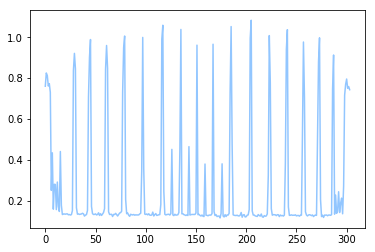

In [19]:
plt.plot(std_all)

In [20]:
j = 0
count_strange = []
while j < 608:
    x = data.a.offsetcentroid[0][:,j]
    y = data.a.offsetcentroid[0][:,j + 1]
    #a = x.max()
    b = x.min()
    #c = y.max()
    #d = y.min()
    i = 0
    #count_maxx = 0
    count_minx = 0
    #count_maxy = 0
    #count_miny = 0
    while i < len(x):
        #if x[i] == a:
         #   count_maxx += 1
        if x[i] == b:
            count_minx += 1
       # if y[i] == c:
         #   count_maxy += 1
       # if y[i] == d:
           # count_miny += 1
        
        i += 1
    if count_minx > 100:
        count_strange.append(j // 2)
    j += 2

count_strange


[0,
 1,
 2,
 3,
 4,
 5,
 28,
 29,
 30,
 43,
 44,
 45,
 60,
 61,
 62,
 77,
 78,
 79,
 97,
 116,
 117,
 126,
 135,
 143,
 151,
 159,
 167,
 176,
 184,
 185,
 204,
 205,
 223,
 224,
 239,
 240,
 241,
 256,
 257,
 271,
 272,
 273,
 286,
 287,
 298,
 299,
 300,
 301,
 302,
 303]

In [21]:
len(count_strange)

50

In [22]:
i = 0
std_large = []
while i < 304:
    if std_all[i]>0.6:
        std_large.append(i)
    i += 1
std_large
   
    

[0,
 1,
 2,
 3,
 4,
 5,
 28,
 29,
 30,
 43,
 44,
 45,
 60,
 61,
 62,
 77,
 78,
 79,
 97,
 116,
 117,
 135,
 151,
 167,
 184,
 185,
 204,
 205,
 223,
 224,
 240,
 241,
 257,
 258,
 272,
 273,
 286,
 287,
 298,
 299,
 300,
 301,
 302,
 303]

In [23]:
contain_lst = []
for i in count_strange:
    contain = False
    for j in std_large:
        if i == j:
            contain = True
    if contain == False:
        contain_lst.append(i)
contain_lst     

[126, 143, 159, 176, 239, 256, 271]

## Information for drawing x/y offset centroid vs. Time

In [24]:
def time(data_extracted):
    time = (data_extracted.a.timestamp[0]-data_extracted.a.timestamp[0][0])/10000000
    time_begin = np.arange(0, time[len(time) - 1], 0.1)
    return time, time_begin
def mean_std(index, time, time_begin, data_extracted):
    i = 0
    count_total = []
    while i < len(time_begin):
        num = 0
        for j in time:
            if j < np.append(time_begin, (time[len(time) - 1]))[i + 1]:
                num += 1
        count_total.append(num)
        i += 1
    truncate_mean = []
    truncate_std = []
    i = 0
    start = 0
    while i < len(count_total):
        truncate_mean.append(data_extracted.a.offsetcentroid[0][start:(count_total[i]), index].mean())
        truncate_std.append(data_extracted.a.offsetcentroid[0][start:(count_total[i]), index].std())
        start = count_total[i]
        i += 1
    return truncate_mean, truncate_std
t, t_be = time(data)
x_mean, x_std = mean_std(304, t, t_be, data)
y_mean, y_std = mean_std(305, t, t_be, data)

In [25]:
def stdline12(mean_adj, std_adj):
    line1 = []
    line2 = []
    i = 0
    while i < len(std_adj):
        line1.append(mean_adj[i] - std_adj[i])
        line2.append(mean_adj[i] + std_adj[i])
        i += 1
    return line1, line2
linex_up, linex_down = stdline12(x_mean, x_std)
liney_up, liney_down = stdline12(y_mean, y_std)

In [26]:
temp = []
i = 0
while i < len(t) - 1:
    temp.append((t[i + 1] - t[i]))
    i += 1
temp

[0.0010004,
 0.0010002999999999998,
 0.0010004000000000002,
 0.0010002999999999995,
 0.0010004000000000002,
 0.0010003,
 0.0010004000000000002,
 0.001000299999999999,
 0.0010004000000000002,
 0.0010003000000000008,
 0.0010004000000000002,
 0.0010004000000000002,
 0.001000299999999999,
 0.0010004000000000002,
 0.001000299999999999,
 0.001000400000000002,
 0.001000299999999999,
 0.0010003999999999985,
 0.0010003000000000026,
 0.0010003999999999985,
 0.001000299999999999,
 0.001000400000000002,
 0.0010003999999999985,
 0.001000299999999999,
 0.001000400000000002,
 0.001000299999999999,
 0.001000400000000002,
 0.001000299999999999,
 0.0010003999999999985,
 0.001000299999999999,
 0.001000400000000002,
 0.001000299999999999,
 0.0010003999999999985,
 0.0010003000000000026,
 0.0010003999999999985,
 0.0010003999999999985,
 0.0010003000000000026,
 0.0010003999999999985,
 0.0010003000000000026,
 0.0010003999999999985,
 0.0010003000000000026,
 0.0010003999999999985,
 0.0010003000000000026,
 0.0010

In [27]:
std_stable = list(std_all)

In [28]:
index_remove = []
i = 0
while i < 3:
    j = 0
    std = [x for x in std_stable if x != 0]
    median = np.median(np.array(std))
    std_temp = np.array(std).std()
    while j < len(std_stable):
        if std_stable[j] != 0 and (std_stable[j] > median + 3*std_temp or std_stable[j] < median - 3*std_temp):
            index_remove.append(j)
            std_stable[j] = 0
        j += 1
    i += 1

In [29]:
std_stable2 = list(std_all)

In [30]:
index_remove2 = []
i = 0
while i < 3:
    j = 0
    std = [x for x in std_stable2 if x != 0]
    median = np.median(np.array(std))
    std_temp = np.array(std).std()
    while j < len(std_stable2):
        if std_stable2[j] != 0 and (std_stable2[j] > median + 2.5*std_temp or std_stable2[j] < median - 2.5*std_temp):
            index_remove2.append(j)
            std_stable2[j] = 0
        j += 1
    i += 1

In [31]:
bad_data = np.sort(np.array(index_remove))
bad_data

array([  0,   1,   2,   3,   4,   5,   7,  15,  28,  29,  30,  43,  44,
        45,  60,  61,  62,  77,  78,  79,  97, 116, 117, 126, 134, 135,
       143, 151, 167, 184, 185, 186, 204, 205, 223, 224, 240, 241, 256,
       257, 258, 271, 272, 273, 286, 287, 298, 299, 300, 301, 302, 303])

In [32]:
bad_data2 = np.sort(np.array(index_remove2))
bad_data2

array([  0,   1,   2,   3,   4,   5,   7,  15,  28,  29,  30,  43,  44,
        45,  60,  61,  62,  77,  78,  79,  96,  97,  98, 116, 117, 126,
       134, 135, 143, 151, 159, 167, 176, 184, 185, 186, 204, 205, 222,
       223, 224, 239, 240, 241, 256, 257, 258, 271, 272, 273, 286, 287,
       298, 299, 300, 301, 302, 303])

In [33]:
std_plot = [1 if x > 0 else 0 for x in std_stable]
std_plot

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


## Plot for Offset Centroid Point 0

###### The red point is the mean value of offset centroid for point 0.
###### The dotted circle surrounds the mean value point with a radius of offset standard deviation.
###### Those blue dots represent offset centroid points.

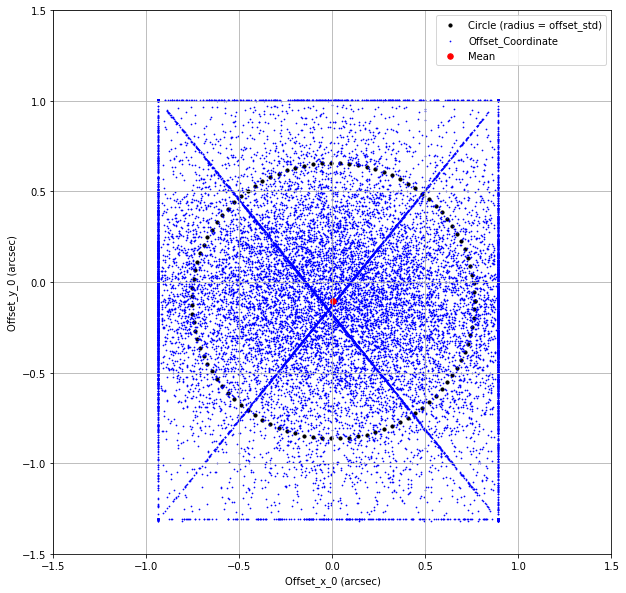

In [34]:
mx = data.a.offsetcentroid[0][:, 0].mean()
my = data.a.offsetcentroid[0][:, 1].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 0].std())**2 + (data.a.offsetcentroid[0][:, 1].std())**2)
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my
fig = plt.figure(figsize = (10, 10))
circle = plt.scatter(x, y, s = 10, c = 'k')
offset = plt.scatter(data.a.offsetcentroid[0][:,0], data.a.offsetcentroid[0][:,1], s = 0.5, c = 'b')
mean = plt.scatter(mx, my, s = 30, c = 'r')
plt.xlabel('Offset_x_0 (arcsec)')
plt.ylabel('Offset_y_0 (arcsec)')
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'upper right')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid()
plt.show()


In [35]:
survive_x = [data.a.offsetcentroid[0][i,0] if sqrt((data.a.offsetcentroid[0][i,0] - mx)**2 + (data.a.offsetcentroid[0][i,1] - my)**2) > std1 else 0 for i in range(19072)]
survive_y = [data.a.offsetcentroid[0][i,1] if sqrt((data.a.offsetcentroid[0][i,0] - mx)**2 + (data.a.offsetcentroid[0][i,1] - my)**2) > std1 else 0 for i in range(19072)]

In [36]:
len(survive_x)

19072

In [37]:
survive_y = [data.a.offsetcentroid[0][i,1] if sqrt((data.a.offsetcentroid[0][i,0] - mx)**2 + (data.a.offsetcentroid[0][i,1] - my)**2) > std1 else 0 for i in range(19072)]

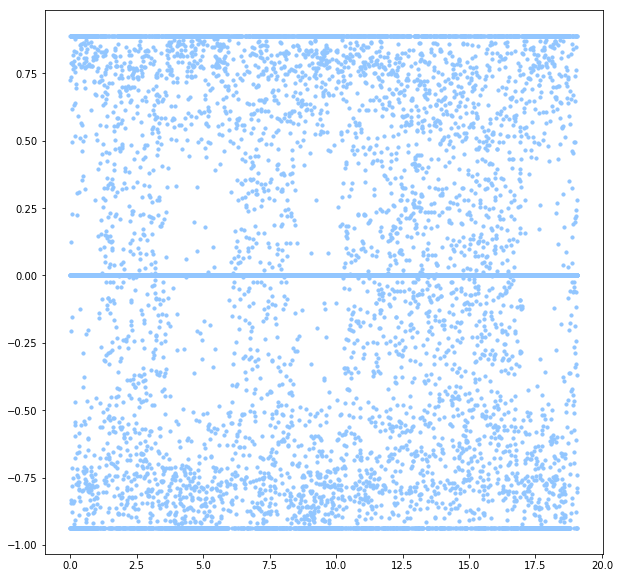

In [38]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(t, survive_x, s = 10)

<Figure size 720x720 with 0 Axes>

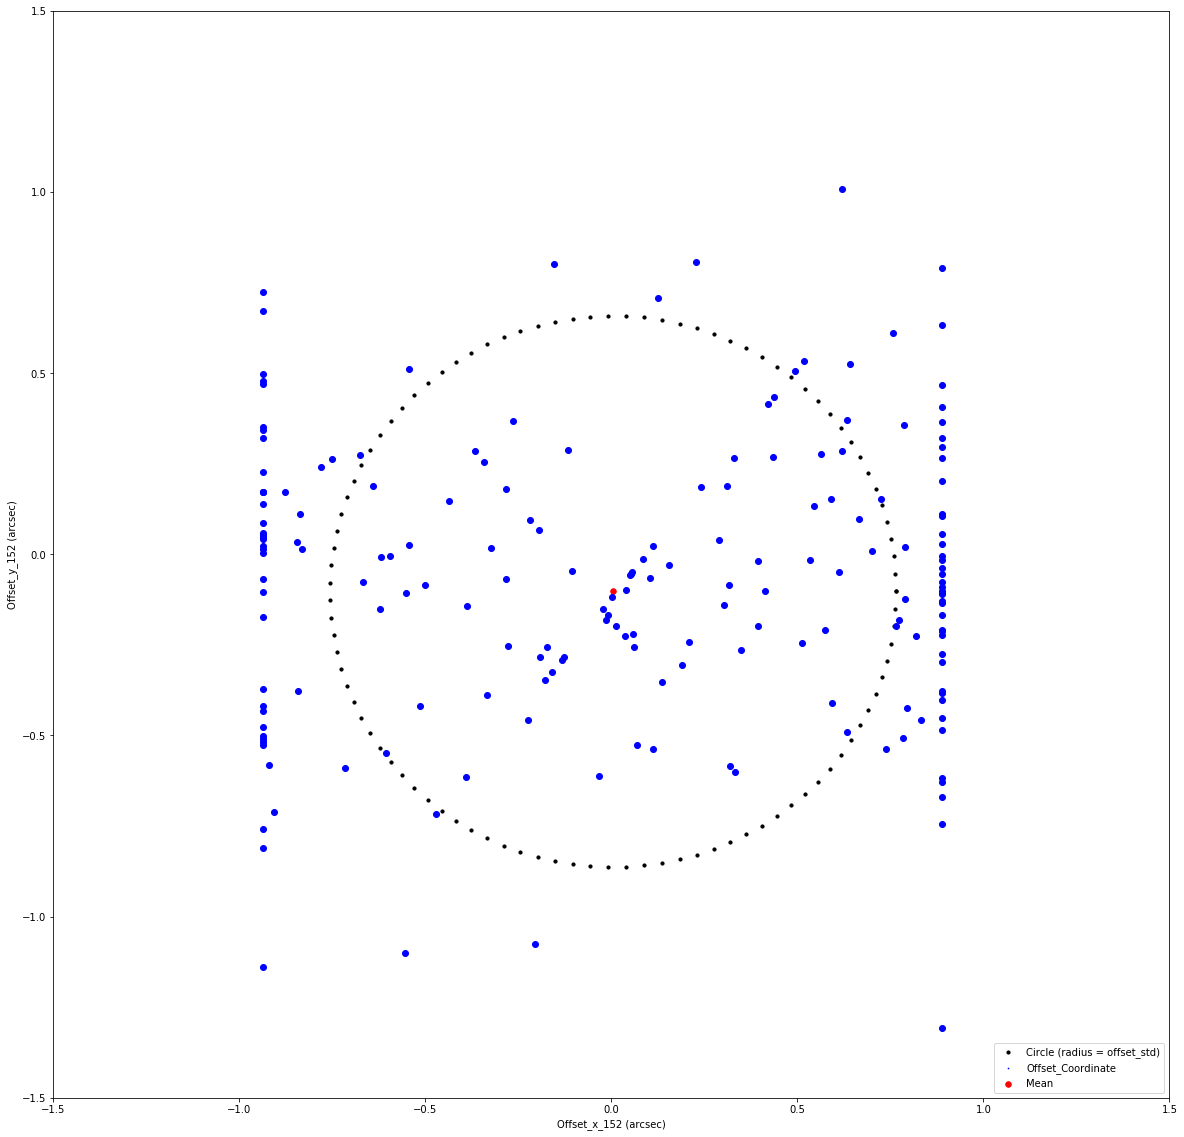

In [39]:
mx = data.a.offsetcentroid[0][:, 0].mean()
my = data.a.offsetcentroid[0][:, 1].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 0].std())**2 + (data.a.offsetcentroid[0][:, 1].std())**2)
#fig = plt.figure()
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my

a = data.a.offsetcentroid[0][:, 0]
b = data.a.offsetcentroid[0][:, 1]
fig = plt.figure(figsize = (10, 10))
#import matplotlib.animation


fig, ax = plt.subplots(figsize = (20, 20))
mean = ax.scatter(mx, my, s = 30, c = 'r')
circle = ax.scatter(x, y, s = 10, c = 'k')
x, y = [],[]
sc = ax.scatter(x,y, c = 'b')

ax.set_xlabel('Offset_x_152 (arcsec)')
ax.set_ylabel('Offset_y_152 (arcsec)')
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'lower right')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
#plt.xlim(-0.6,0.6)
#plt.ylim(-0.6,0.6)

def animate(i):
    x.append(a[i])
    y.append(b[i])
    sc.set_offsets(np.c_[x,y])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=190, interval=10, repeat=False) 
ani.save('point12.gif', writer='pillow')
plt.show()
#offset = plt.scatter(data.a.offsetcentroid[0][:,304], data.a.offsetcentroid[0][:,305], s = 0.5, c = 'b')

#plt.grid()
#plt.show()


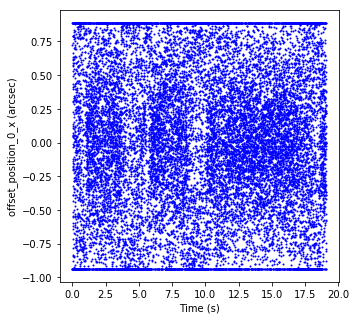

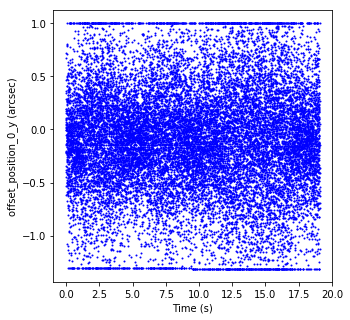

In [40]:
fig = plt.figure(figsize = (5,5))
plt.scatter(t, data.a.offsetcentroid[0][:,0], c = 'b', s = 1)
plt.xlabel('Time (s)')
plt.ylabel('offset_position_0_x (arcsec)')
plt.show()

fig = plt.figure(figsize = (5,5))
plt.scatter(t, data.a.offsetcentroid[0][:,1], c = 'b', s = 1)
plt.xlabel('Time (s)')
plt.ylabel('offset_position_0_y (arcsec)')
plt.show()

## Plot for Offset Centroid Point 152

###### The red point is the mean value of offset centroid for point 152.
###### The dotted circle surrounds the mean value point with a radius of offset standard deviation.
###### Those blue dots represent offset centroid points.

<Figure size 720x720 with 0 Axes>

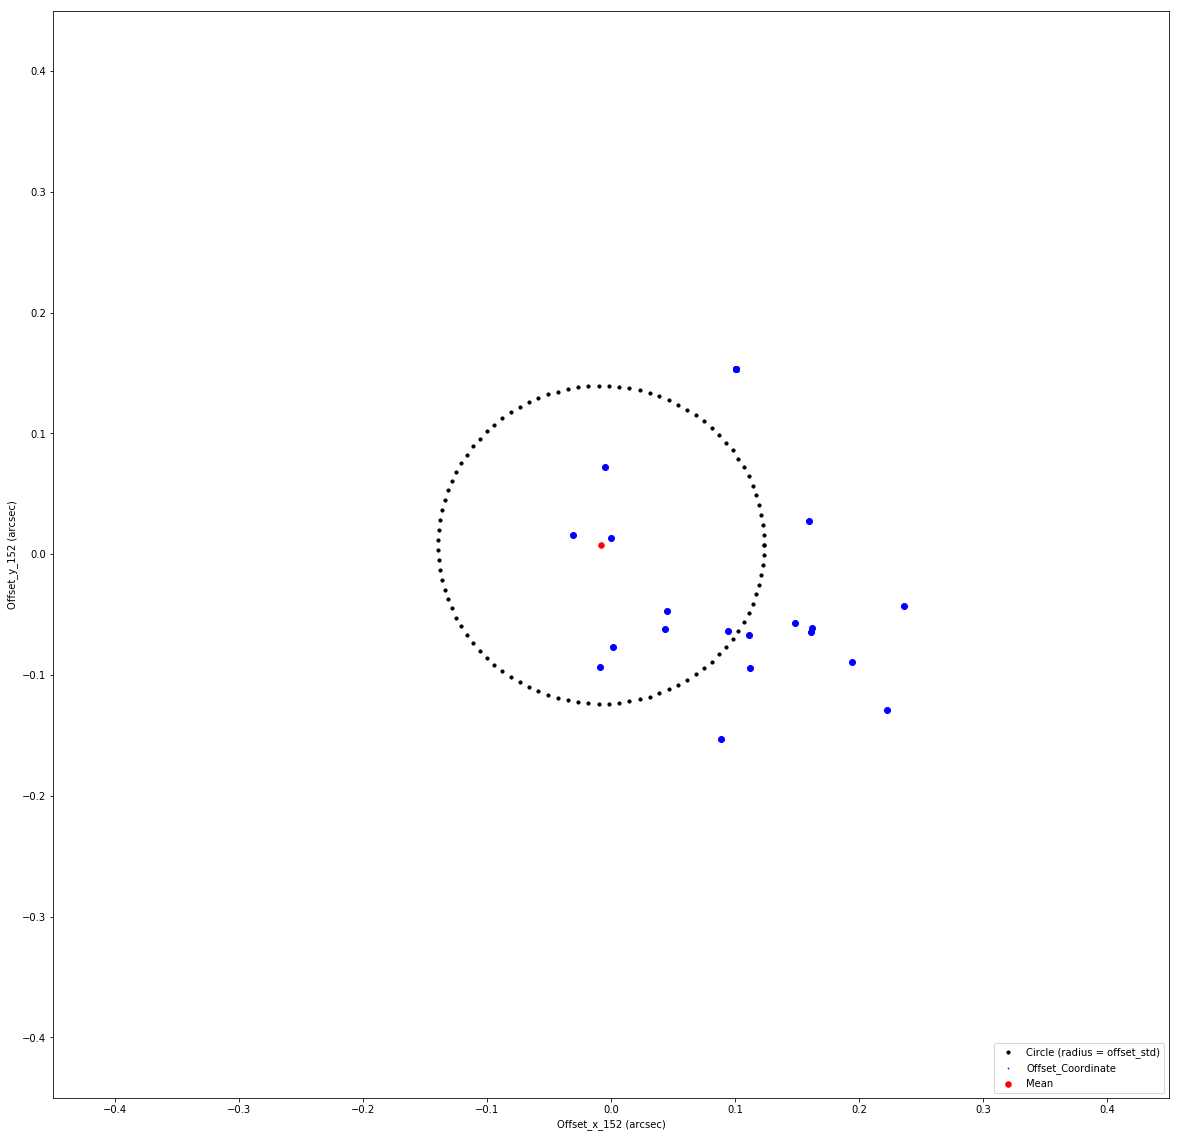

In [41]:
mx = data.a.offsetcentroid[0][:, 304].mean()
my = data.a.offsetcentroid[0][:, 305].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 304].std())**2 + (data.a.offsetcentroid[0][:, 305].std())**2)
#fig = plt.figure()
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my

a = data.a.offsetcentroid[0][:, 304]
b = data.a.offsetcentroid[0][:, 305]
fig = plt.figure(figsize = (10, 10))
#import matplotlib.animation


fig, ax = plt.subplots(figsize = (20, 20))
mean = ax.scatter(mx, my, s = 30, c = 'r')
circle = ax.scatter(x, y, s = 10, c = 'k')
x, y = [],[]
sc = ax.scatter(x,y, c = 'b')

ax.set_xlabel('Offset_x_152 (arcsec)')
ax.set_ylabel('Offset_y_152 (arcsec)')
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'lower right')
plt.xlim(-0.45,0.45)
plt.ylim(-0.45,0.45)
#plt.xlim(-0.6,0.6)
#plt.ylim(-0.6,0.6)

def animate(i):
    x.append(a[i])
    y.append(b[i])
    sc.set_offsets(np.c_[x,y])

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=19, interval=10, repeat=False) 
ani.save('point13.gif', writer='pillow')
plt.show()
#offset = plt.scatter(data.a.offsetcentroid[0][:,304], data.a.offsetcentroid[0][:,305], s = 0.5, c = 'b')

#plt.grid()
#plt.show()


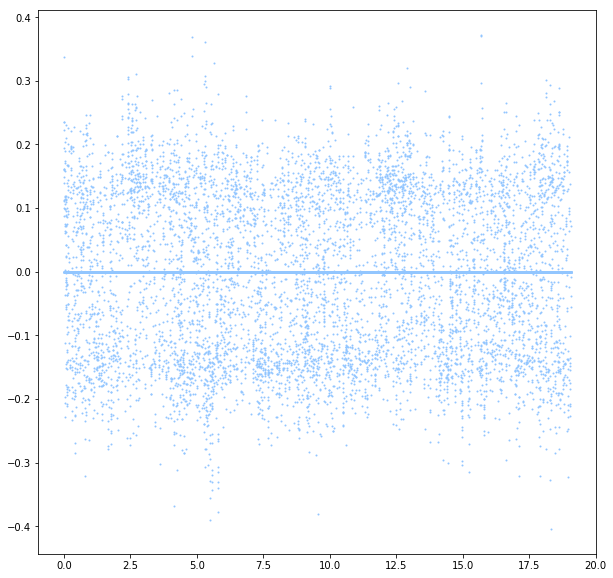

In [42]:
survive_x = [data.a.offsetcentroid[0][i,304] if sqrt((data.a.offsetcentroid[0][i,304] - mx)**2 + (data.a.offsetcentroid[0][i,305] - my)**2) > std1 else 0 for i in range(19072)]
survive_y = [data.a.offsetcentroid[0][i,305] if sqrt((data.a.offsetcentroid[0][i,304] - mx)**2 + (data.a.offsetcentroid[0][i,305] - my)**2) > std1 else 0 for i in range(19072)]
fig = plt.figure(figsize = (10, 10))
plt.scatter(t, survive_x, s = 1)
plt.show()
#plt.ylim(-0.1, 1.2)

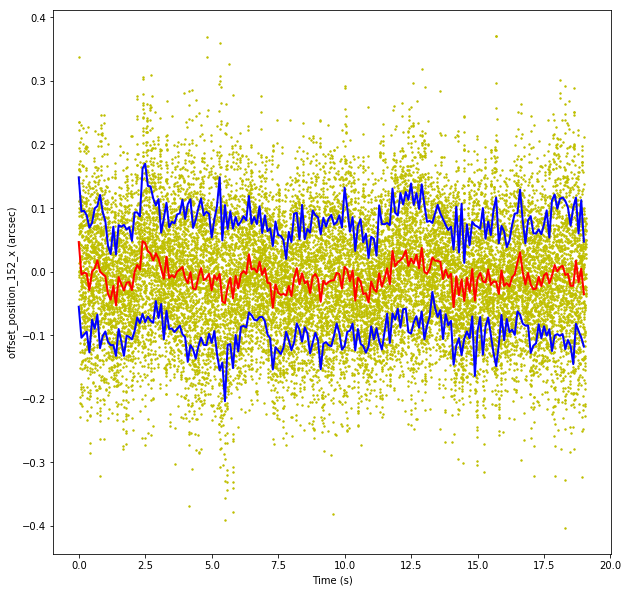

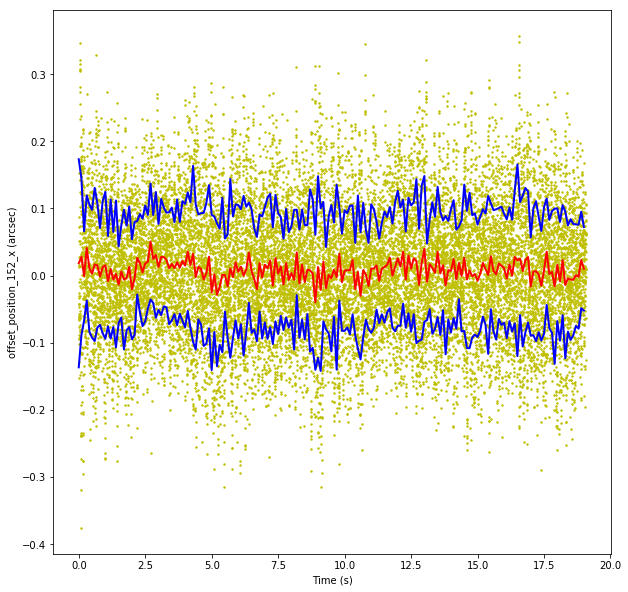

In [43]:
fig = plt.figure(figsize = (10,10))
plt.scatter(t, data.a.offsetcentroid[0][:,304], c = 'y', s = 2)
plt.plot(t_be, x_mean, c = 'r', linewidth = 2)
plt.plot(t_be, linex_up, t_be, linex_down, c = 'b', linewidth = 2)
plt.xlabel('Time (s)')
plt.ylabel('offset_position_152_x (arcsec)')
plt.show()

fig = plt.figure(figsize = (10,10))
plt.scatter(t, data.a.offsetcentroid[0][:,305], c = 'y', s = 2)
plt.plot(t_be, y_mean, c = 'r', linewidth = 2)
plt.plot(t_be, liney_up, t_be, liney_down, c = 'b', linewidth = 2)
plt.xlabel('Time (s)')
plt.ylabel('offset_position_152_x (arcsec)')
plt.show()


## Plot for Offset Centroid Point 303

###### The red point is the mean value of offset centroid for point 303.
###### The dotted circle surrounds the mean value point with a radius of offset standard deviation.
###### Those blue dots represent offset centroid points.

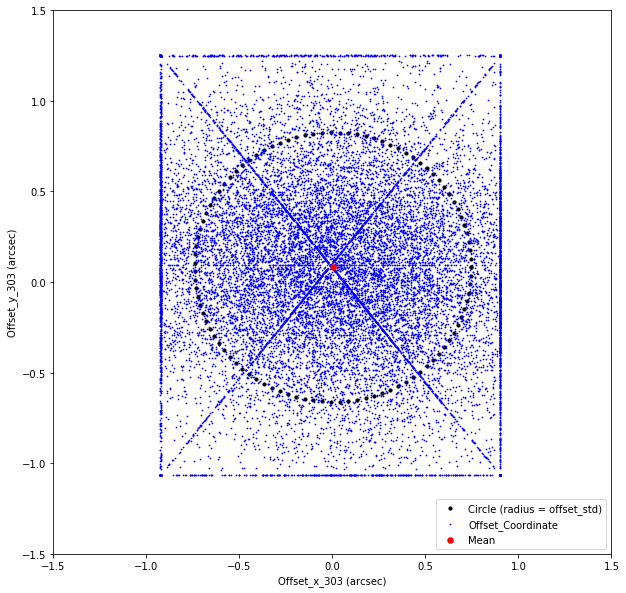

In [44]:
mx = data.a.offsetcentroid[0][:, 606].mean()
my = data.a.offsetcentroid[0][:, 607].mean()
std1 = sqrt((data.a.offsetcentroid[0][:, 606].std())**2 + (data.a.offsetcentroid[0][:, 607].std())**2)
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my
fig = plt.figure(figsize = (10, 10))
circle = plt.scatter(x, y, s = 10, c = 'k')
offset = plt.scatter(data.a.offsetcentroid[0][:,606], data.a.offsetcentroid[0][:,607], s = 0.5, c = 'b')
mean = plt.scatter(mx, my, s = 30, c = 'r')
plt.xlabel('Offset_x_303 (arcsec)')
plt.ylabel('Offset_y_303 (arcsec)')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'lower right')
#plt.grid()
plt.show()

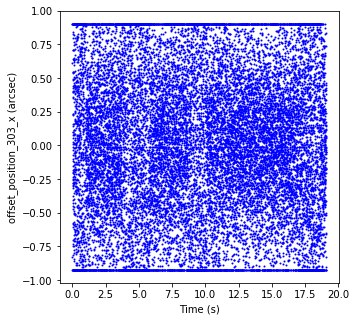

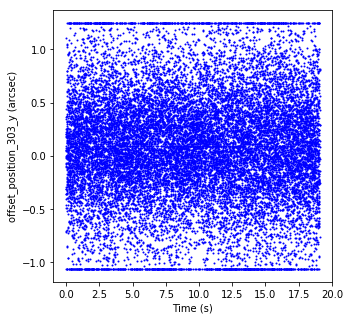

In [45]:
fig = plt.figure(figsize = (5,5))
plt.scatter(t, data.a.offsetcentroid[0][:,606], c = 'b', s = 1)
plt.xlabel('Time (s)')
plt.ylabel('offset_position_303_x (arcsec)')
plt.show()

fig = plt.figure(figsize = (5,5))
plt.scatter(t, data.a.offsetcentroid[0][:,607], c = 'b', s = 1)
plt.xlabel('Time (s)')
plt.ylabel('offset_position_303_y (arcsec)')
plt.show()

## Plot for All Offset Centroids

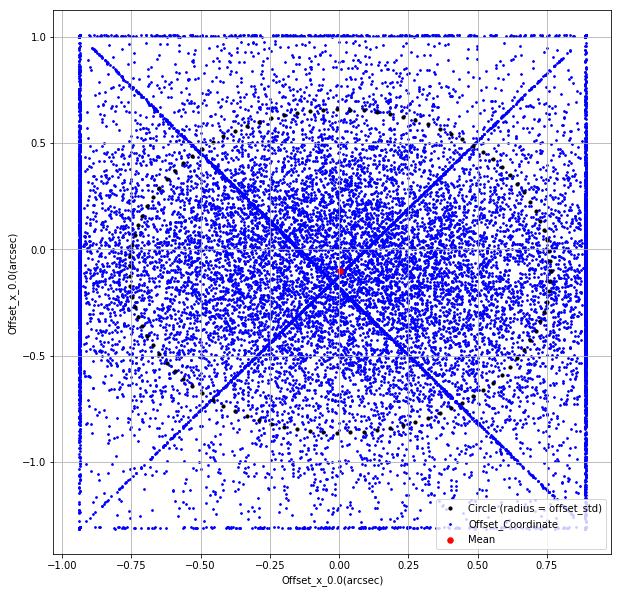

FileNotFoundError: [Errno 2] No such file or directory: 'offset_graphs/offset_0.png'

In [101]:
i = 0
while i < 608:
    mx = data.a.offsetcentroid[0][:, i].mean()
    my = data.a.offsetcentroid[0][:, i + 1].mean()
    std1 = sqrt((data.a.offsetcentroid[0][:, i].std())**2 + (data.a.offsetcentroid[0][:, i + 1].std())**2)
#fig = plt.figure()
    theta = np.linspace(0, 2 * pi, 100)
    x = np.cos(theta)*std1 + mx
    y = np.sin(theta)*std1 + my
    fig = plt.figure(figsize = (10, 10))
    offset = plt.scatter(data.a.offsetcentroid[0][:,i], data.a.offsetcentroid[0][:,i + 1], s = 3, c = 'b')
    mean = plt.scatter(mx, my, s = 30, c = 'r')
    circle = plt.scatter(x, y, s = 10, c = 'k')
    plt.xlabel('Offset_x_' + str(i/2) + '(arcsec)')
    plt.ylabel('Offset_x_' + str(i/2) + '(arcsec)')
    plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'lower right')
    #plt.xlim(-0.45,0.45)
    #plt.ylim(-0.45,0.45)
    plt.grid()
    plt.show()
    fig.savefig('offset_graphs/offset_' + str(i//2) + '.png')
    i += 2


## Plot for Residual in Tip-Tilt

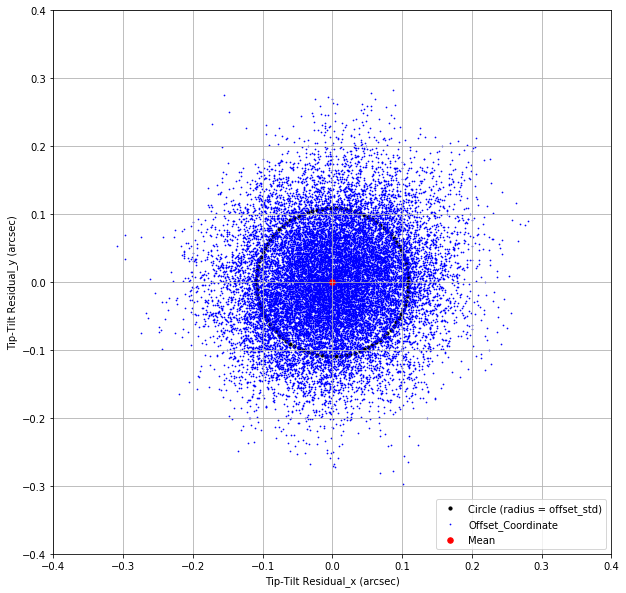

In [217]:
mx = data.a.residualwavefront[0][:, 349].mean()
my = data.a.residualwavefront[0][:, 350].mean()
std1 = sqrt((data.a.residualwavefront[0][:, 349].std())**2 + (data.a.residualwavefront[0][:, 350].std())**2)
theta = np.linspace(0, 2 * pi, 100)
x = np.cos(theta)*std1 + mx
y = np.sin(theta)*std1 + my
fig = plt.figure(figsize = (10, 10))
circle = plt.scatter(x, y, s = 10, c = 'k')
offset = plt.scatter(data.a.residualwavefront[0][:, 349], data.a.residualwavefront[0][:, 350], s = 0.5, c = 'b')
mean = plt.scatter(mx, my, s = 30, c = 'r')
plt.xlabel('Tip-Tilt Residual_x (arcsec)')
plt.ylabel('Tip-Tilt Residual_y (arcsec)')
plt.xlim(-0.4,0.4)
plt.ylim(-0.4,0.4)
plt.legend([circle, offset, mean], ['Circle (radius = offset_std)', 'Offset_Coordinate', 'Mean'], loc = 'lower right')
plt.grid()
plt.show()

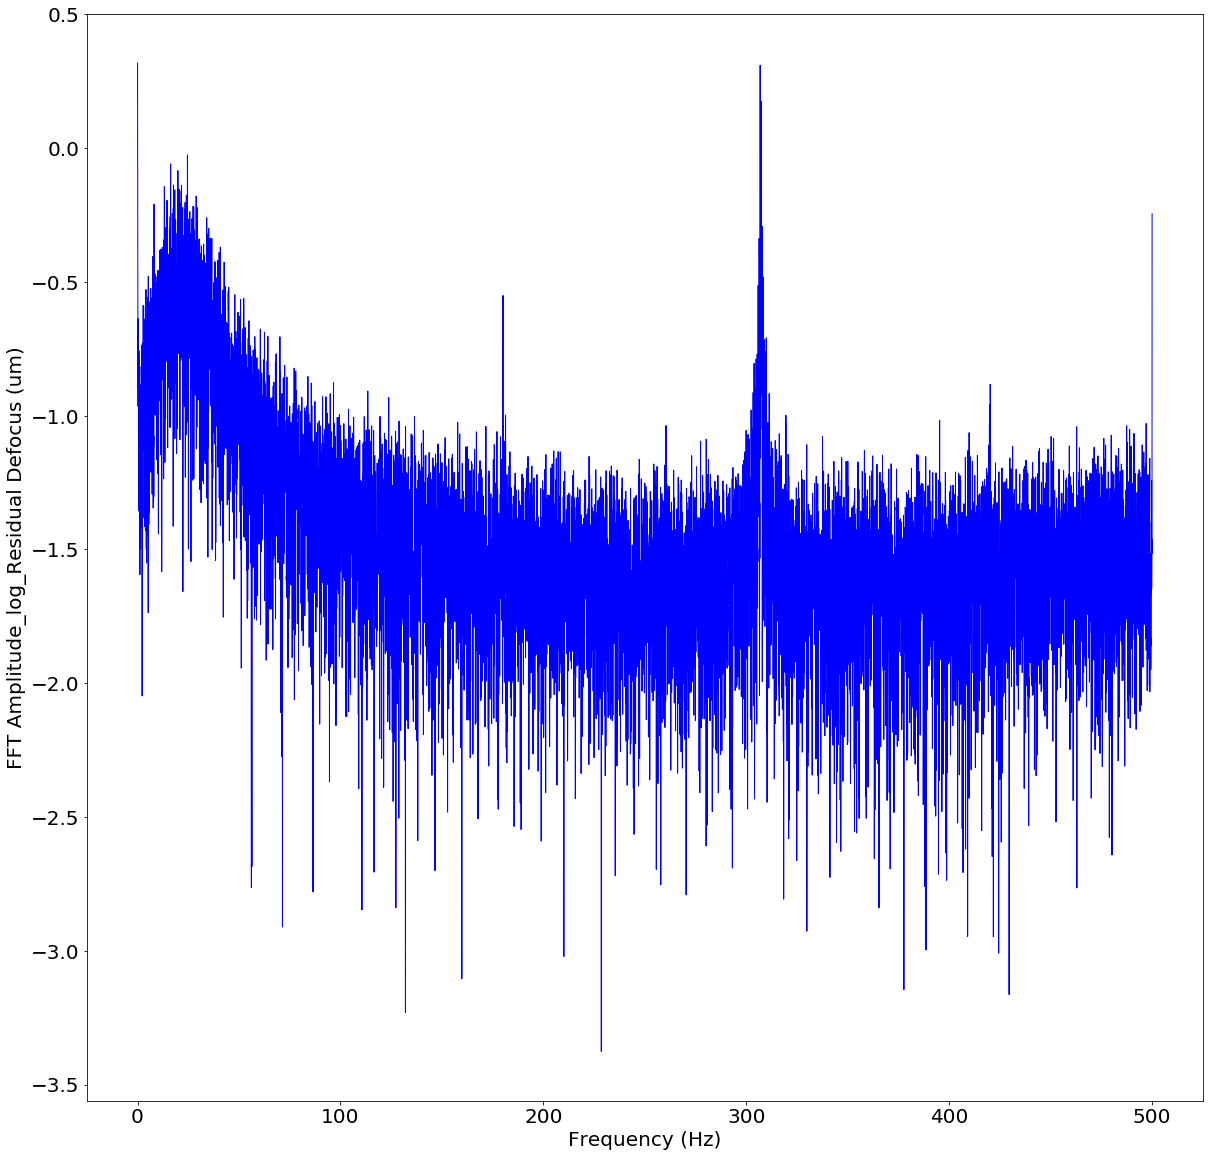

In [226]:

sp = np.fft.rfft(data.a.residualwavefront[0][:, 351])
freq = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.plot(freq, np.log10(sp/19072).real,linewidth = 1, c = 'b')
plt.xlabel('Frequency (Hz)', fontsize = 20)
plt.ylabel('FFT Amplitude_log_Residual Defocus (um)', fontsize = 20)
ax = plt.gca()
ax.tick_params(labelsize = 20)
#ax.set_xlim(-0.1, 15)

(290, 330)

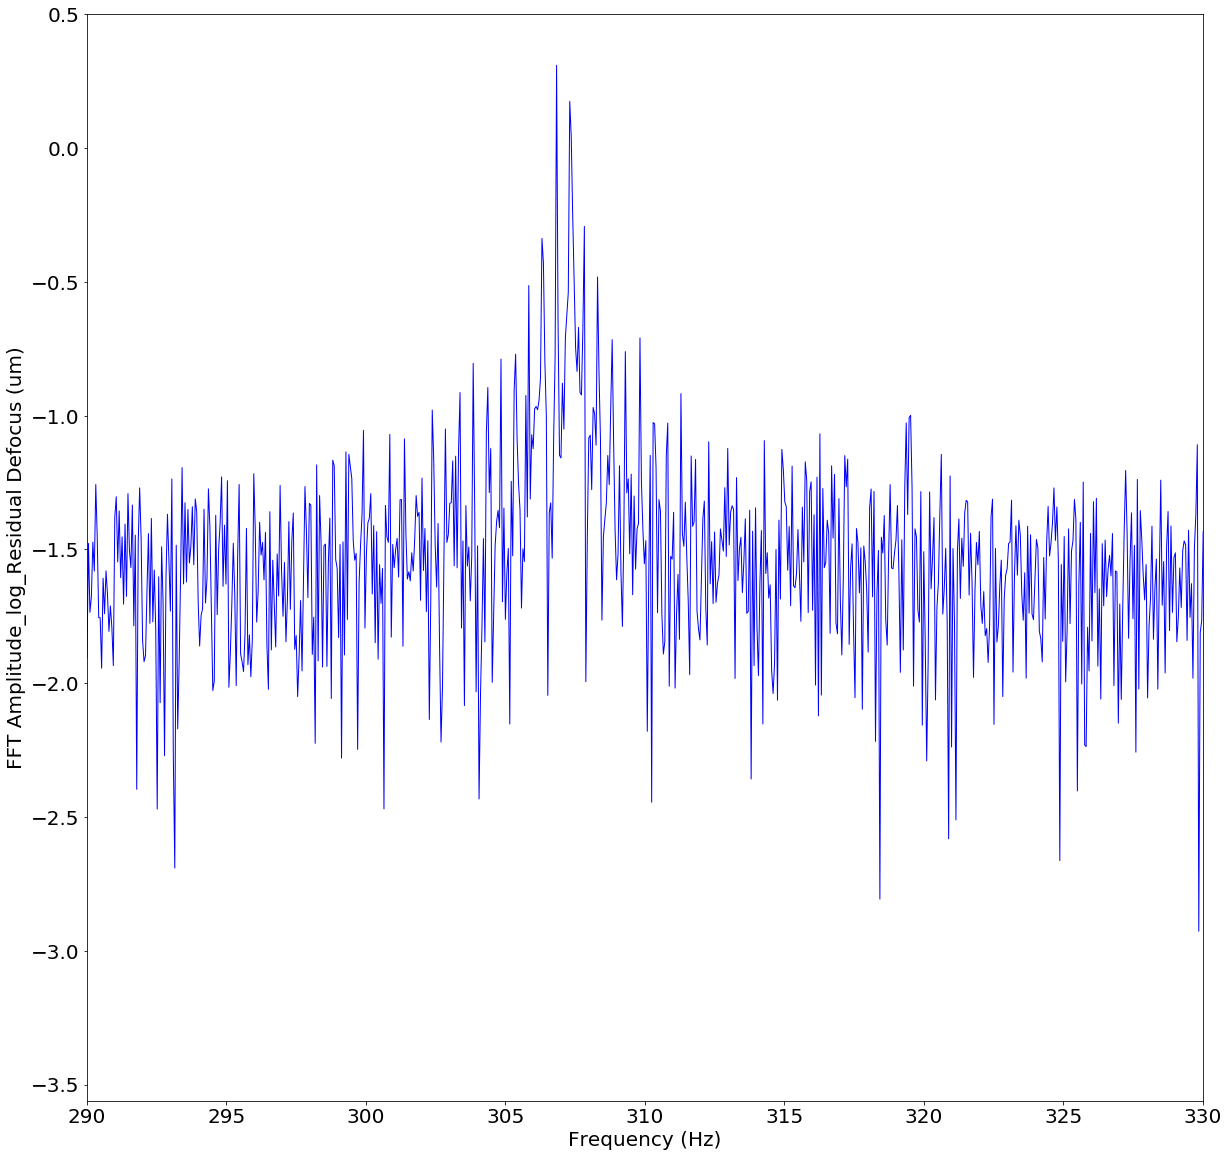

In [232]:
sp = np.fft.rfft(data.a.residualwavefront[0][:, 351])
freq = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.plot(freq, np.log10(sp/19072).real,linewidth = 1, c = 'b')
plt.xlabel('Frequency (Hz)', fontsize = 20)
plt.ylabel('FFT Amplitude_log_Residual Defocus (um)', fontsize = 20)
ax = plt.gca()
ax.tick_params(labelsize = 20)
ax.set_xlim(290, 330)

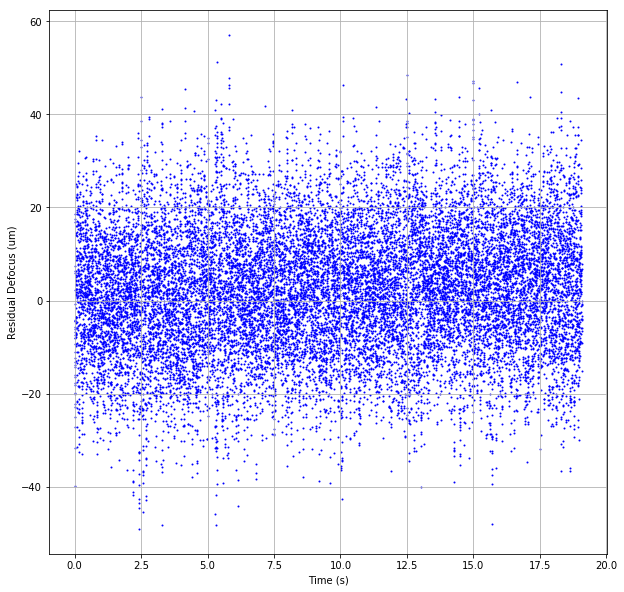

In [224]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(t, data.a.residualwavefront[0][:, 351], s = 1, c = 'b')
plt.xlabel('Time (s)')
plt.ylabel('Residual Defocus (um)')
plt.grid()

## Plot for DM residual

In [50]:

txt_file = open("../Desktop/act_map.txt", 'r')

exact_x_dm = []
exact_y_dm = []
start_y_dm = 0.1
count = 0
for info in txt_file.readlines():
    start_x_dm = 0.1
   
    line = list(info)
    for i in line:
        if i is not " " and i is not '\n':
            if int(i) != 0:
                exact_x_dm.append(start_x_dm)
                exact_y_dm.append(start_y_dm)
            start_x_dm += 7
    start_y_dm += 7

str_txt_dm = [str(i) for i in range(349)]

In [80]:
std_dm = []
for i in range(349):
    std_dm.append(data.a.residualwavefront[0][:,i].std())
len(std_dm)

349

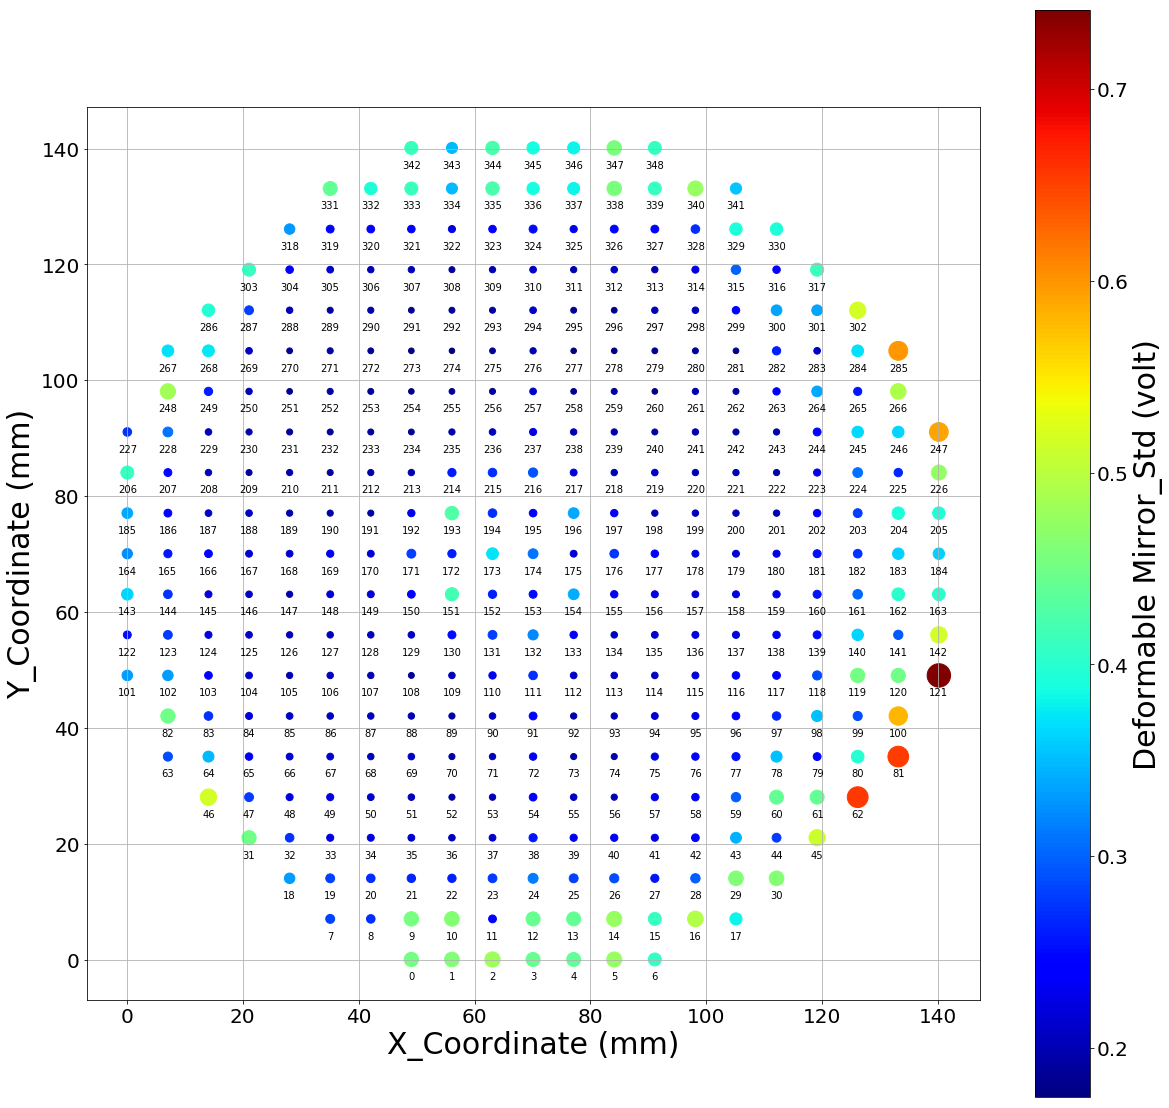

In [93]:
cmap = cm.jet
a = pd.Series(std_dm)
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x_dm, exact_y_dm, s = a * a * 1000, c = a, cmap = cmap)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Deformable Mirror_Std (volt)', size = 30)
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=20)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 349:
    plt.text(exact_x_dm[i], exact_y_dm[i] - 3.5, str_txt_dm[i],horizontalalignment='center', fontsize = 10)
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.grid()

    

In [86]:
min([std_dm[i]*0.6 for i in range(349)])

0.10453308820724487

In [96]:
100/0.6

166.66666666666669

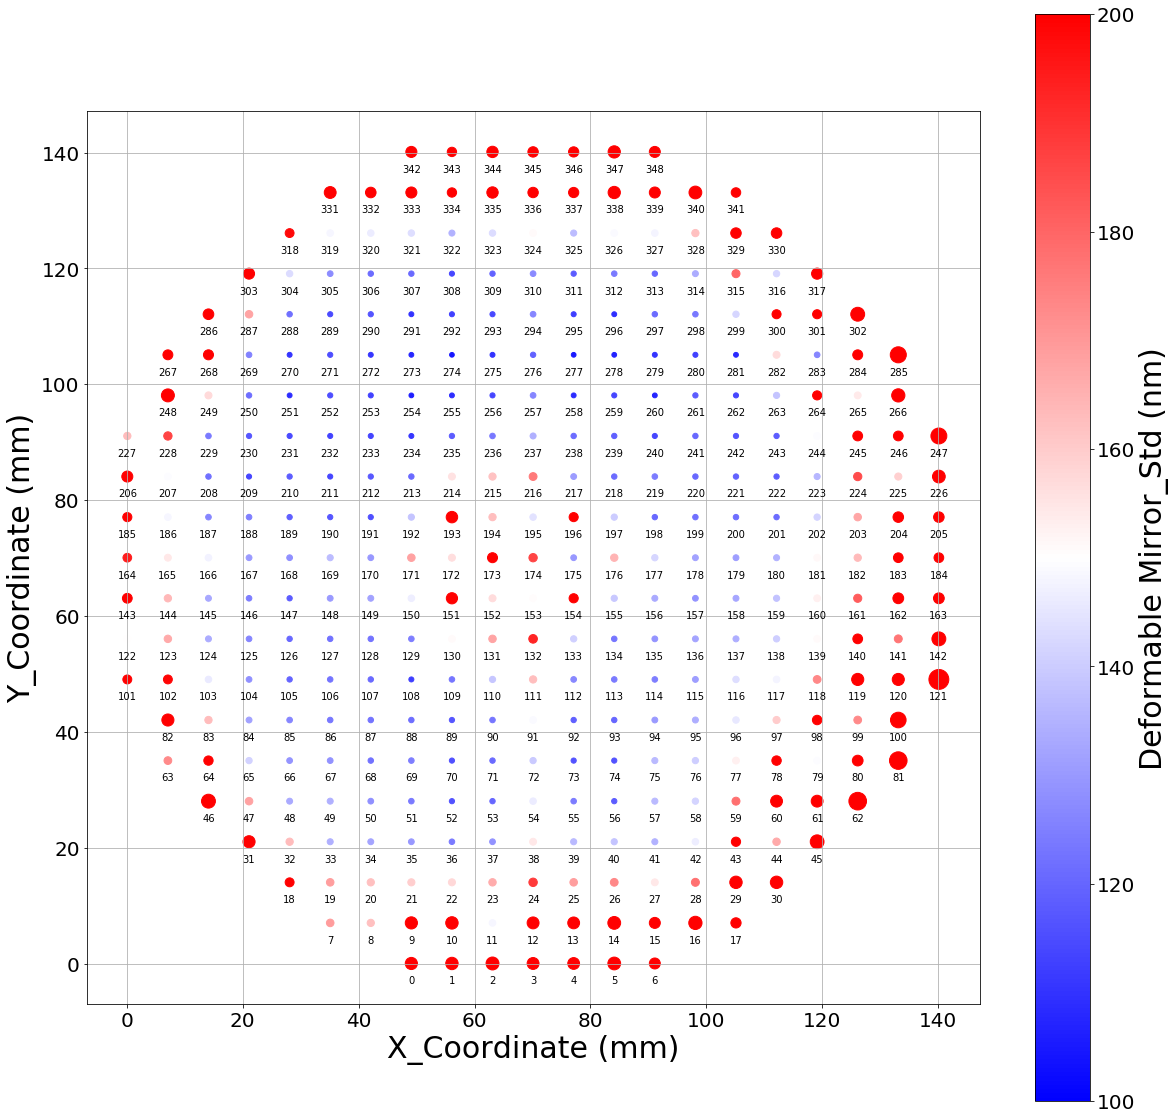

In [88]:
cmap = cm.bwr
a = pd.Series([std_dm[i]*0.6 for i in range(349)])
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x_dm, exact_y_dm, s = a * a * 2000, c = a*1000, cmap = cmap)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Deformable Mirror_Std (nm)', size = 30)
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=20)
plt.clim(100,200)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 349:
    plt.text(exact_x_dm[i], exact_y_dm[i] - 3.5, str_txt_dm[i],horizontalalignment='center', fontsize = 10)
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.grid()

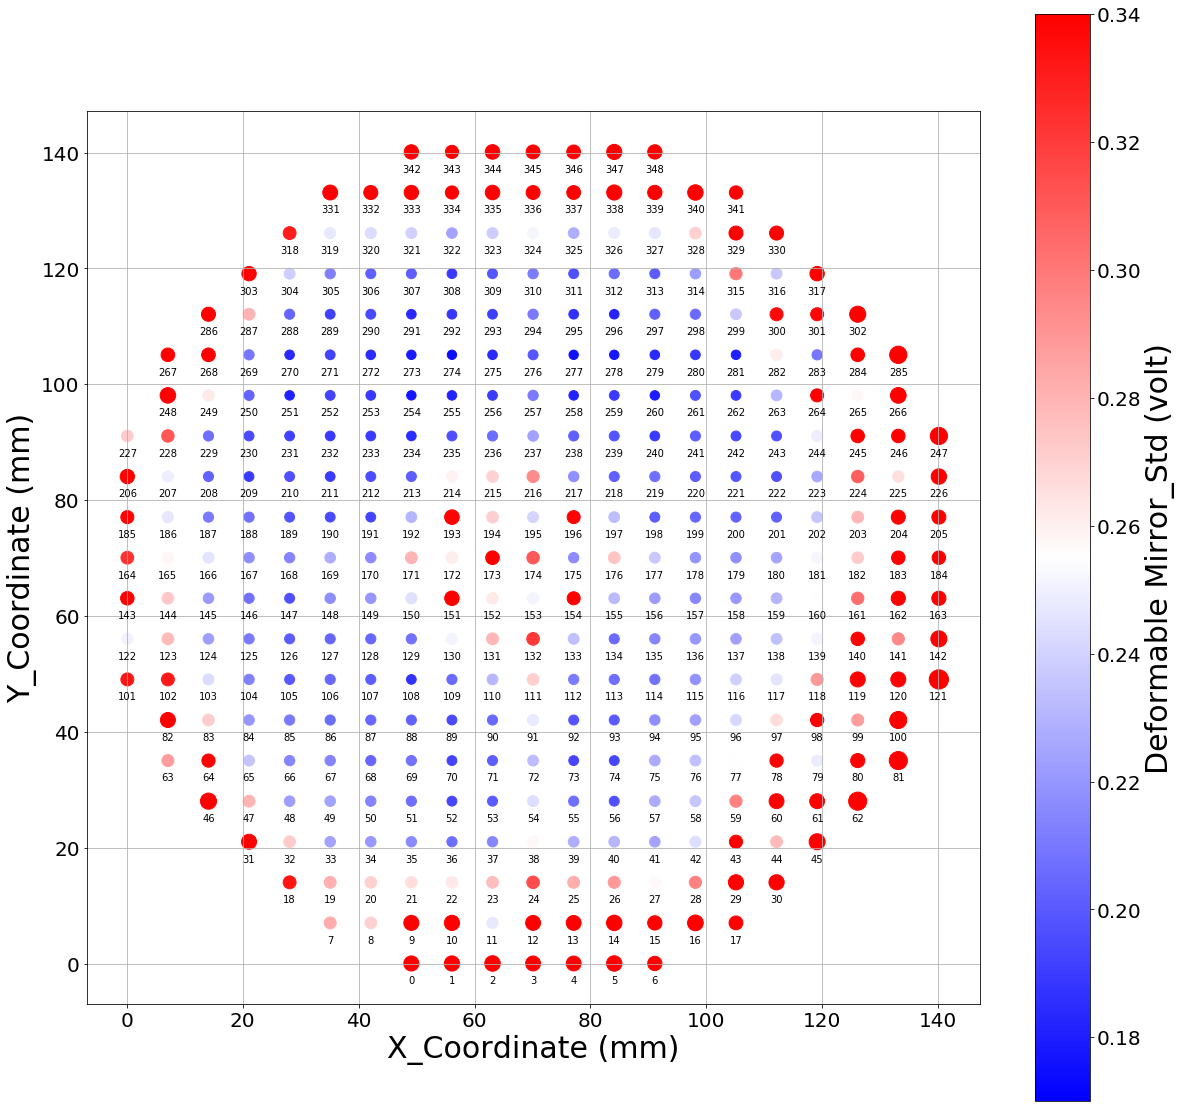

In [92]:
cmap = cm.bwr
a = pd.Series(std_dm)
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x_dm, exact_y_dm, s = a * 500, c = a, cmap = cmap)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Deformable Mirror_Std (volt)', size = 30)
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=20)
plt.clim(0.17, 0.34)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 349:
    plt.text(exact_x_dm[i], exact_y_dm[i] - 3.5, str_txt_dm[i],horizontalalignment='center', fontsize = 10)
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.grid()

In [107]:
std_dm_rangeshift = [std_dm[i] if std_dm[i] <= 0.34 else 0.7 for i in range(349)]

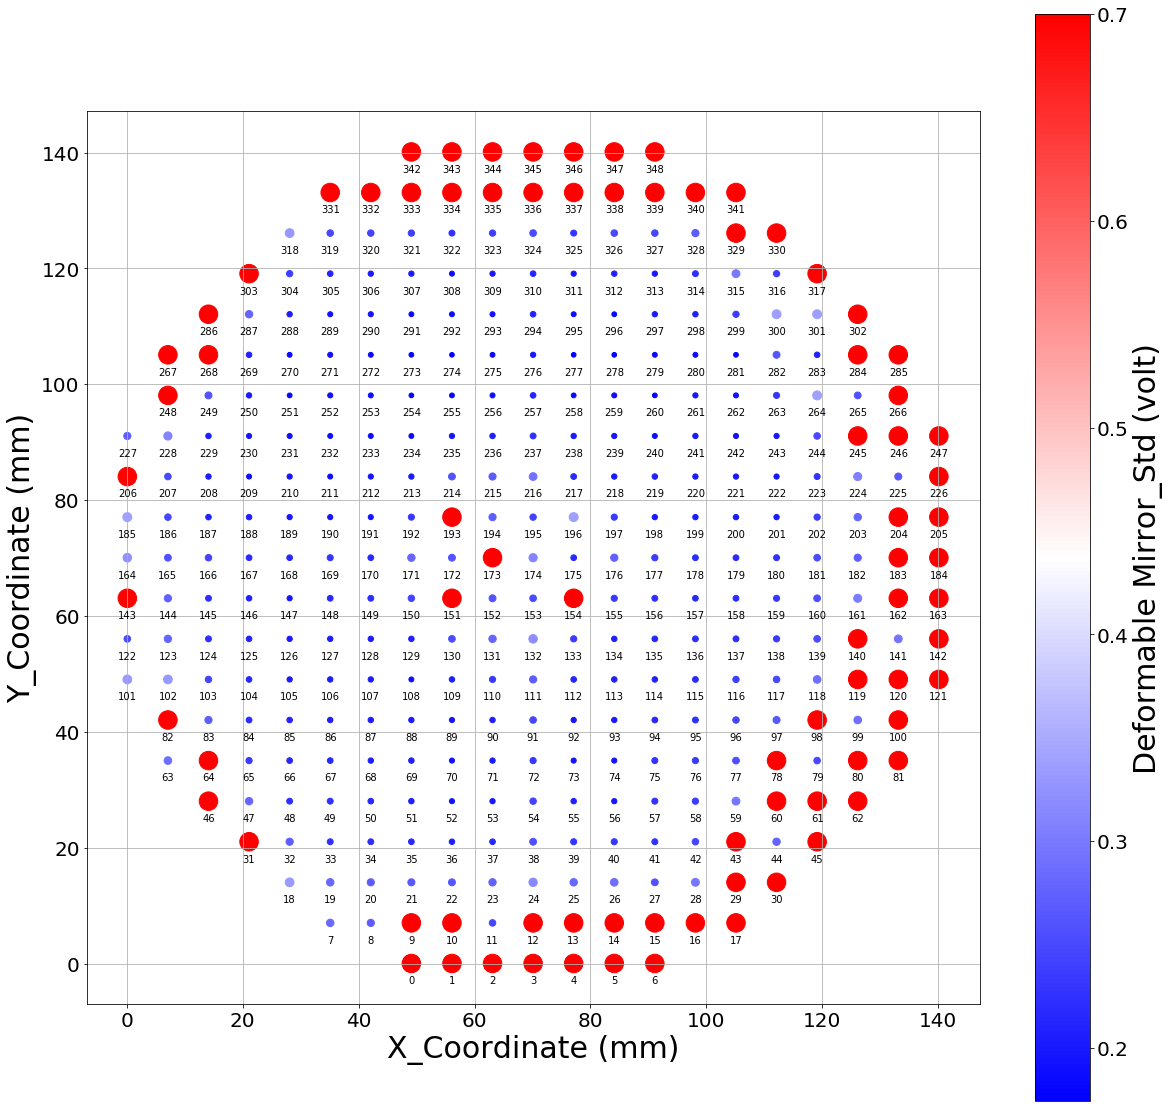

In [112]:
cmap = cm.bwr
a = pd.Series(std_dm_rangeshift)
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x_dm, exact_y_dm, s = a * a * 700, c = a, cmap = cmap)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Deformable Mirror_Std (volt)', size = 30)
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=20)
#plt.clim(0.17, 0.34)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 349:
    plt.text(exact_x_dm[i], exact_y_dm[i] - 3.5, str_txt_dm[i],horizontalalignment='center', fontsize = 10)
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.grid()

In [68]:
data.a.dtype.fields

mappingproxy({'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'timestamp': (dtype('O'), 8, 'timestamp'),
              'SUBAPINTENSITY': (dtype('O'), 16, 'subapintensity'),
              'subapintensity': (dtype('O'), 16, 'subapintensity'),
              'OFFSETCENTROID': (dtype('O'), 24, 'offsetcentroid'),
              'offsetcentroid': (dtype('O'), 24, 'offsetcentroid'),
              'RESIDUALWAVEFRONT': (dtype('O'), 32, 'residualwavefront'),
              'residualwavefront': (dtype('O'), 32, 'residualwavefront'),
              'DMCOMMAND': (dtype('O'), 40, 'dmcommand'),
              'dmcommand': (dtype('O'), 40, 'dmcommand'),
              'DMCOMMANDSCLIPPED': (dtype('O'), 48, 'dmcommandsclipped'),
              'dmcommandsclipped': (dtype('O'), 48, 'dmcommandsclipped'),
              'RESIDUALRMS': (dtype('O'), 56, 'residualrms'),
              'residualrms': (dtyp

In [70]:
data.a.dmcommand[0].shape

(19072, 349)

In [76]:
std_dm_c = []
for i in range(349):
    std_dm_c.append(data.a.dmcommand[0][:,i].std())
min(std_dm_c)


0.0050220154

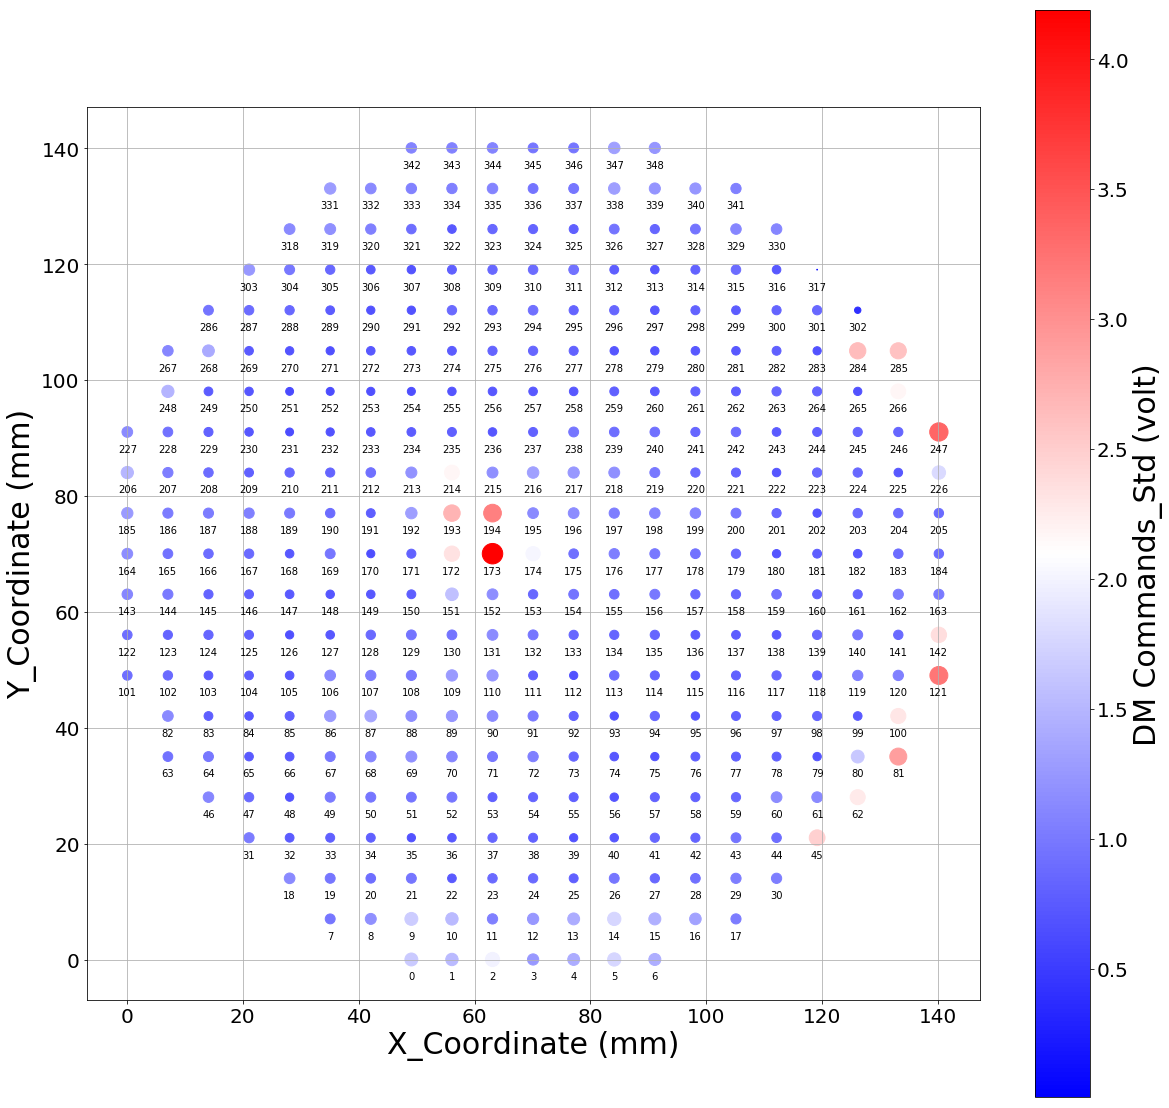

In [174]:
cmap = cm.bwr
a = pd.Series(std_dm_c)
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x_dm, exact_y_dm, s = a *100, c = a, cmap = cmap)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'DM Commands_Std (volt)', size = 30)
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=20)
#plt.clim(0, 2)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 349:
    plt.text(exact_x_dm[i], exact_y_dm[i] - 3.5, str_txt_dm[i],horizontalalignment='center', fontsize = 10)
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.tight_layout()
plt.grid()

## Plot for Centroid Origins
###### The size of the dots shows the magnitude of offset standard deviation for each centroid point. Larger the size, Bigger the std.
###### The colorbar shows the magnitude of offset standard deviation.

In [46]:
import matplotlib.pyplot as plt
txt_file = open("../Desktop/sub_ap_map.txt", 'r')

exact_x = []
exact_y = []
start_y = 0.1
count = 0
for info in txt_file.readlines():
    start_x = 0.1
   
    line = list(info)
    for i in line:
        if i is not " " and i is not '\n':
            if int(i) != 0:
                exact_x.append(start_x)
                exact_y.append(start_y)
            start_x += 0.2
    start_y += 0.2

str_txt = [str(i) for i in range(304)]

In [47]:

str_txt = [str(i) for i in range(304)]


In [48]:
str_survive = [x for x in str_txt if int(x) not in list(bad_data2)]
bad_x = [exact_x[i] for i in range(304) if i in list(bad_data)]
bad_y = [exact_y[i] for i in range(304) if i in list(bad_data)]
bad_x2 = [exact_x[i] for i in range(304) if i in list(bad_data2) and i not in list(bad_data)]
bad_y2 = [exact_y[i] for i in range(304) if i in list(bad_data2) and i not in list(bad_data)]
good_x = [exact_x[i] for i in range(304) if i not in list(bad_data2)]
good_y = [exact_y[i] for i in range(304) if i not in list(bad_data2)]

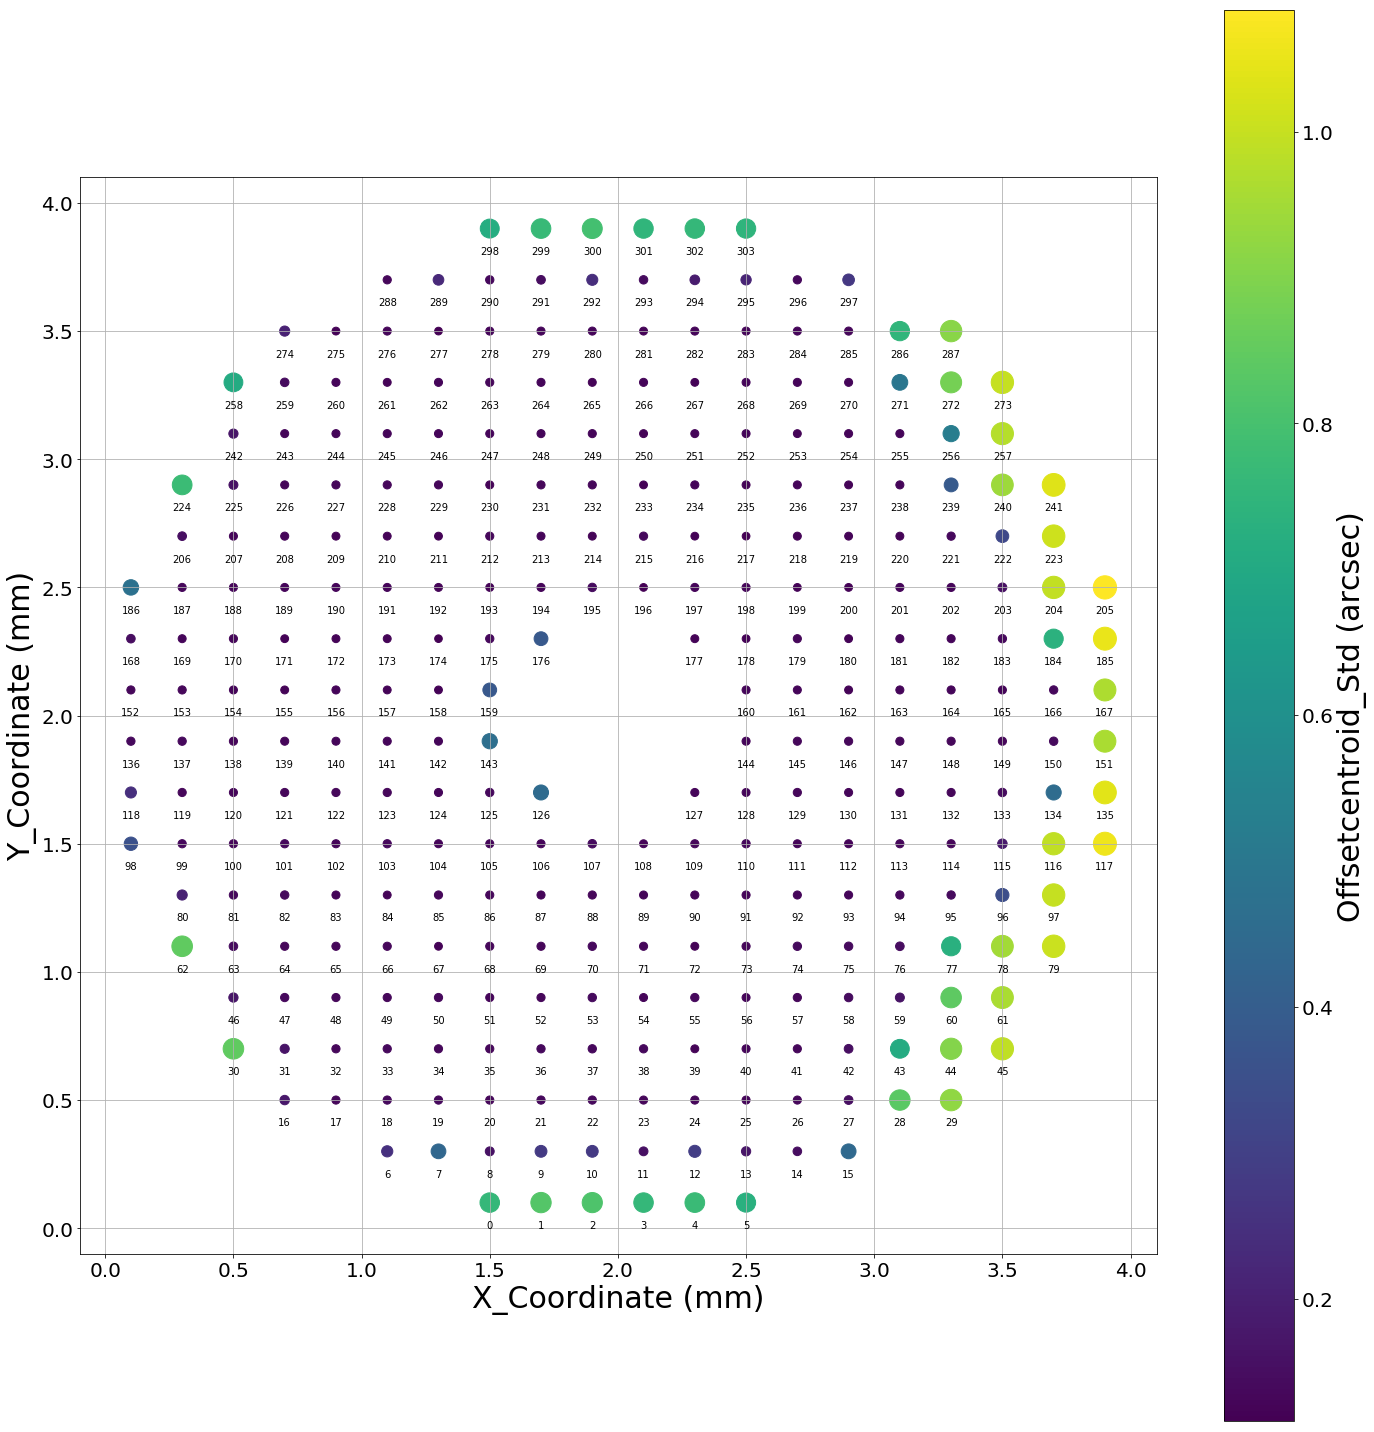

In [49]:
#cmap = mpl.cm.jet
a = pd.Series(std_all)
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x, exact_y, s = a * 500, c = a)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Offsetcentroid_Std (arcsec)', size = 30)
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=20)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 304:
    plt.text(exact_x[i], exact_y[i] - 0.1, str_txt[i],horizontalalignment='center')
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.grid()
plt.show()
    

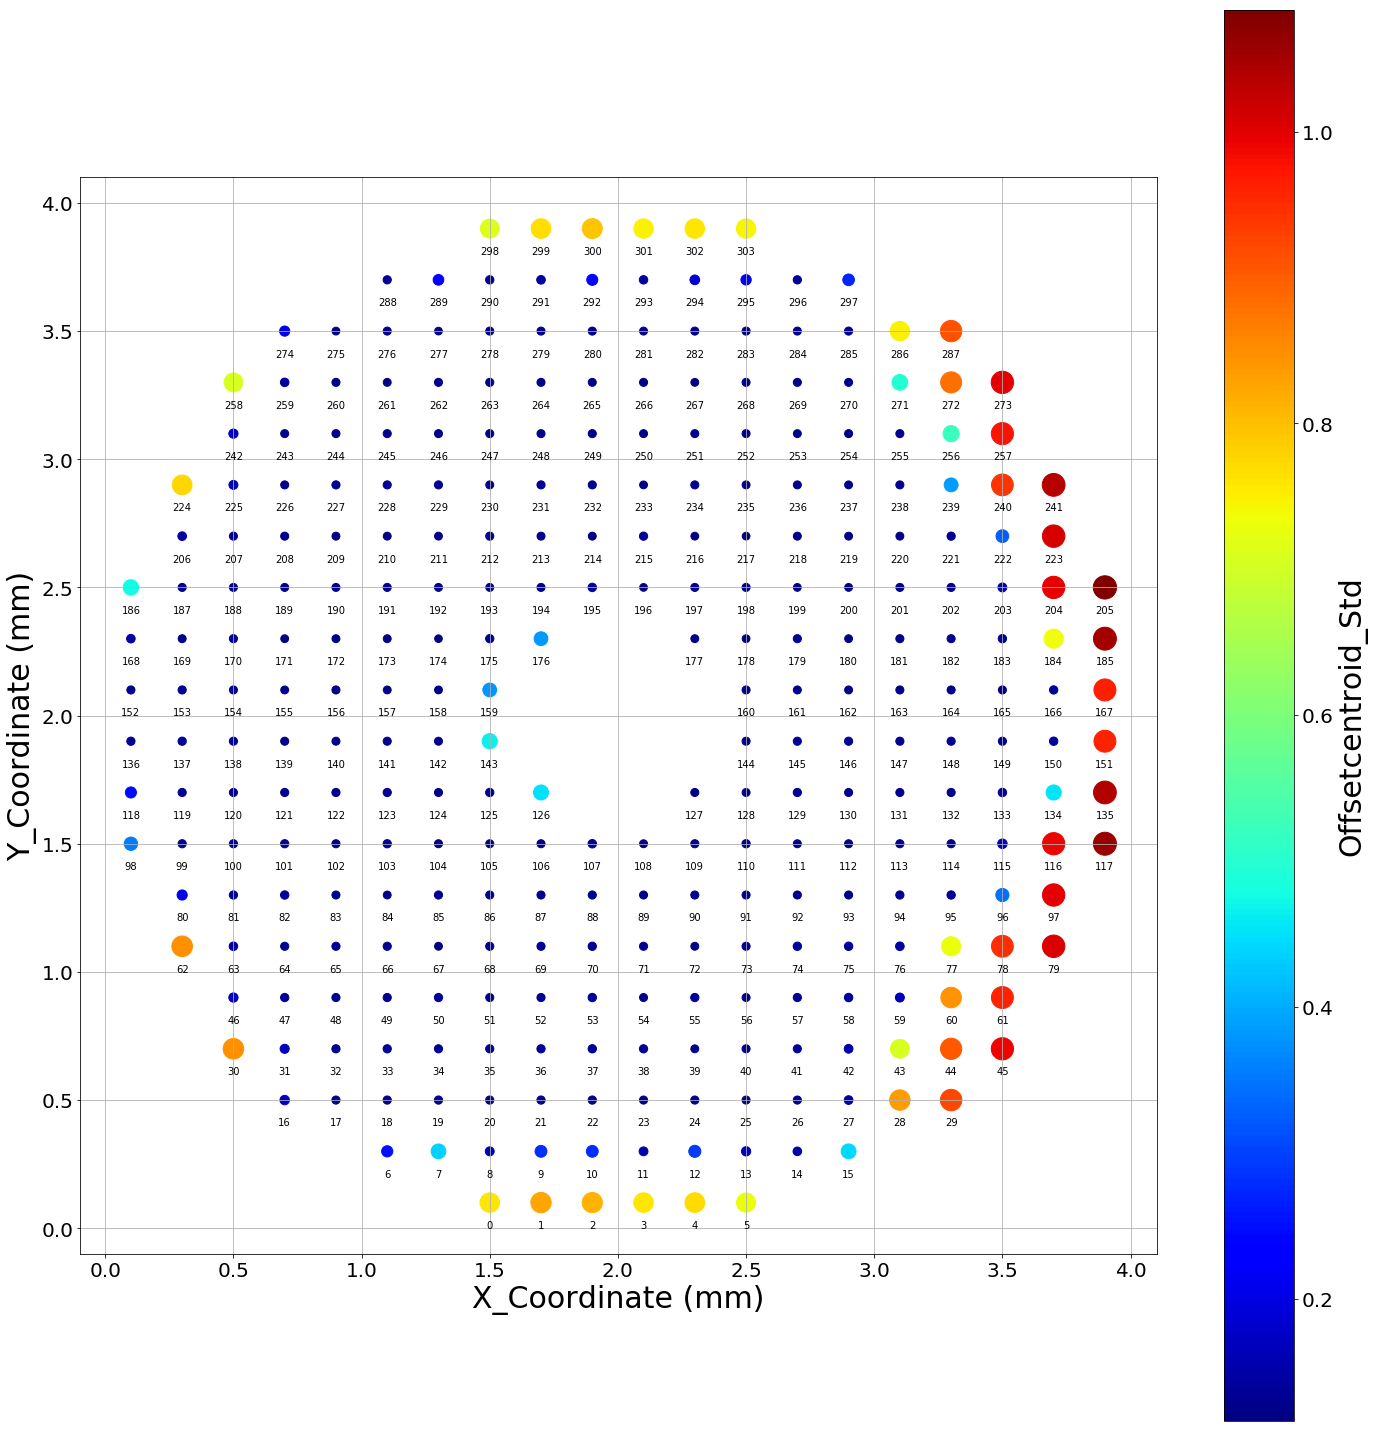

In [69]:
cmap = mpl.cm.jet
a = pd.Series(std_all)
fig = plt.figure(figsize = (20, 20))
plt.scatter(exact_x, exact_y, s = a * 500, c = a, cmap = cmap)
ax = plt.gca()
ax.set_aspect('equal')
plt.colorbar().set_label(label = 'Offsetcentroid_Std', size = 30)
fig2 = plt.gcf()
cbar_ax = fig2.axes[-1]
cbar_ax.tick_params(labelsize=20)

i = 0
while i < 304:
    plt.text(exact_x[i], exact_y[i] - 0.1, str_txt[i],horizontalalignment='center')
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.grid()
plt.show()

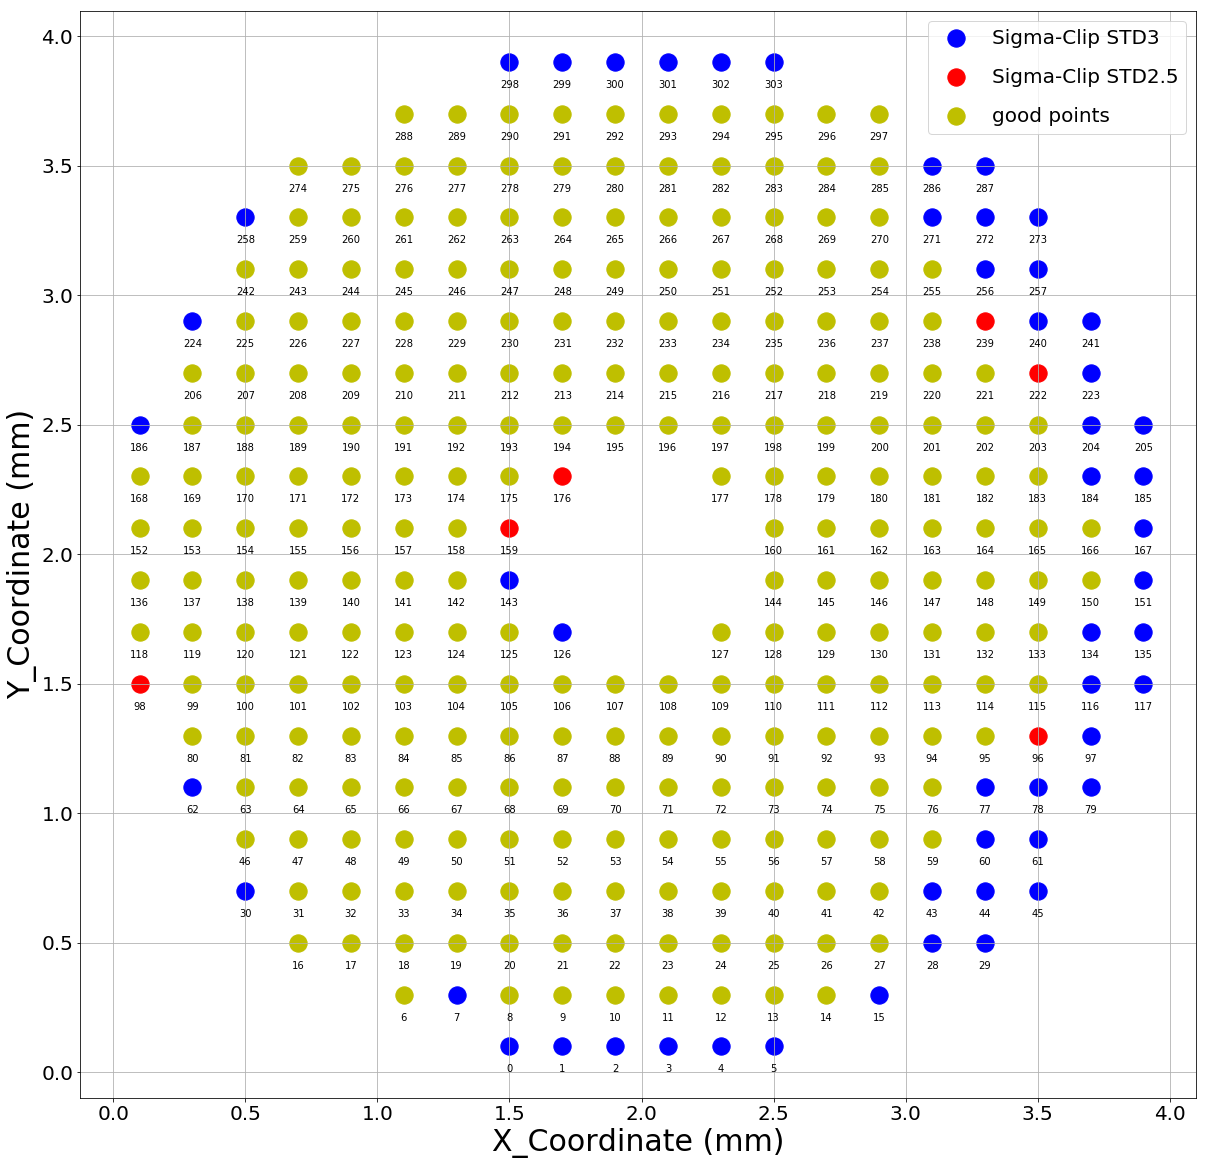

In [204]:
fig = plt.figure(figsize = (20, 20))
blue = plt.scatter(bad_x, bad_y, s = 300, c = 'b')
yellow = plt.scatter(good_x, good_y, s = 300, c = 'y')
red = plt.scatter(bad_x2, bad_y2, s = 300, c = 'r')
plt.legend((blue, red, yellow), ('Sigma-Clip STD3', 'Sigma-Clip STD2.5','good points'), labelspacing = 1, fontsize = 20)
#ax = plt.gca()
#ax.set_aspect('equal')
#plt.colorbar(cmap="jet").set_label(label = 'Offsetcentroid_Std', size = 30)
#fig2 = plt.gcf()
#cbar_ax = fig2.axes[-1]
#cbar_ax.tick_params(labelsize=20)
#plt.xlim(-)
#plt.ylim(-0.32, 0.32)

i = 0
while i < 304:
    plt.text(exact_x[i], exact_y[i] - 0.1, str_txt[i],horizontalalignment='center')
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

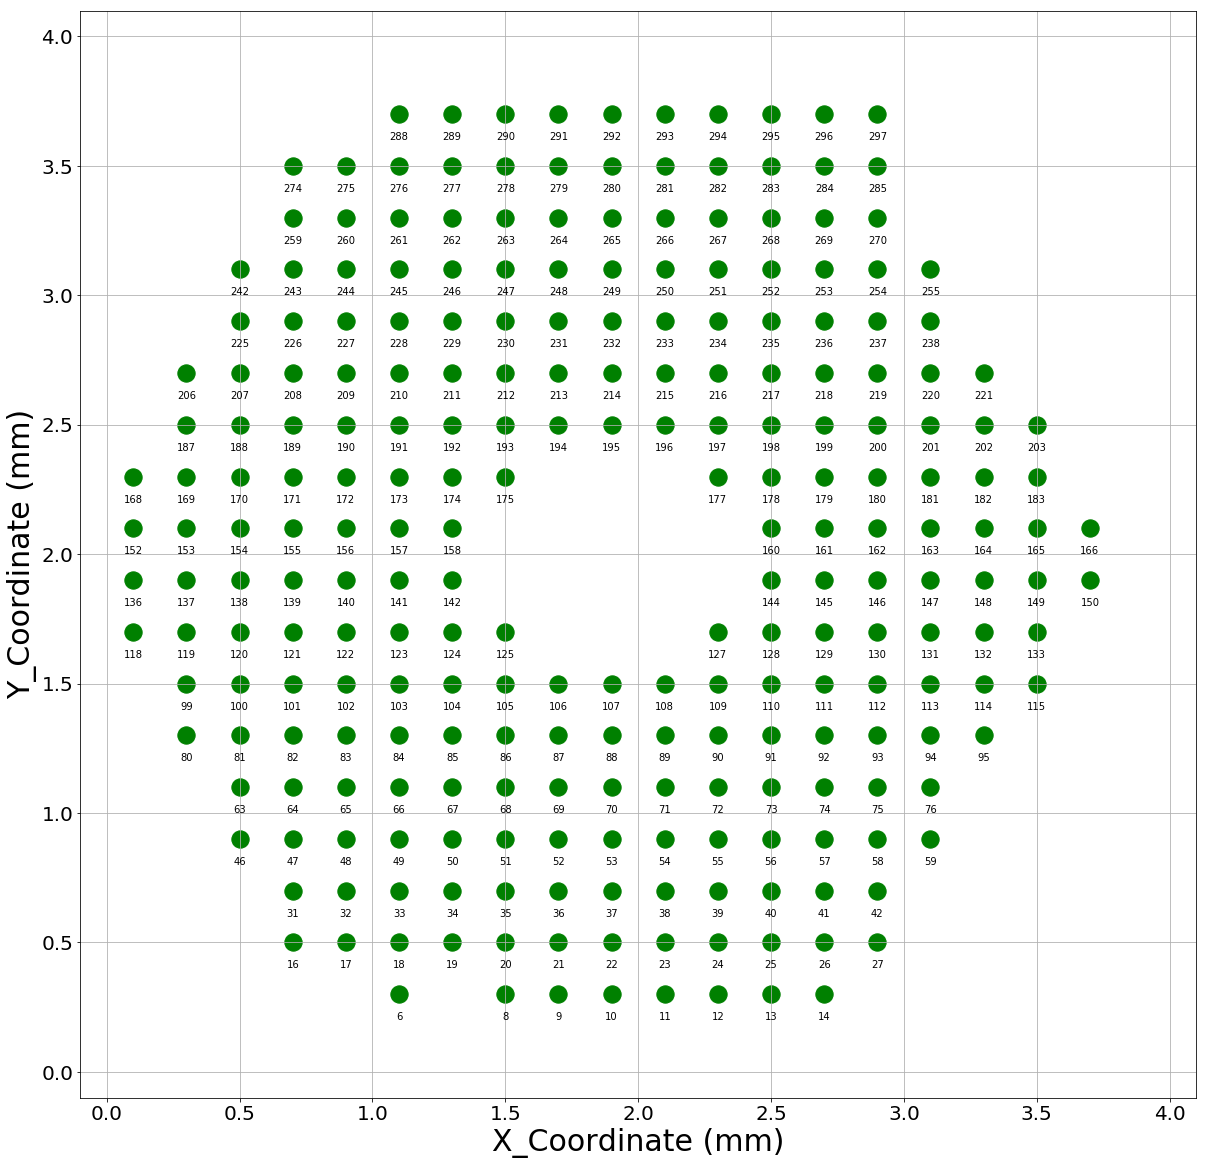

In [101]:
fig = plt.figure(figsize = (20, 20))
#red = plt.scatter(bad_x, bad_y, s = 300, c = 'r')
blue = plt.scatter(good_x, good_y, s = 300, c = 'g')
#plt.legend((red, blue), ('bad_points', 'good'), labelspacing = 1.5, fontsize = 20)
#ax = plt.gca()
#ax.set_aspect('equal')
#plt.colorbar(cmap="jet").set_label(label = 'Offsetcentroid_Std', size = 30)
#fig2 = plt.gcf()
#cbar_ax = fig2.axes[-1]
#cbar_ax.tick_params(labelsize=20)
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 4.1)

i = 0
while i < len(good_x):
    plt.text(good_x[i], good_y[i] - 0.1, str_survive[i], horizontalalignment='center')
    i += 1
        
plt.xlabel('X_Coordinate (mm)', fontsize = 30)
plt.ylabel('Y_Coordinate (mm)', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

# Residual RMS Array

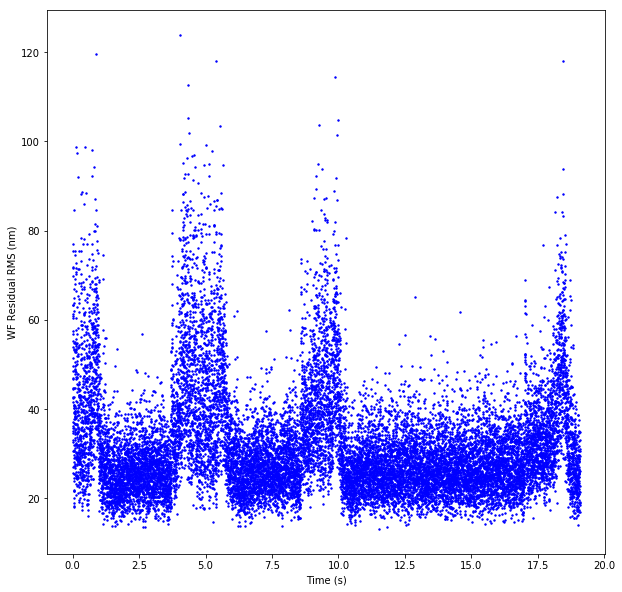

In [40]:
t_new = [t[x] for x in range(len(t)) if x % 2 == 0]
d = [list(data.a.residualrms[0][0])[x] for x in range(len(t)) if x % 4 ==0]
fig = plt.figure(figsize = (10, 10))
plt.scatter(t, data.a.residualrms[0][0], c = 'b', s = 2)
plt.xlabel('Time (s)')
plt.ylabel('WF Residual RMS (nm)')
plt.show()

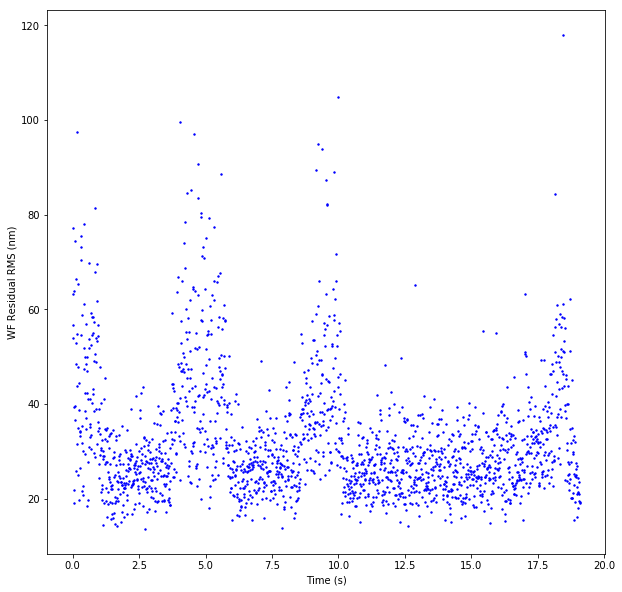

In [62]:
t_new = [t[x] for x in range(len(t)) if x %  10== 0]
d = [list(data.a.residualrms[0][0])[x] for x in range(len(t)) if x % 10 == 0]
fig = plt.figure(figsize = (10, 10))
plt.scatter(t_new, d, c = 'b', s = 2)
plt.xlabel('Time (s)')
plt.ylabel('WF Residual RMS (nm)')
plt.show()

In [50]:
d[0]

53.938053

In [33]:
sp = np.fft.fft(data.a.residualrms[0][0])
freq = np.fft.fftfreq(t.shape[-1])

In [34]:
len(sp)

19072

In [35]:
freq.shape

(19072,)

In [36]:
spacing = []
i = 0
while i < len(sp) - 1:
    spacing.append(1 / (t[i + 1] - t[i]))
    i += 1
spacing

[999.6001599360255,
 999.7000899730083,
 999.6001599360253,
 999.7000899730085,
 999.6001599360253,
 999.7000899730082,
 999.6001599360253,
 999.700089973009,
 999.6001599360253,
 999.7000899730073,
 999.6001599360253,
 999.6001599360253,
 999.700089973009,
 999.6001599360253,
 999.700089973009,
 999.6001599360236,
 999.700089973009,
 999.6001599360271,
 999.7000899730056,
 999.6001599360271,
 999.700089973009,
 999.6001599360236,
 999.6001599360271,
 999.700089973009,
 999.6001599360236,
 999.700089973009,
 999.6001599360236,
 999.700089973009,
 999.6001599360271,
 999.700089973009,
 999.6001599360236,
 999.700089973009,
 999.6001599360271,
 999.7000899730056,
 999.6001599360271,
 999.6001599360271,
 999.7000899730056,
 999.6001599360271,
 999.7000899730056,
 999.6001599360271,
 999.7000899730056,
 999.6001599360271,
 999.7000899730056,
 999.6001599360271,
 999.7000899730125,
 999.6001599360202,
 999.6001599360271,
 999.7000899730125,
 999.6001599360202,
 999.7000899730125,
 999.60015

In [37]:
data.a.residualrms[0][0]

array([53.938053, 48.556858, 61.2483  , ..., 22.694565, 18.99293 ,
       16.99224 ], dtype=float32)

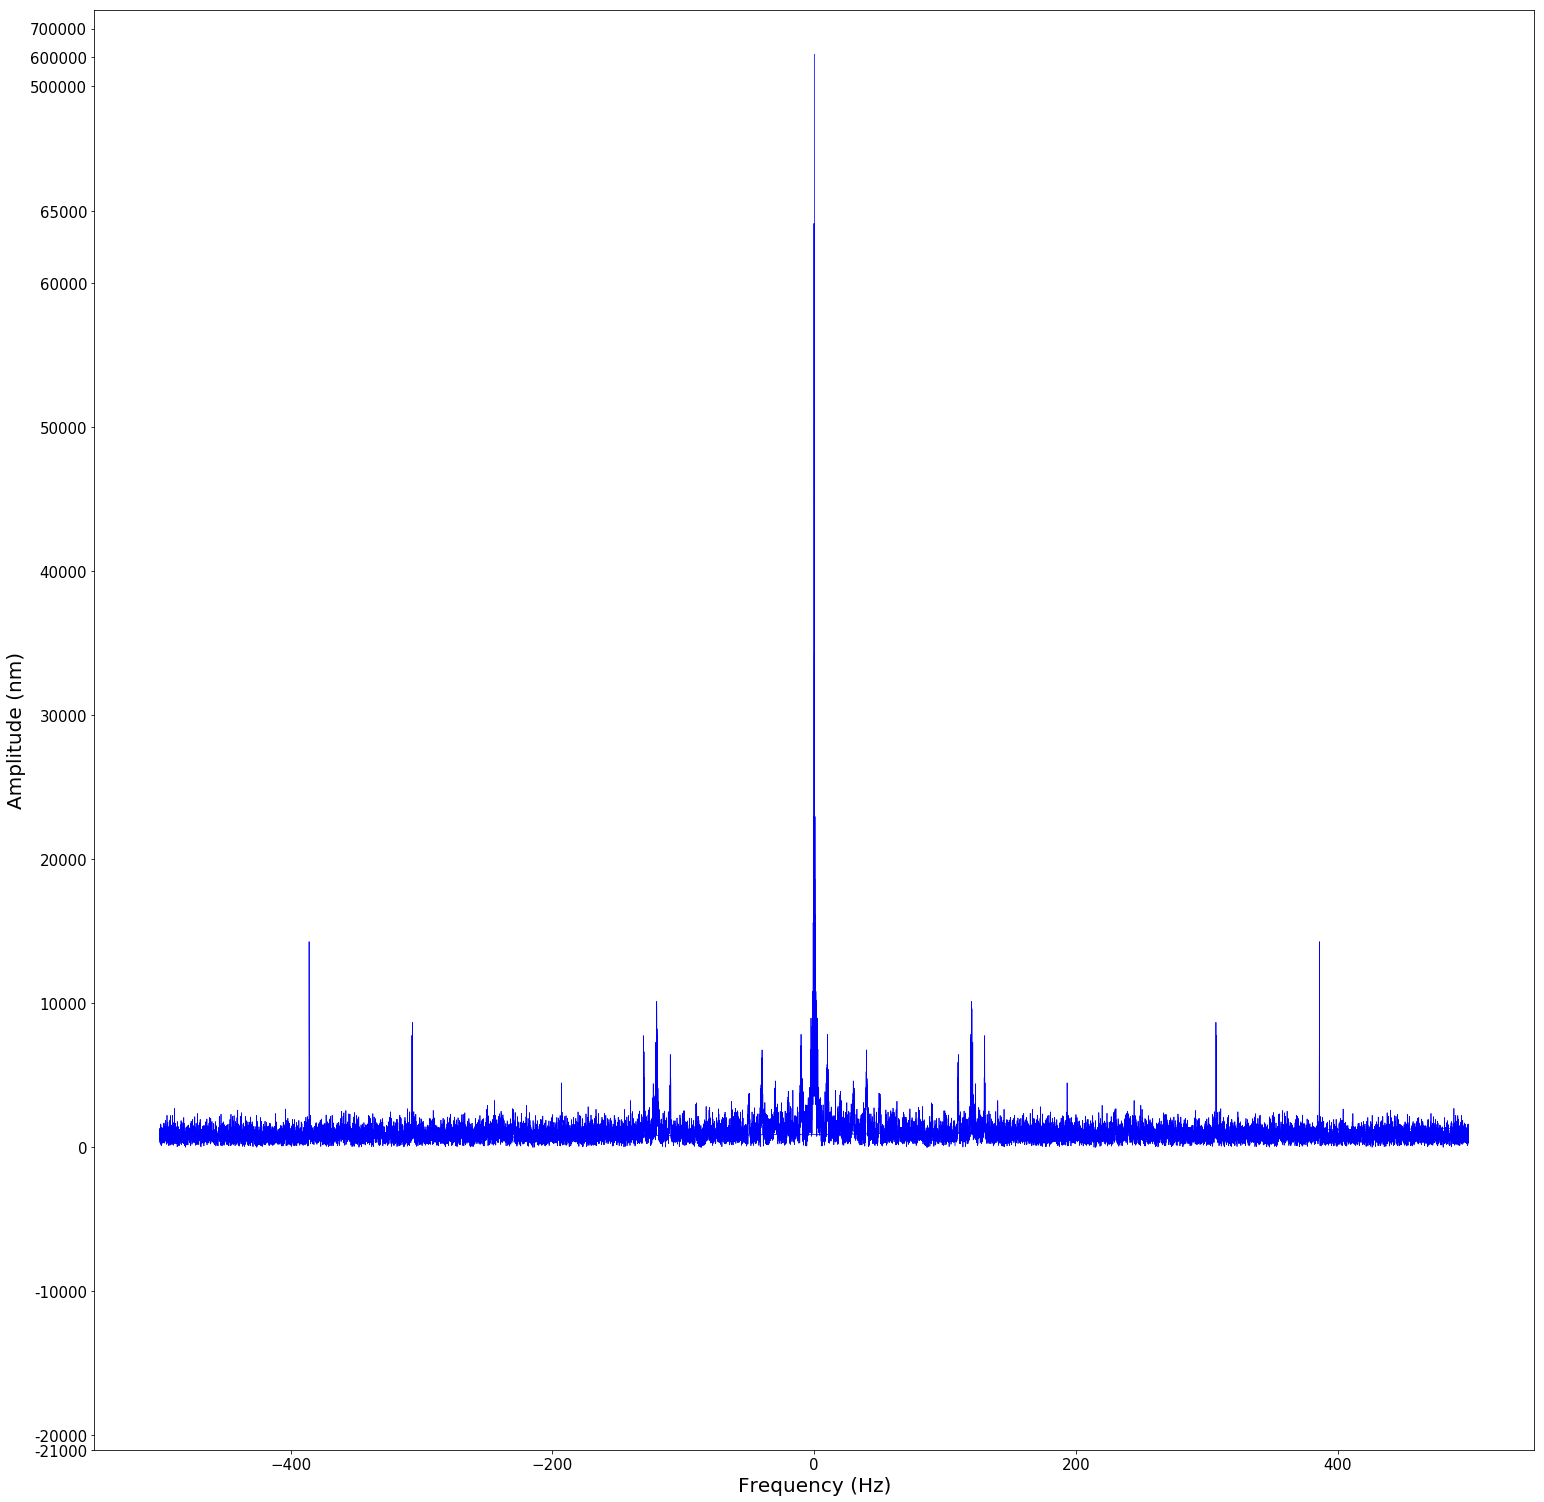

In [38]:
sp = np.fft.fft(data.a.residualrms[0][0])
freq = np.fft.fftfreq(t.shape[-1], d = 0.001)
#ax.plot(freq, data_scaled, c = 'b', linewidth = 0.5)
def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]

d = list(abs(sp))

source_scale = (65000, 700000)
destination_scale = (86, 98.7) 
sour = (-21000, 65000)
dest = (0, 86)
data_scaled = [abs(scale(x, sour, dest)) if x < 65000 else abs(scale(x, source_scale, destination_scale)) for x in d]
fig = plt.figure(figsize = (20, 20))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)
ax.plot(freq, data_scaled, c = 'b', linewidth = 0.5)
ax.set_yticks([0, 1, 11, 21, 31, 41, 51, 61, 71, 81, 86, 94.7, 96.7, 98.7])
ax.set_yticklabels(['-21000', '-20000', '-10000', '0', '10000', '20000', '30000', '40000', '50000', '60000', '65000', '500000','600000', '700000'])
ax.set_ylim(0, 100)
#ax.set_xlim(-0.00005, 0.00051)
ax.set_xlabel('Frequency (Hz)', fontsize = 20)
ax.set_ylabel('Amplitude (nm)', fontsize = 20)
ax.tick_params(labelsize = 15)
ax.plot(freq, data_scaled, c = 'b', linewidth = 0.5)



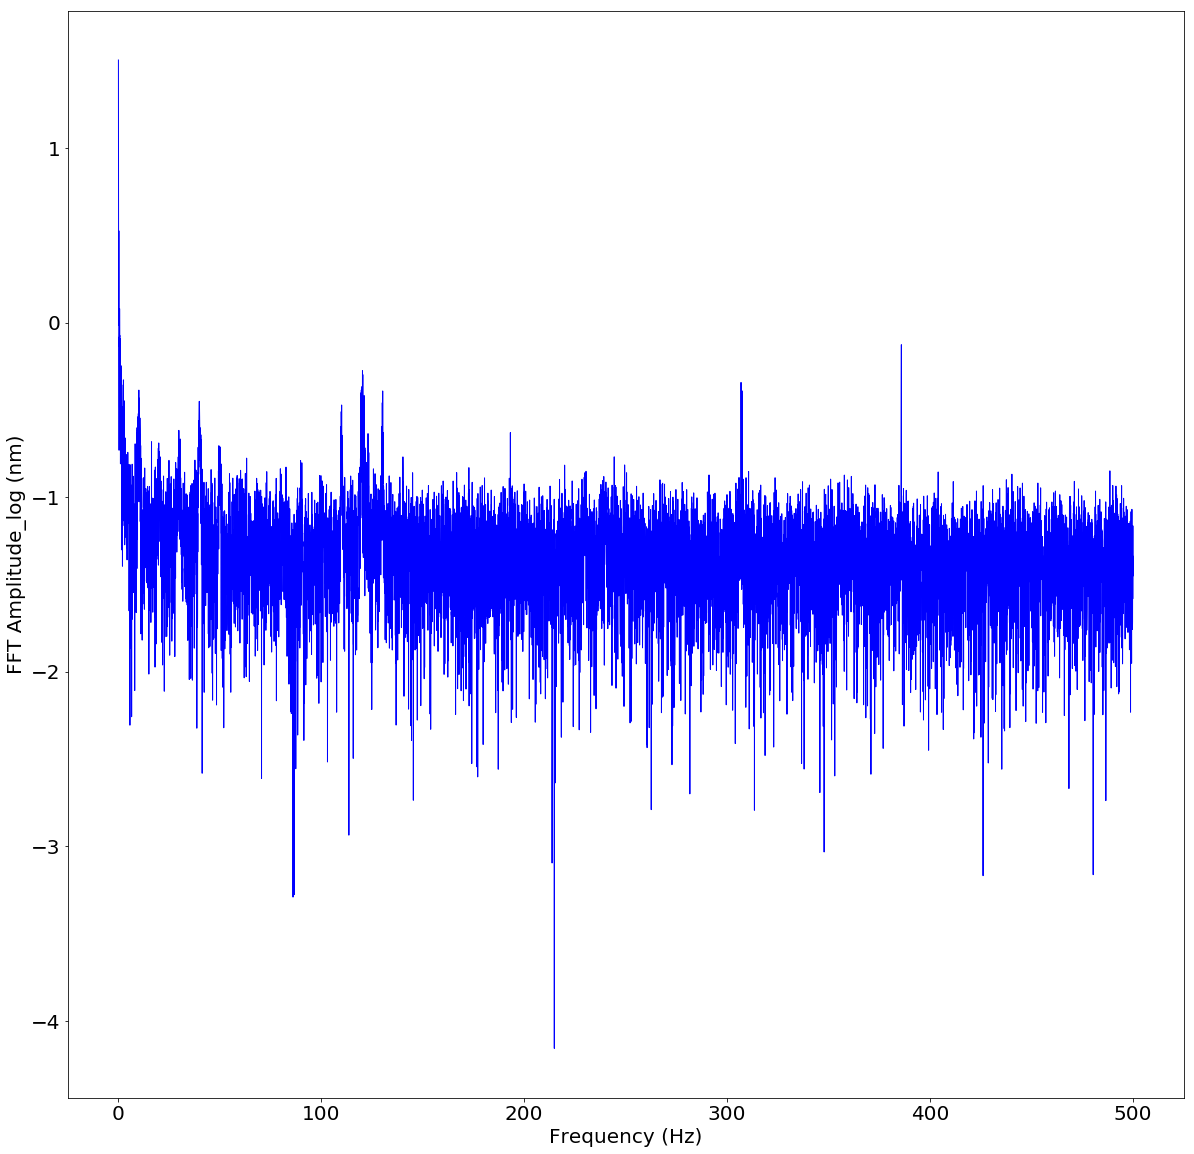

In [73]:
sp = np.fft.rfft(data.a.residualrms[0][0])
freq = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.plot(freq, np.log10(sp/19072), linewidth = 1, c = 'b')
plt.xlabel('Frequency (Hz)', fontsize = 20)
plt.ylabel('FFT Amplitude_log (nm)', fontsize = 20)
ax = plt.gca()
ax.tick_params(labelsize = 20)

(-0.1, 15)

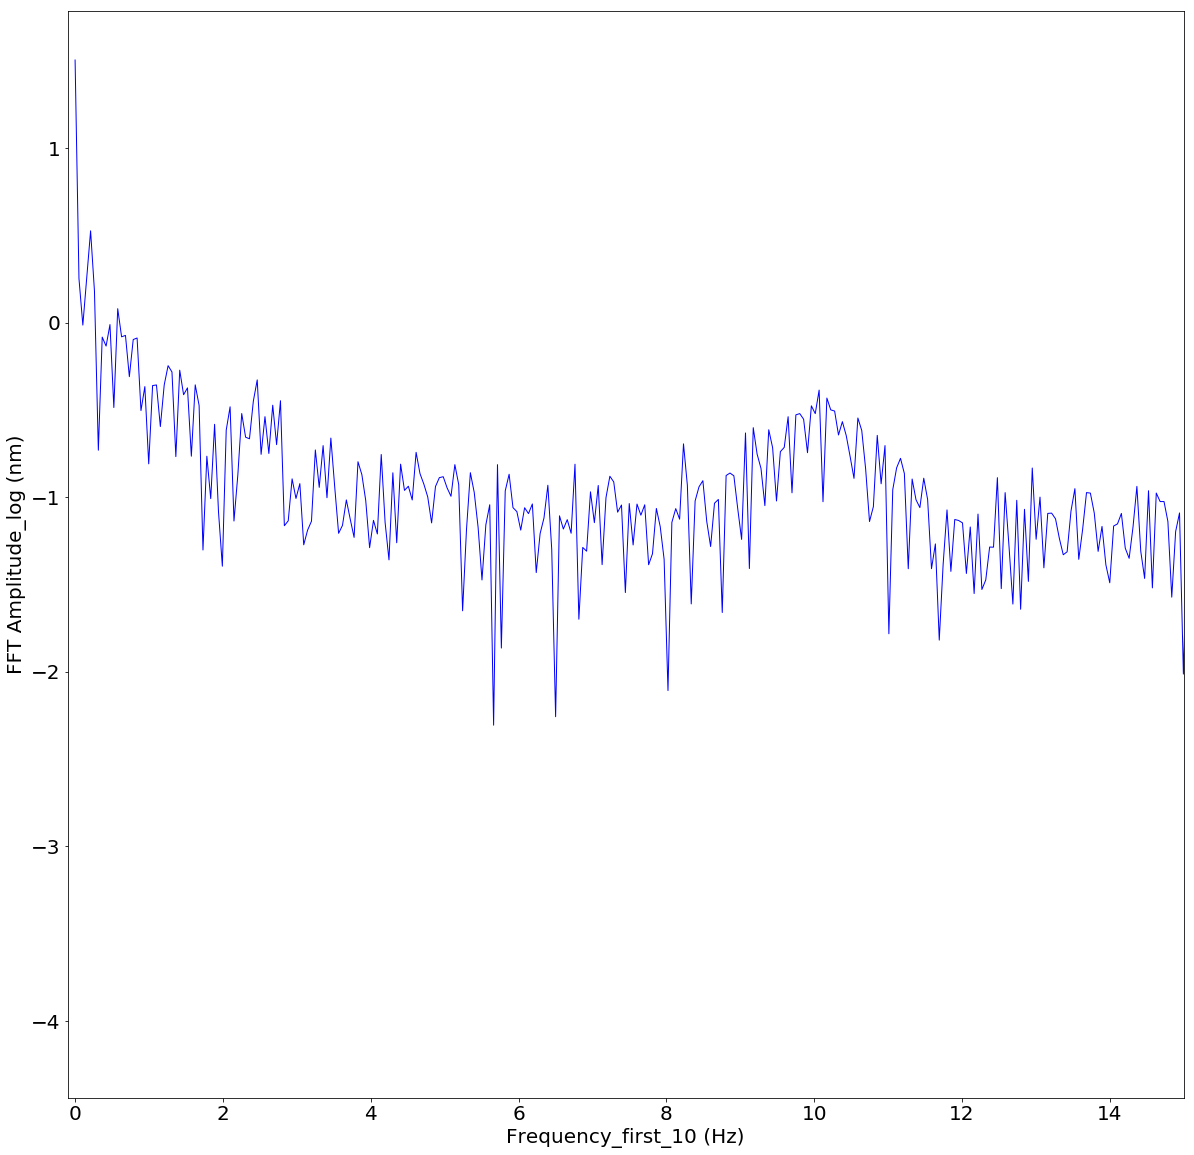

In [109]:
sp = np.fft.rfft(data.a.residualrms[0][0])
freq = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.plot(freq, np.log10(sp/19072).real,linewidth = 1, c = 'b')
plt.xlabel('Frequency_first_10 (Hz)', fontsize = 20)
plt.ylabel('FFT Amplitude_log (nm)', fontsize = 20)
ax = plt.gca()
ax.tick_params(labelsize = 20)
ax.set_xlim(-0.1, 15)

(-0.1, 15)

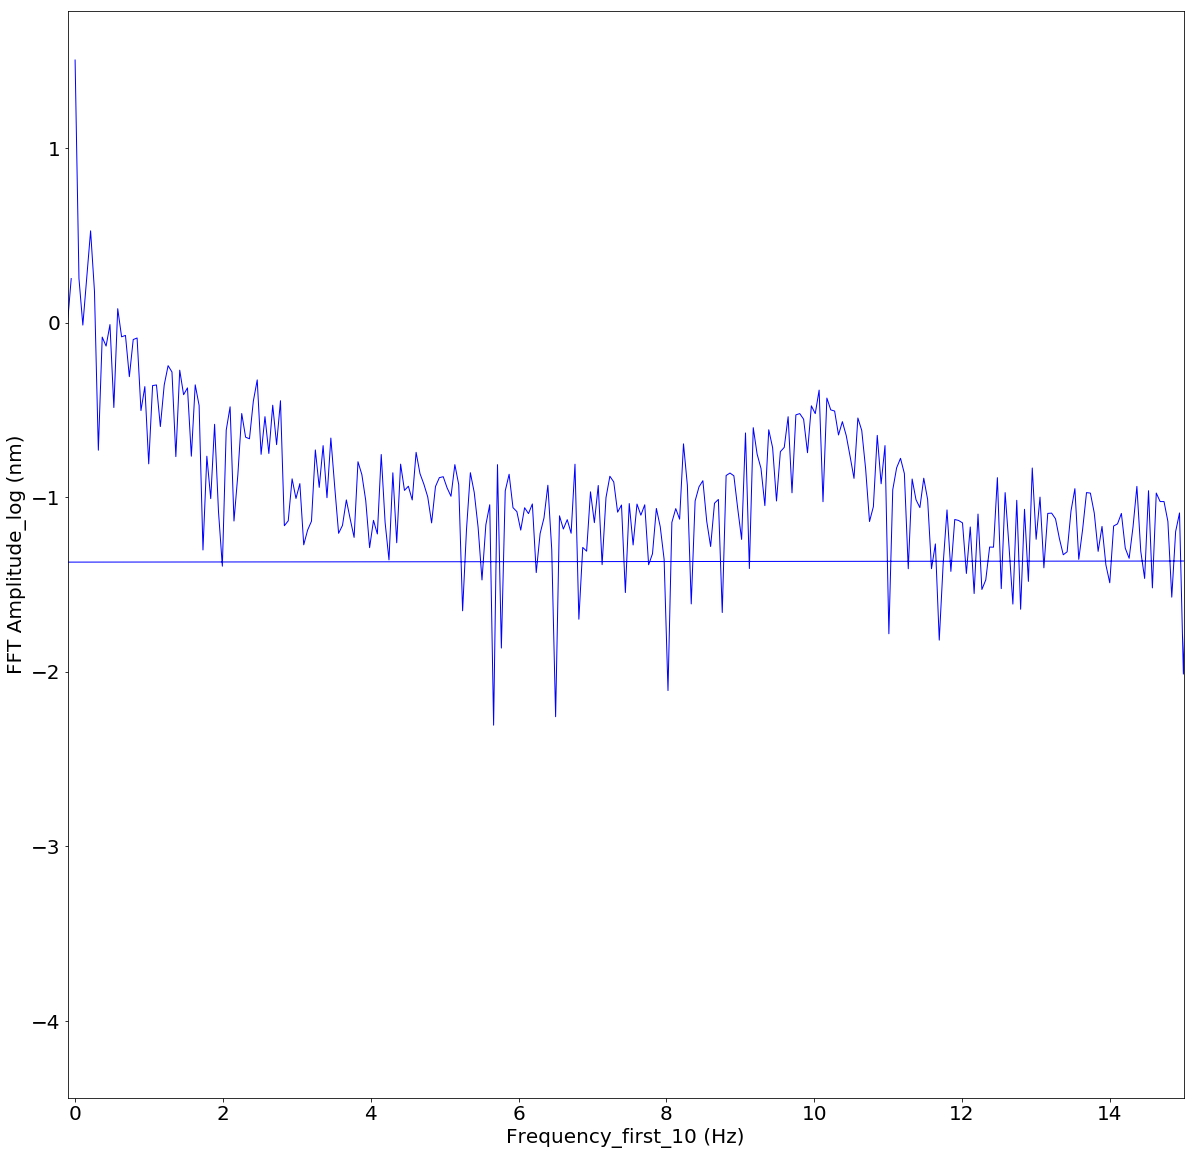

In [105]:
sp = np.fft.fft(data.a.residualrms[0][0])
freq = np.fft.fftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.plot(freq, np.log10(abs(sp).real/19072),linewidth = 1, c = 'b')
plt.xlabel('Frequency_first_10 (Hz)', fontsize = 20)
plt.ylabel('FFT Amplitude_log (nm)', fontsize = 20)
ax = plt.gca()
ax.tick_params(labelsize = 20)
ax.set_xlim(-0.1, 15)

In [76]:
sp/19072

array([ 3.2026787e+01+0.j        ,  4.1356269e-01-1.744077j  ,
        8.1077552e-01+0.53299975j, ..., -5.2635145e-04+0.03533608j,
       -5.2796382e-02+0.04391608j, -2.6360633e-02+0.j        ],
      dtype=complex64)

In [78]:
sp2 = np.fft.fft(data.a.residualrms[0][0])
sp2/19072

array([32.026787  +0.j        ,  0.4135627 -1.744077j  ,
        0.8107755 +0.53299975j, ...,  0.03983136-1.8045753j ,
        0.8107755 -0.53299975j,  0.4135627 +1.744077j  ], dtype=complex64)

In [82]:
all(sp == sp2)

True

In [88]:
freq2 = np.fft.fftfreq(t.shape[-1], d = 0.001)
freq.shape

(9537,)

In [89]:
freq2.shape

(19072,)

In [110]:
sp.shape

(9537,)

In [95]:
9537*2

19074

In [94]:
sp2.shape

(19072,)

In [114]:
sp[0:100]

array([ 6.1081488e+05    +0.j     ,  7.8874678e+03-33263.035j  ,
        1.5463110e+04+10165.371j  ,  7.5966376e+02+34416.86j   ,
        6.3606164e+04 +8387.75j   , -7.8950234e+03-27822.924j  ,
        2.9265249e+03 +2010.7659j , -1.5149834e+04 +4456.6523j ,
        1.3834662e+04 -2303.2551j , -1.6096834e+04 -9379.932j  ,
        9.0581616e+02 -6171.4067j , -2.0859211e+04 -9622.595j  ,
       -1.5731002e+04 +1944.9733j , -1.0588902e+04+12187.574j  ,
       -1.0185731e+03 -9314.528j  , -1.4430205e+04 -5053.609j  ,
       -1.5563307e+04 -1158.9326j , -4.9028369e+02 +5970.317j  ,
       -7.7266418e+02 -8183.946j  ,  1.4234067e+03 -2602.7964j ,
       -2.1245059e+03 -8057.6475j ,  7.6941250e+03 -3368.1223j ,
        8.3041803e+02 -4780.6953j ,  8.3869375e+03  -479.4624j ,
        5.1901133e+03 -9509.191j  ,  4.2938149e+03 -8995.743j  ,
        1.9838696e+03 -2591.743j  ,  8.5954219e+03 -5508.129j  ,
        3.4205288e+03 -6543.1543j ,  1.4069614e+03 -7960.166j  ,
       -3.6079141e+02 +32

In [119]:
all(sp2[0:9536] == sp[0:9536])

True

IndexError: index 9537 is out of bounds for axis 0 with size 9537

## Some Insights about Rescale

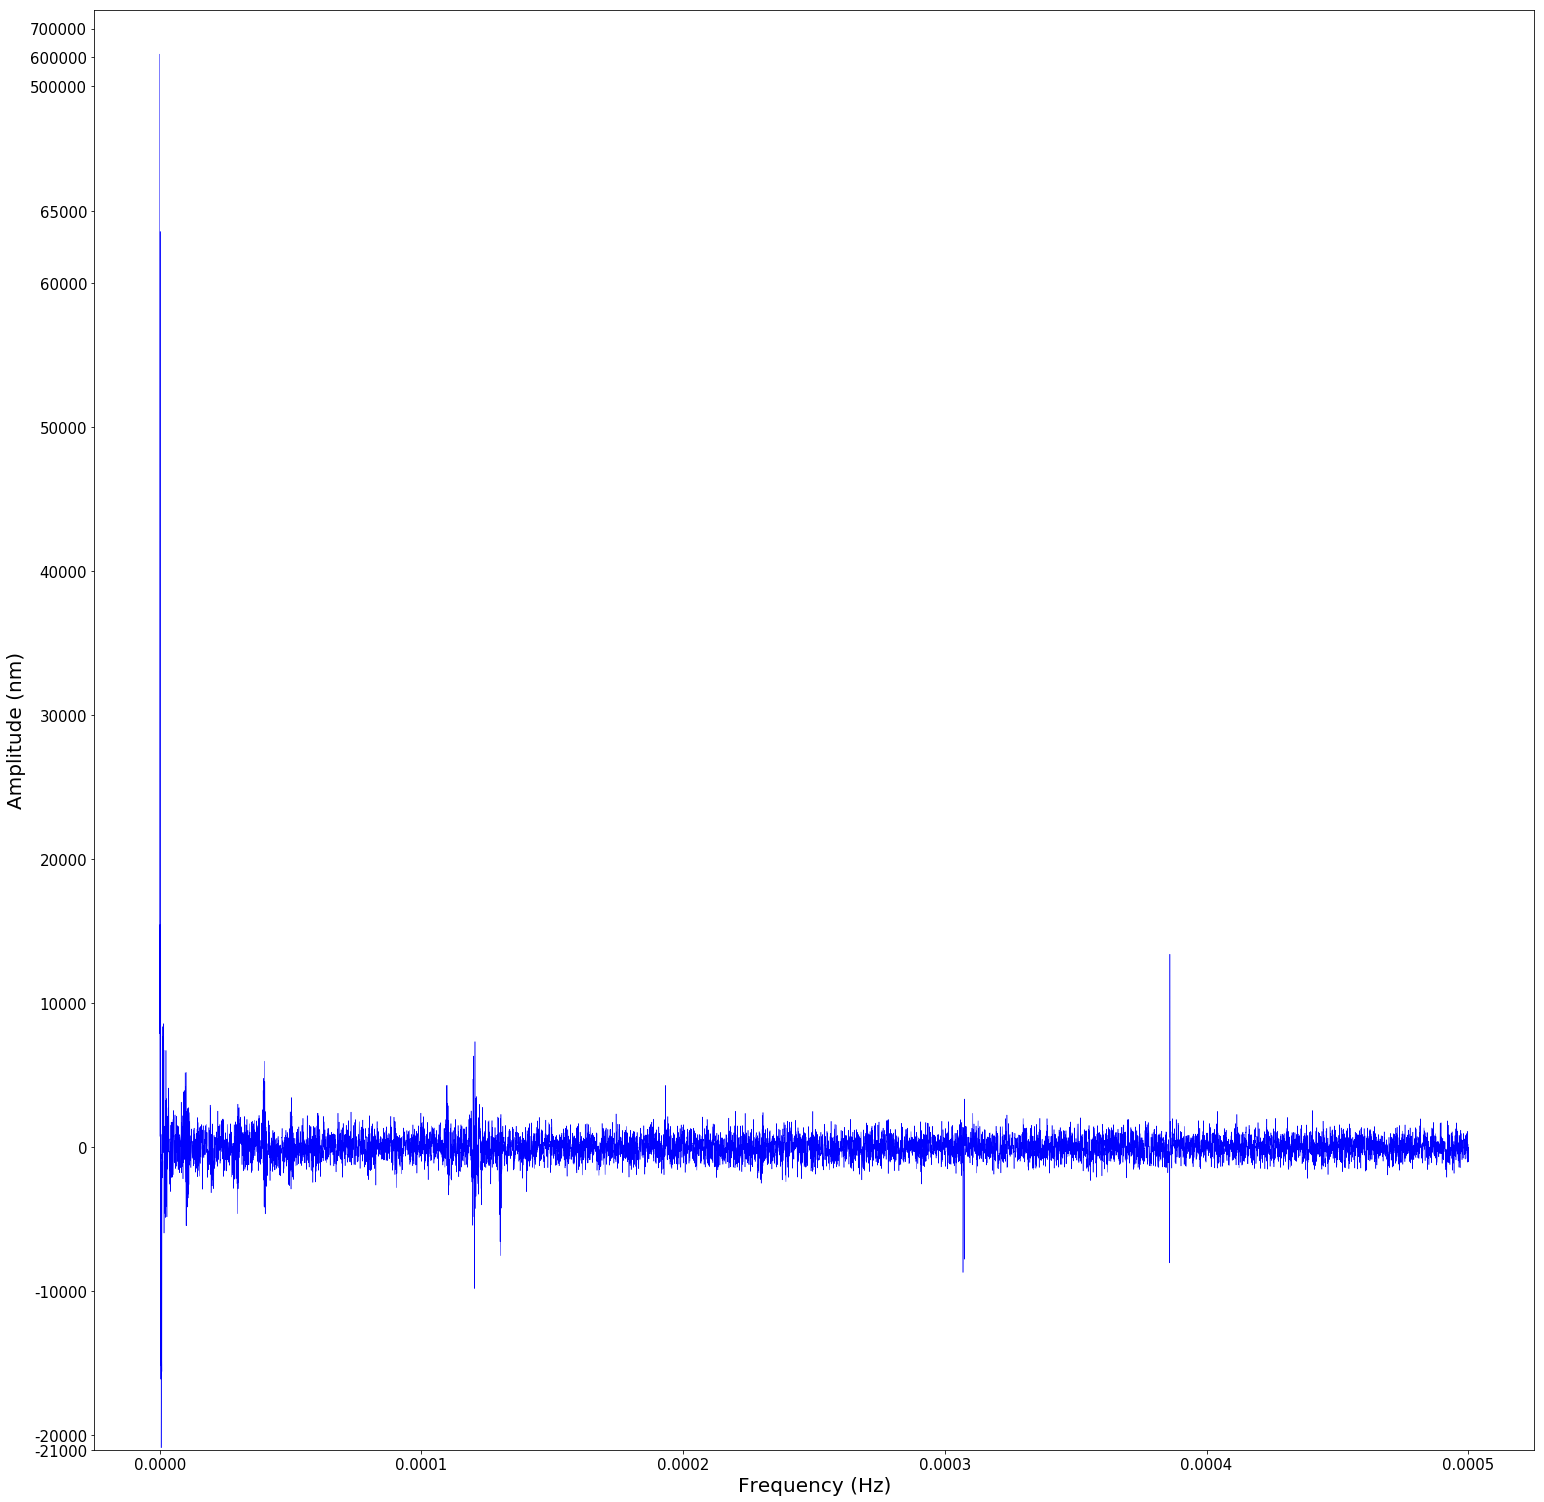

In [138]:
sp = np.fft.rfft(data.a.residualrms[0][0])
freq = np.fft.rfftfreq(t.shape[-1], d = 999.7)
#ax.plot(freq, q, c = 'b', linewidth = 0.5)
def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]

d = list(sp)

source_scale = (65000, 700000)
destination_scale = (86, 98.7) 
sour = (-21000, 65000)
dest = (0, 86)
data_scaled = [scale(x, sour, dest) if x < 65000 else scale(x, source_scale, destination_scale) for x in d]
fig = plt.figure(figsize = (20, 20))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)
#ax.plot(freq, sp, c = 'b', linewidth = 0.5)
ax.set_yticks([0, 1, 11, 21, 31, 41, 51, 61, 71, 81, 86, 94.7, 96.7, 98.7])
ax.set_yticklabels(['-21000', '-20000', '-10000', '0', '10000', '20000', '30000', '40000', '50000', '60000', '65000', '500000','600000', '700000'])
ax.set_ylim(0, 100)
#ax.set_xlim(-0.00005, 0.00051)
ax.set_xlabel('Frequency (Hz)', fontsize = 20)
ax.set_ylabel('Amplitude (nm)', fontsize = 20)
ax.tick_params(labelsize = 15)
ax.plot(freq, data_scaled, c = 'b', linewidth = 0.5)



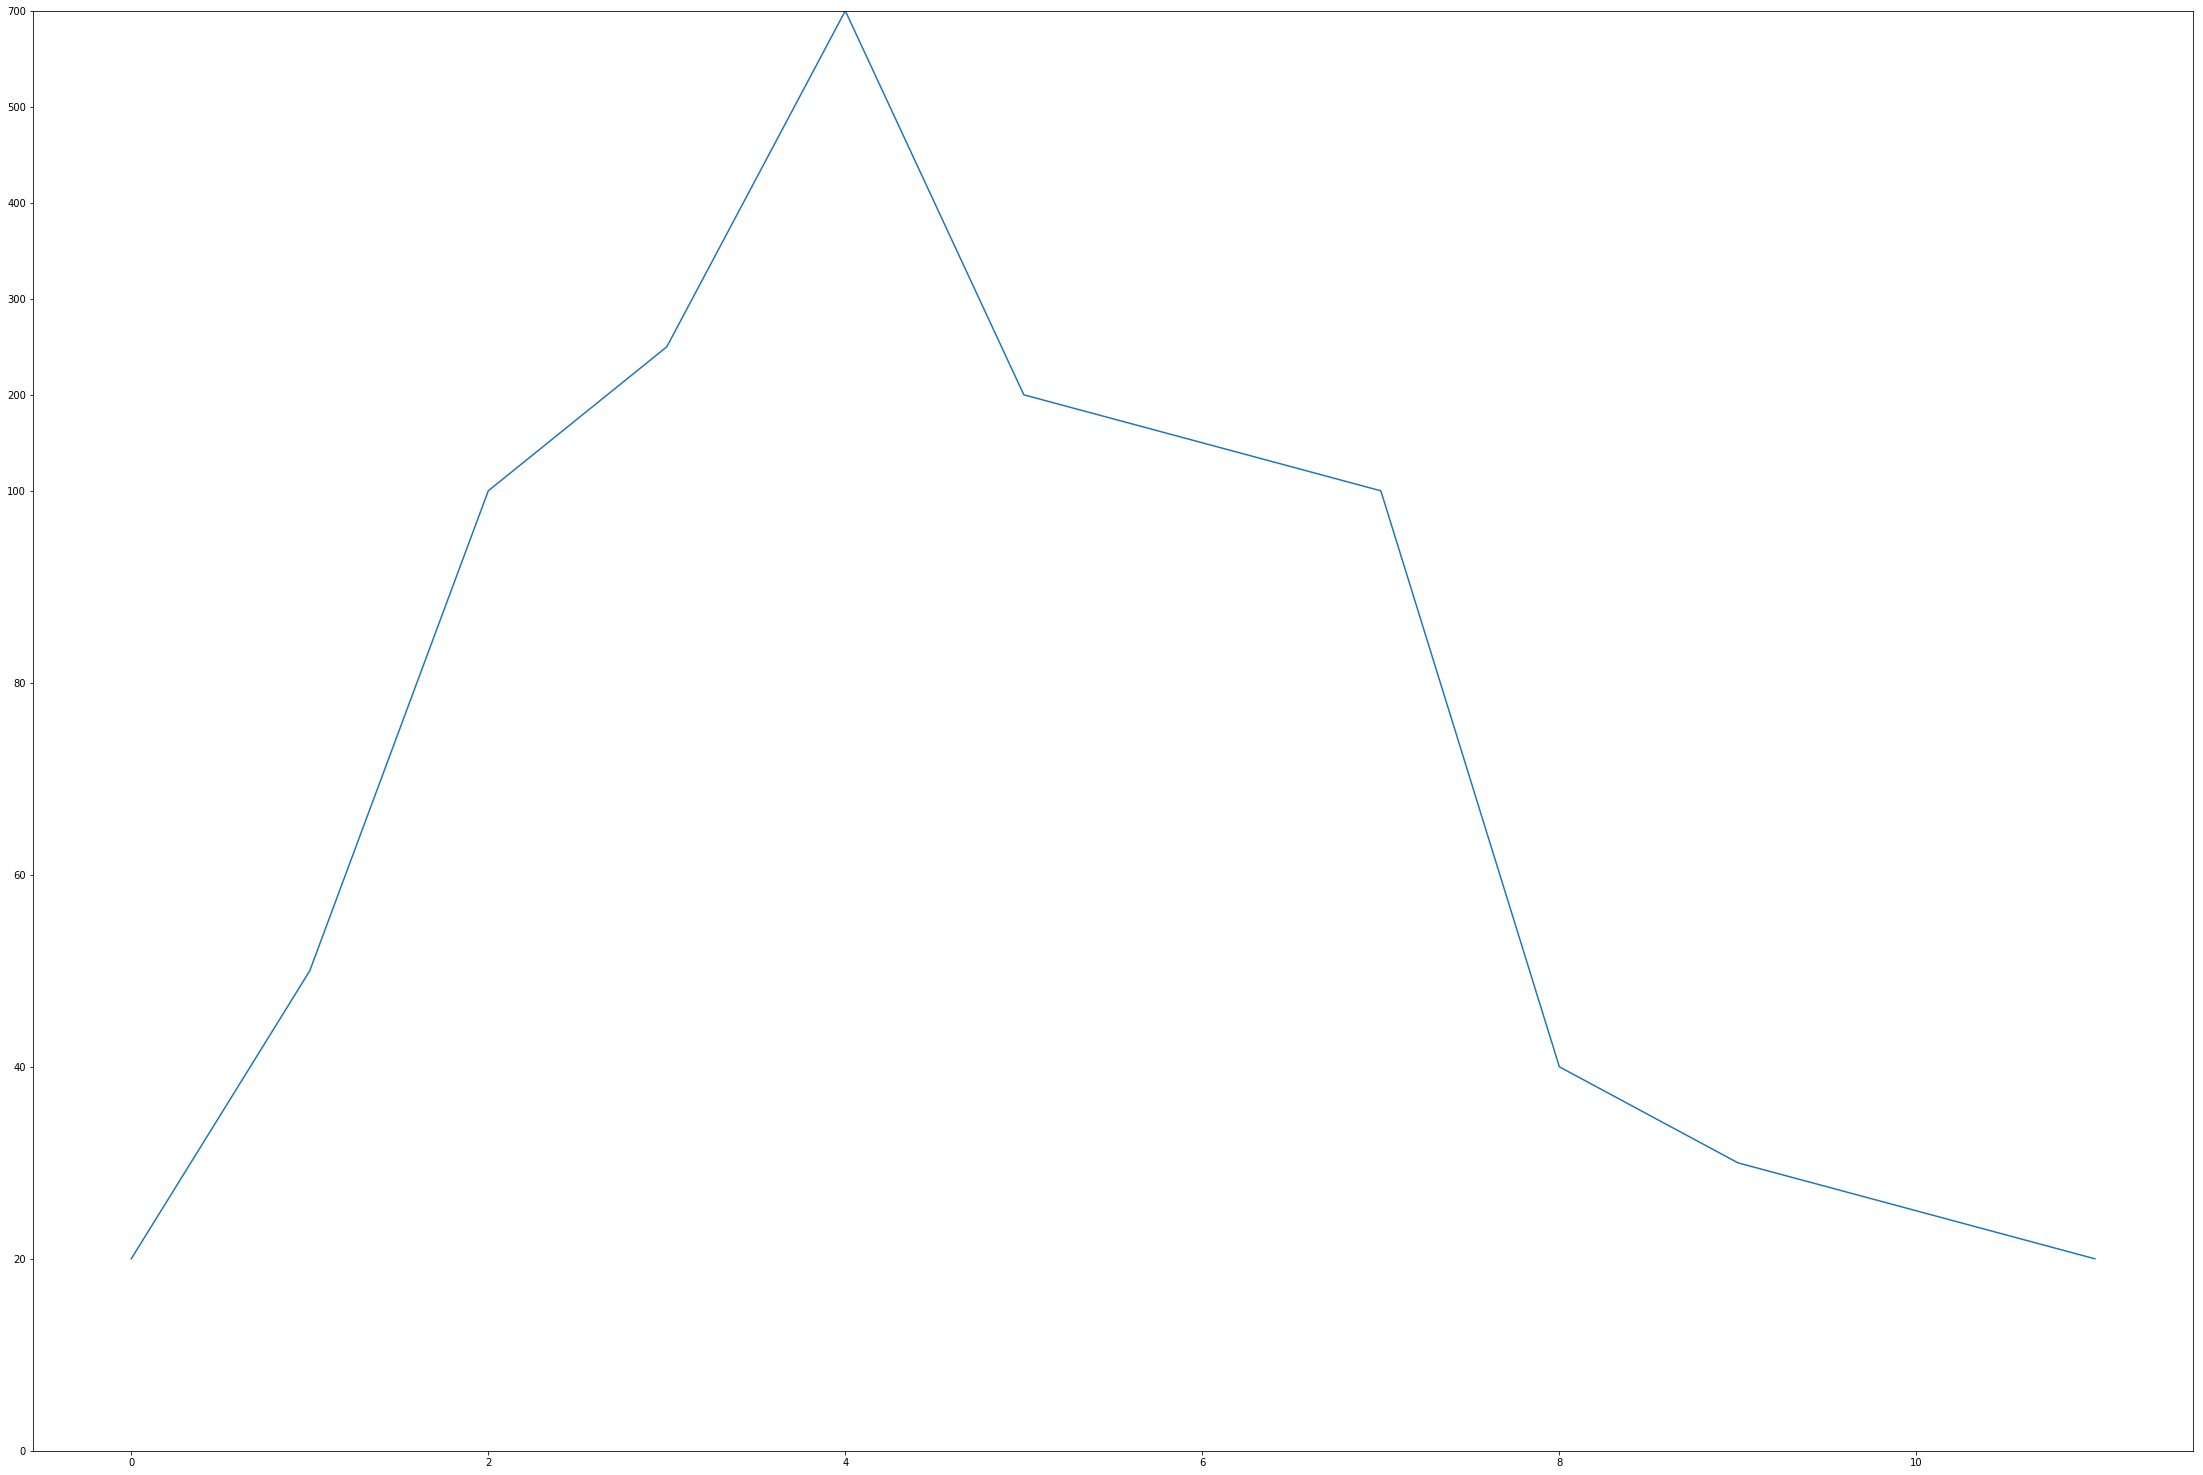

In [191]:
from matplotlib import pyplot as plt

def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]

# Actual data
data = [20, 50, 100, 250, 600, 200, 150, 100, 40, 30, 25, 20]

source_scale = (100, 600) # Scale values between 100 and 600
destination_scale = (100, 150) # to a scale between 100 and 150

# Apply scale to all items of data that are above or equal to 100
data_scaled = [x if x < 100 else scale(x, source_scale, destination_scale) for x in data]

# Set up a simple plot
fig = plt.figure()
ax = plt.Axes(fig, [1.,1.,5.,5.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([0,20,40,60,80,100,110,120,130,140,150])
ax.set_ylim(0, 150)
# Set the labels to the actual values
ax.set_yticklabels(["0","20","40","60","80","100","200","300","400","500","700"])

ax.plot(data_scaled)

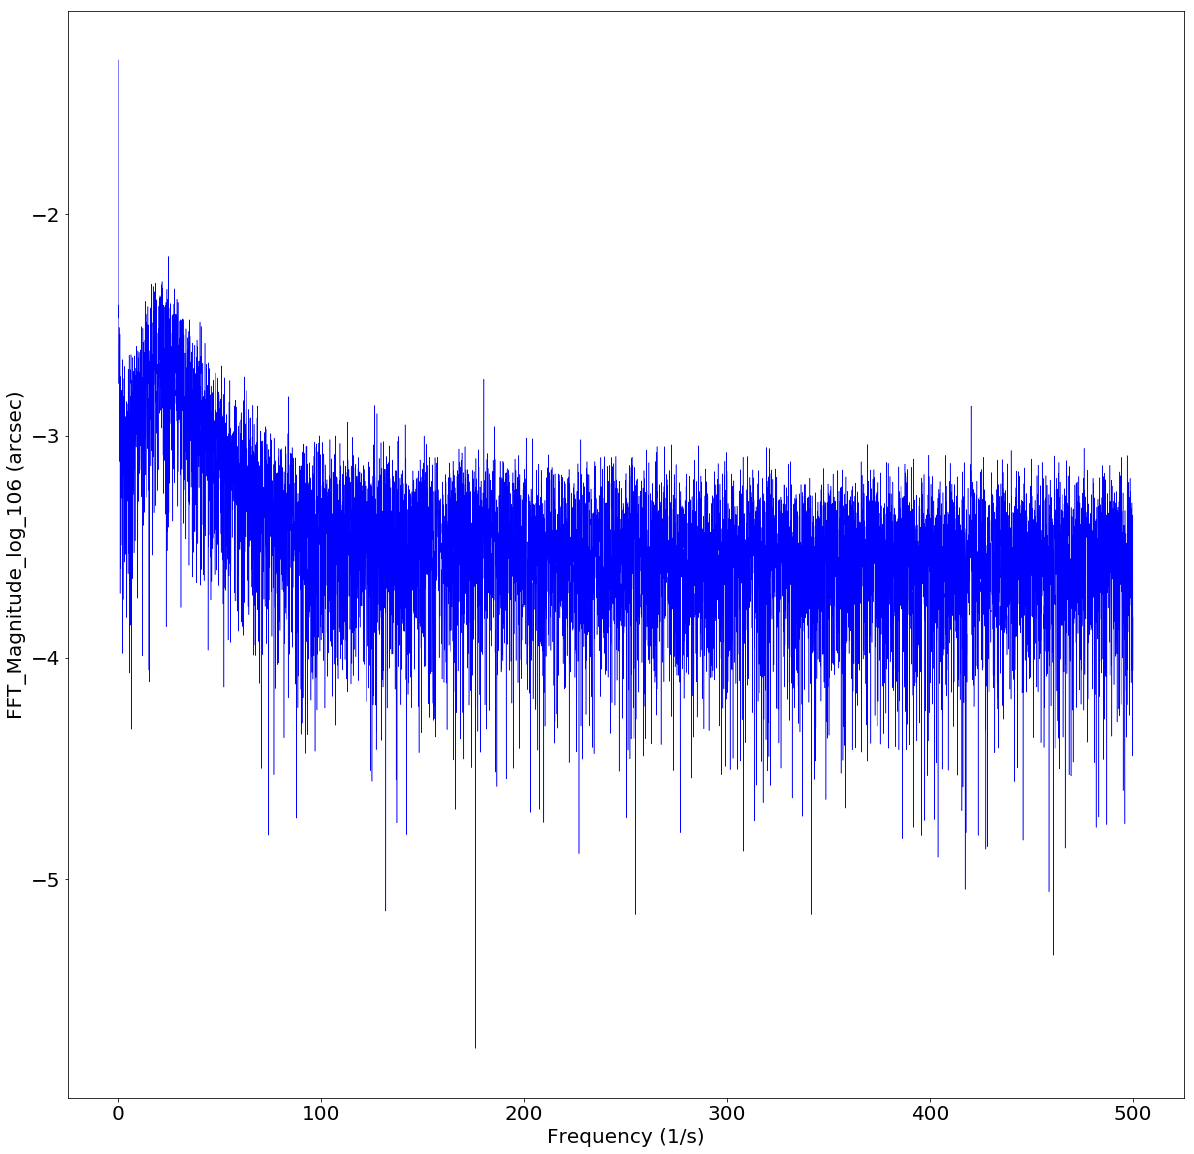

In [214]:
coef = np.fft.rfft(data.a.offsetcentroid[0][:, 210])
f = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.ylabel('FFT_Magnitude_log_106 (arcsec)', fontsize = 20)
plt.xlabel('Frequency (1/s)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(f, np.log10(coef/19072), c = 'b', linewidth = 0.5)

(-1, 100)

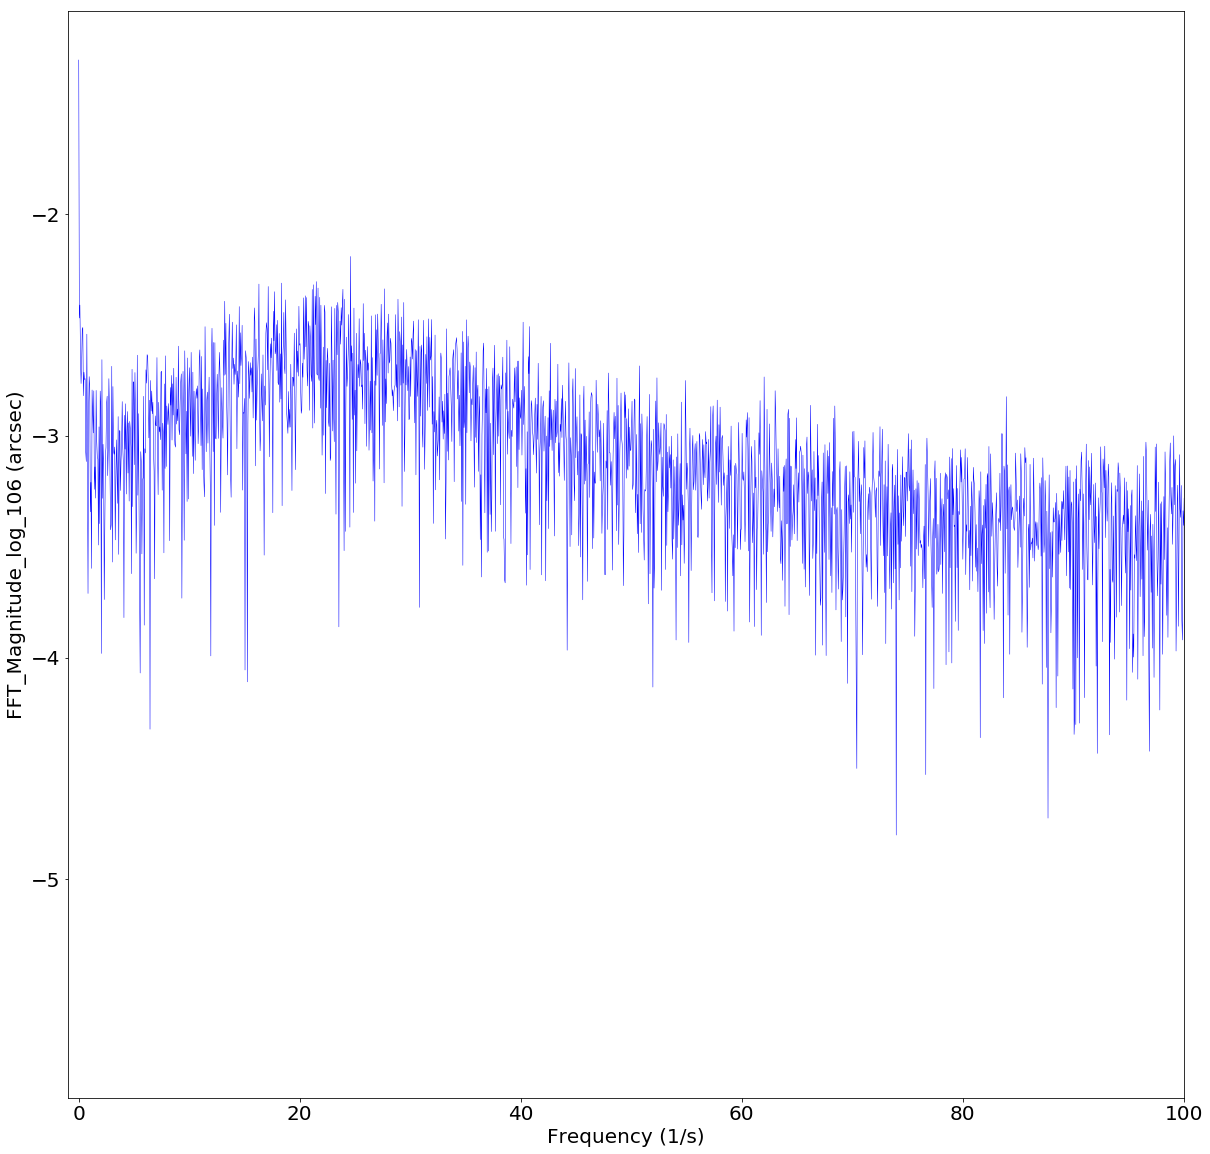

In [213]:
coef = np.fft.rfft(data.a.offsetcentroid[0][:, 210])
f = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.ylabel('FFT_Magnitude_log_106 (arcsec)', fontsize = 20)
plt.xlabel('Frequency (1/s)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(f, np.log10(coef/19072), c = 'b', linewidth = 0.5)
plt.xlim(-1, 100)

## Tip-Tilt

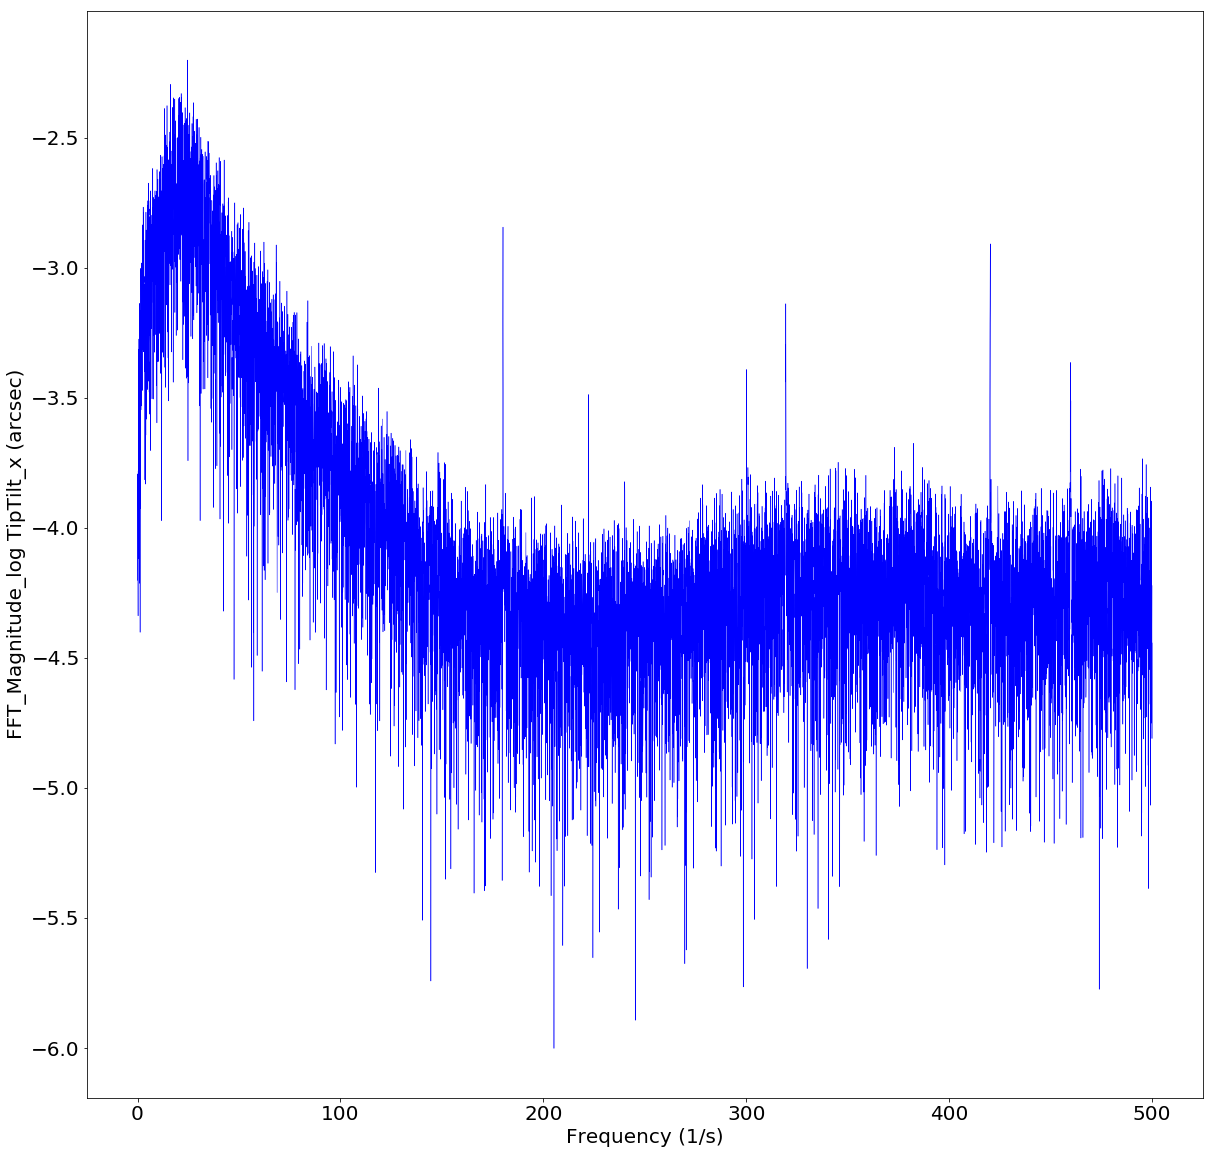

In [215]:
coef = np.fft.rfft(data.a.residualwavefront[0][:, 349])
f = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.ylabel('FFT_Magnitude_log TipTilt_x (arcsec)', fontsize = 20)
plt.xlabel('Frequency (1/s)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(f, np.log10(coef/19072), c = 'b', linewidth = 0.5)


(-1, 100)

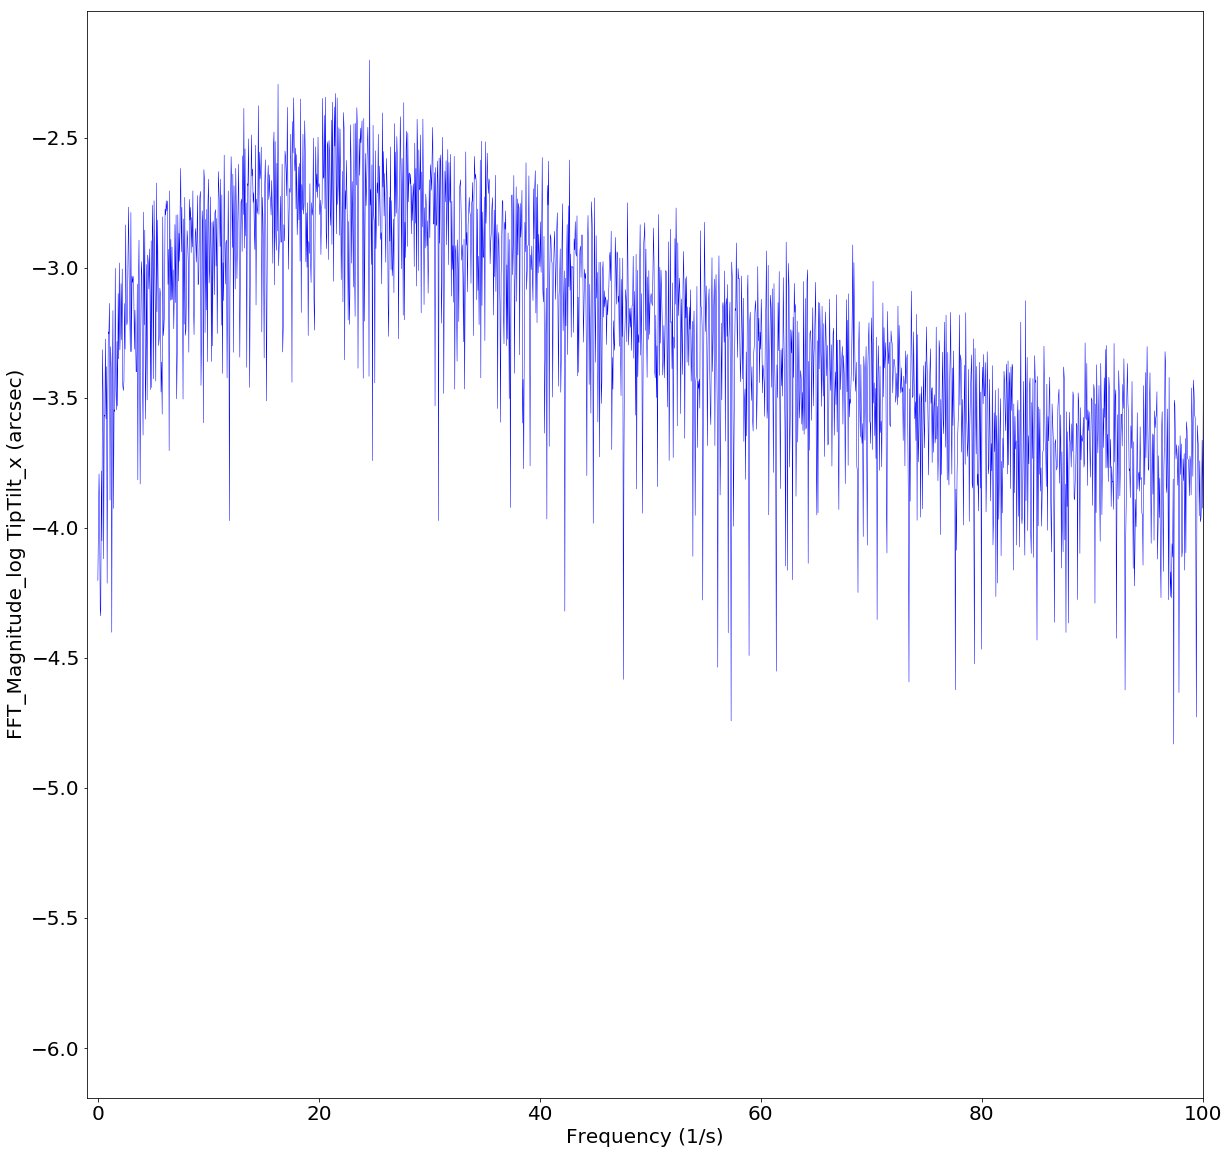

In [216]:
coef = np.fft.rfft(data.a.residualwavefront[0][:, 349])
f = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.ylabel('FFT_Magnitude_log TipTilt_x (arcsec)', fontsize = 20)
plt.xlabel('Frequency (1/s)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(f, np.log10(coef/19072), c = 'b', linewidth = 0.5)
plt.xlim(-1, 100)

# Some trash about STD & getting rid of bad lenslet points

In [ ]:
i = 0
std_all2 = []
while i < 304:
    std_all2.append(sqrt((data.a.offsetcentroid[0][:, i].std())**2 + (data.a.offsetcentroid[0][:, i + 304].std())**2))
    i += 1
    
len(std_all2)

In [ ]:
fig = plt.figure()
plt.scatter(std_all2, ap, s = 20, c = 'b')
plt.show()

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.scatter(data.a.offsetcentroid[0][:,606], data.a.offsetcentroid[0][:,607], s = 3, c = 'b')
plt.grid()

In [ ]:
x = data.a.offsetcentroid[0][:,606]
y = data.a.offsetcentroid[0][:,607]

In [ ]:
y = data.a.offsetcentroid[0][:,607]

In [ ]:
a = data.a.offsetcentroid[0][:,606].max()
i = 0
count_max = []
while i < 19072:
    if x[i] == a:
        count_max.append(i)
    i += 1

len(count_max)

b = data.a.offsetcentroid[0][:,606].min()
i = 0
count_min = []
while i < 19072:
    if x[i] == b:
        count_min.append(i)
    i += 1

count_min
len(count_min)

c = data.a.offsetcentroid[0][:,607].max()
i = 0
count_maxy = []
while i < 19072:
    if y[i] == c:
        count_maxy.append(i)
    i += 1

len(count_maxy)

d = data.a.offsetcentroid[0][:,607].min()
i = 0
count_miny = []
while i < 19072:
    if y[i]>(d-0.001) and y[i]<(d+0.001):
        count_miny.append(i)
    i += 1

len(count_miny)
            

In [ ]:
b = data.a.offsetcentroid[0][:,606].min()
i = 0
count_min = []
while i < 19072:
    if x[i] == b:
        count_min.append(i)
    i += 1

count_min
len(count_min)

In [ ]:
c = data.a.offsetcentroid[0][:,607].max()
i = 0
count_maxy = []
while i < 19072:
    if y[i] == c:
        count_maxy.append(i)
    i += 1

len(count_maxy)
            

In [ ]:
d = data.a.offsetcentroid[0][:,607].min()
i = 0
count_miny = []
while i < 19072:
    if y[i]>(d-0.001) and y[i]<(d+0.001):
        count_miny.append(i)
    i += 1

len(count_miny)
            

In [ ]:
(c-d)/(a-b)

In [ ]:
i = 0
target_x = []
target_y = []
count = []
while i < 3624:
    if i not in count_min and (y[i]-d)/(x[i]-b) > 1.26 and (y[i]-d)/(x[i]-b) < 1.27:
        target_x.append(x[i])
        target_y.append(y[i])
        count.append(i)
    i += 1
    
len(target_x)

In [ ]:
len(count)

In [ ]:
i = 0
target_x = []
target_y = []
count = []
while i < 19072:
    if i not in count_min and (y[i]-d)/(x[i]-b) < -1.26 and (y[i]-d)/(x[i]-b) > -1.27:
        target_x.append(x[i])
        target_y.append(y[i])
        count.append(i)
    i += 1
    
len(target_x)

In [104]:
np.log10(-4+3j)

(0.6989700043360187+1.0849073731942938j)

In [51]:
test = data.a.offsetcentroid[0][0, :]*4.8*0.2*10**6/10**6


In [53]:
test.std()

0.2717644312499754

In [48]:
test.mean()

0.053648535

In [102]:
data.keys()

dict_keys(['a', 'b', 'uid', 'cid', 'nrec', 'rx', 'cent_origin', 'dm_origin', 'dtt_offset', 'tstamp_num', 'tstamp_str_start', 'cent_g', 'dm_servo', 'dt_servo', 'apd_imat', 'apd_sky_back', 'apd_threshold', 'header'])

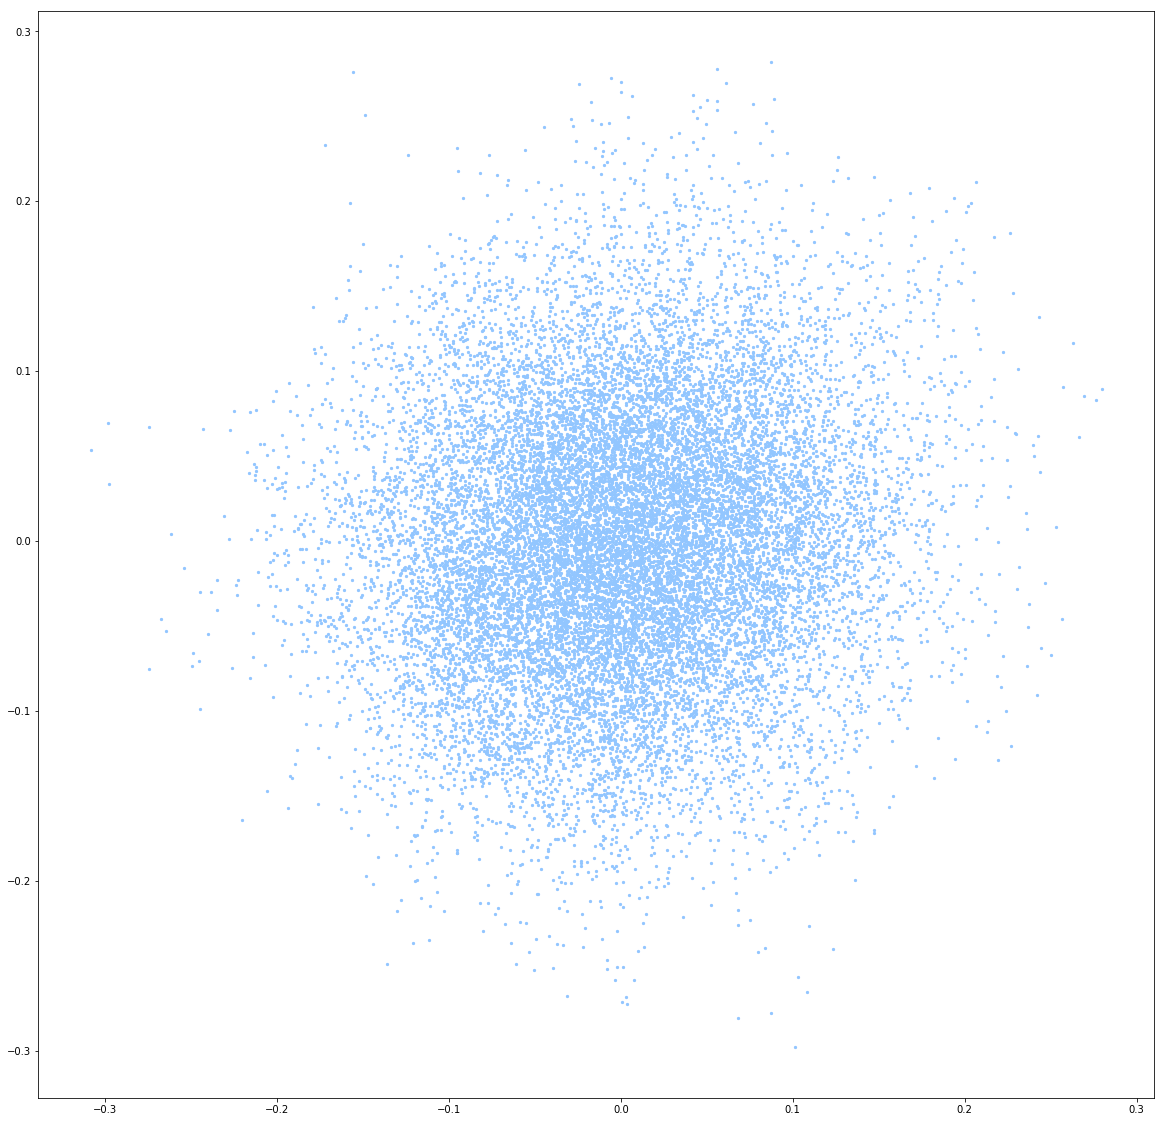

In [119]:
tt_x = data.a.residualwavefront[0][:, 349]
tt_y = data.a.residualwavefront[0][:, 350]
fig = plt.figure(figsize = (20, 20))
plt.scatter(tt_x, tt_y, s = 5)

In [105]:
data.a.ttcommands[0].shape

(19072, 2)

In [109]:
data.a.dmcommand[0].shape

(19072, 349)

In [107]:
data.a.ttstraingauge[0].shape

(19072, 3)

In [112]:
data.b.dttcentroids[0].shape

(19072, 2)

In [127]:
data.a.residualwavefront[0].shape

(19072, 352)

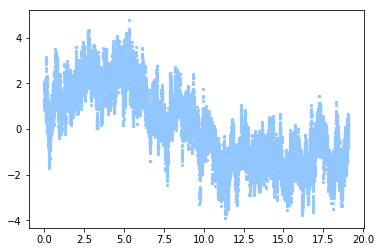

In [139]:
plt.scatter(t, data.a.dmcommand[0][:,0], s = 5)

In [140]:
data.a.residualwavefront[0][:,0].std()

0.45319256

In [141]:
data.a.dmcommand[0][:,0].std()

1.6709236

In [115]:
data.a.dtype.fields

mappingproxy({'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'timestamp': (dtype('O'), 8, 'timestamp'),
              'SUBAPINTENSITY': (dtype('O'), 16, 'subapintensity'),
              'subapintensity': (dtype('O'), 16, 'subapintensity'),
              'OFFSETCENTROID': (dtype('O'), 24, 'offsetcentroid'),
              'offsetcentroid': (dtype('O'), 24, 'offsetcentroid'),
              'RESIDUALWAVEFRONT': (dtype('O'), 32, 'residualwavefront'),
              'residualwavefront': (dtype('O'), 32, 'residualwavefront'),
              'DMCOMMAND': (dtype('O'), 40, 'dmcommand'),
              'dmcommand': (dtype('O'), 40, 'dmcommand'),
              'DMCOMMANDSCLIPPED': (dtype('O'), 48, 'dmcommandsclipped'),
              'dmcommandsclipped': (dtype('O'), 48, 'dmcommandsclipped'),
              'RESIDUALRMS': (dtype('O'), 56, 'residualrms'),
              'residualrms': (dtyp

In [141]:
data.a.ttcommands[0].shape

(19072, 2)

In [116]:
data.keys()

dict_keys(['a', 'b', 'uid', 'cid', 'nrec', 'rx', 'cent_origin', 'dm_origin', 'dtt_offset', 'tstamp_num', 'tstamp_str_start', 'cent_g', 'dm_servo', 'dt_servo', 'apd_imat', 'apd_sky_back', 'apd_threshold', 'header'])

In [117]:
data.b.dtype.fields

mappingproxy({'CONF_ID': (dtype('O'), 0, 'conf_id'),
              'conf_id': (dtype('O'), 0, 'conf_id'),
              'TIMESTAMP': (dtype('O'), 8, 'timestamp'),
              'timestamp': (dtype('O'), 8, 'timestamp'),
              'APDCOUNTS': (dtype('O'), 16, 'apdcounts'),
              'apdcounts': (dtype('O'), 16, 'apdcounts'),
              'DTTCENTROIDS': (dtype('O'), 24, 'dttcentroids'),
              'dttcentroids': (dtype('O'), 24, 'dttcentroids'),
              'DTTCOMMANDS': (dtype('O'), 32, 'dttcommands'),
              'dttcommands': (dtype('O'), 32, 'dttcommands'),
              'DTTSTRAINGAUGE': (dtype('O'), 40, 'dttstraingauge'),
              'dttstraingauge': (dtype('O'), 40, 'dttstraingauge'),
              'DTTCOMMANDSCLIPPED': (dtype('O'), 48, 'dttcommandsclipped'),
              'dttcommandsclipped': (dtype('O'), 48, 'dttcommandsclipped')})

In [139]:
data.b.dttcommands[0].shape

(19072, 2)

In [119]:
data.b.dttcentroids[0].shape

(19072, 2)

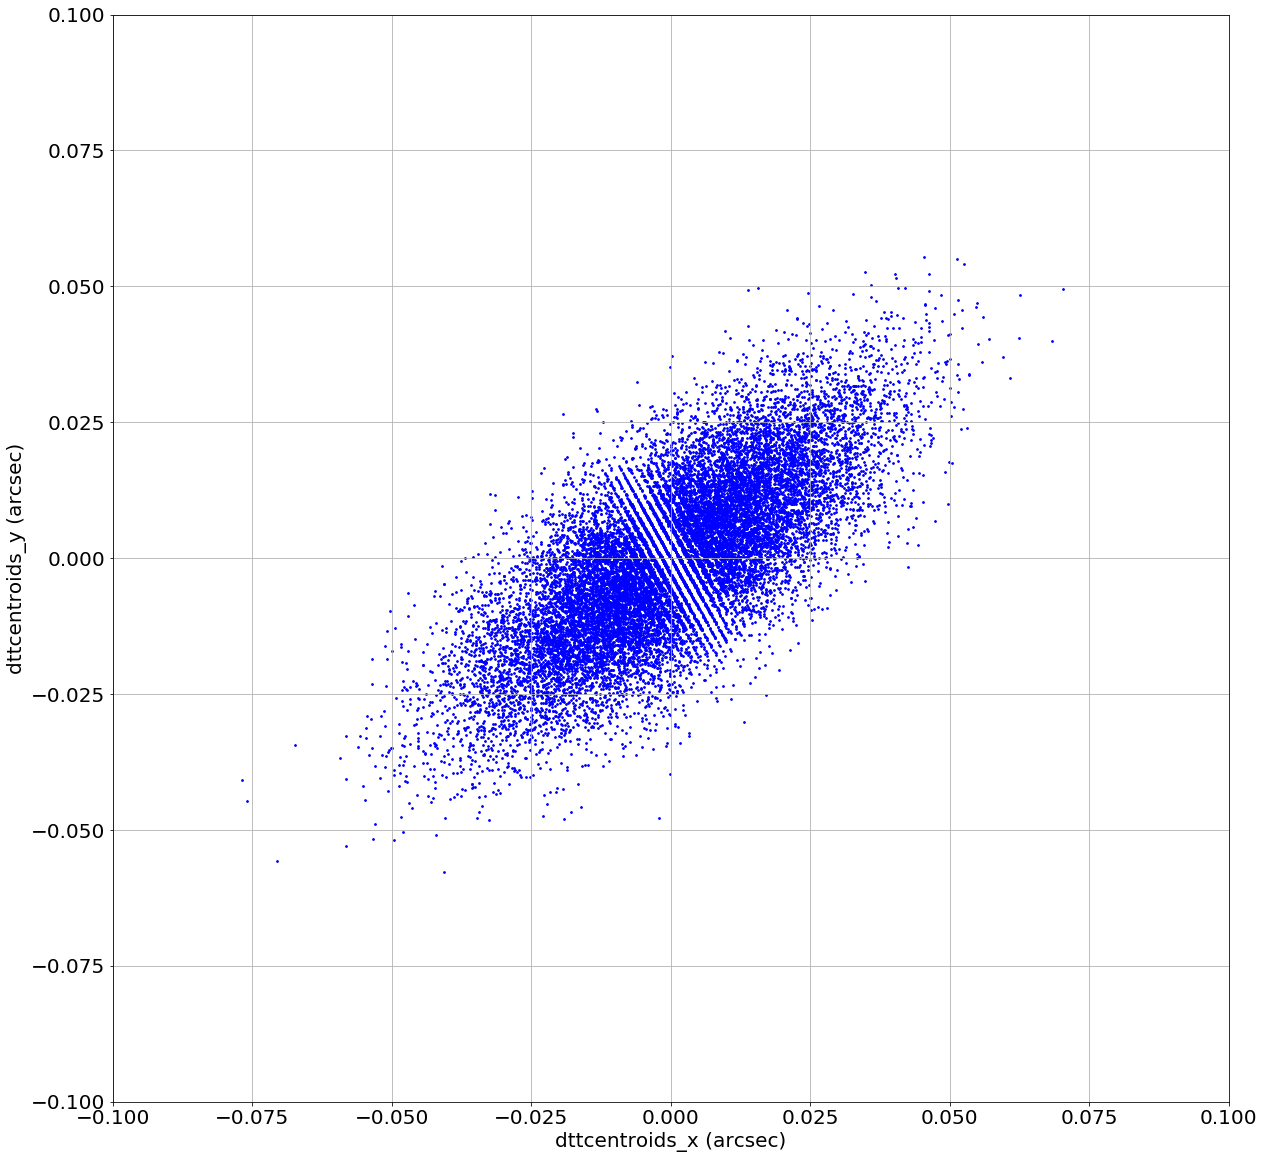

In [135]:
fig = plt.figure(figsize = (20, 20))
plt.scatter(data.b.dttcentroids[0][:, 0], data.b.dttcentroids[0][:, 1], s = 3, c = 'b')
plt.xlabel('dttcentroids_x (arcsec)', fontsize = 20)
plt.ylabel('dttcentroids_y (arcsec)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.grid()

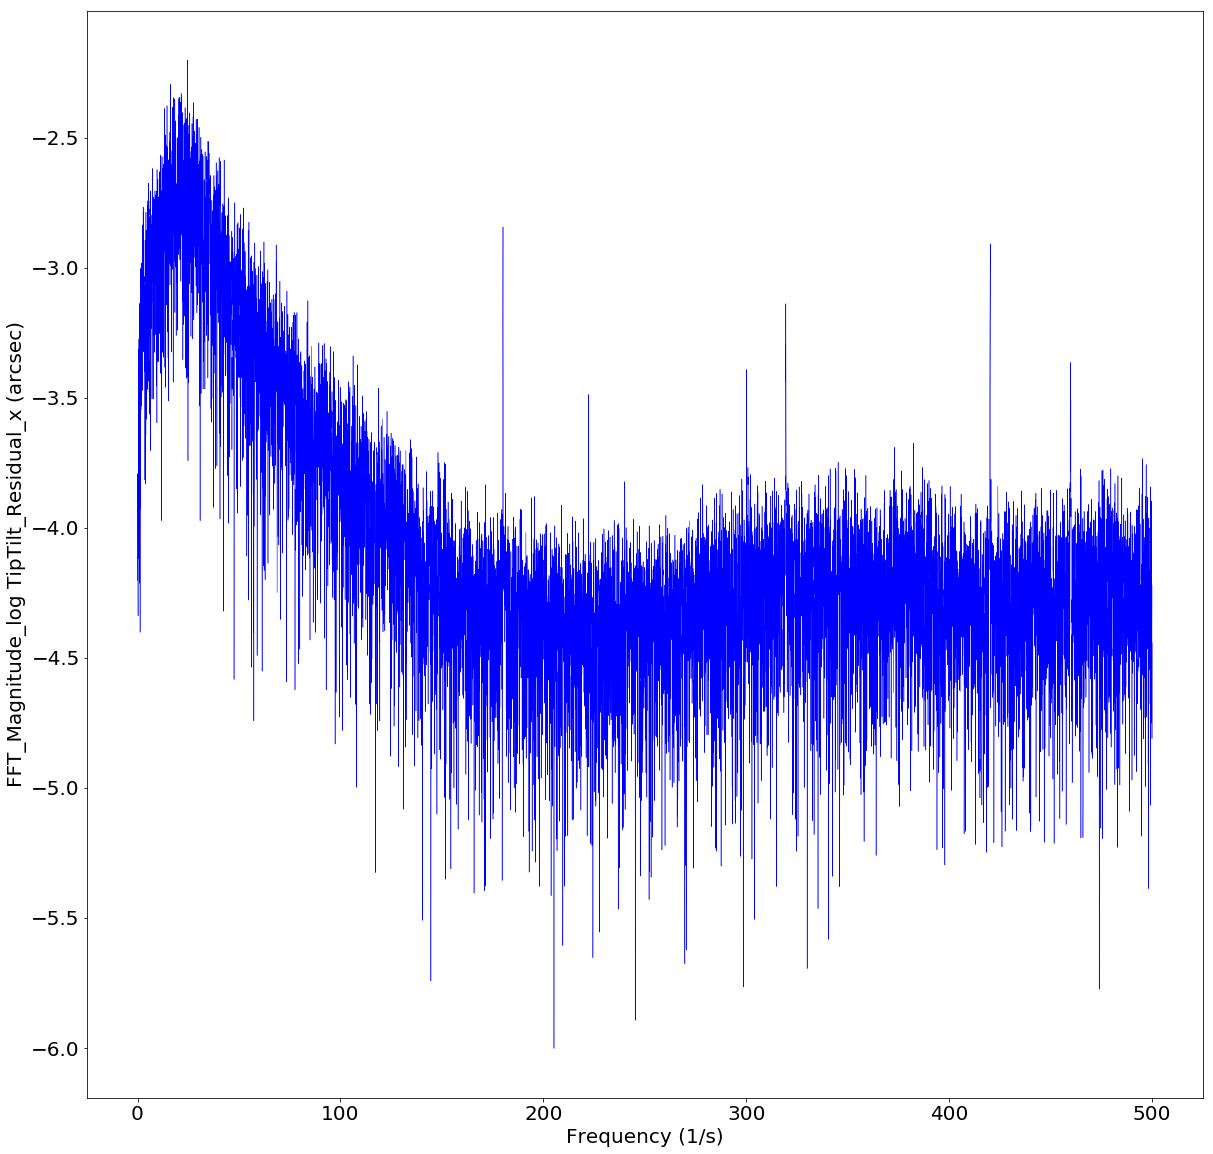

In [176]:
coef = np.fft.rfft(data.a.residualwavefront[0][:, 349])
f = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.ylabel('FFT_Magnitude_log TipTilt_Residual_x (arcsec)', fontsize = 20)
plt.xlabel('Frequency (1/s)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(f, np.log10(coef/19072), c = 'b', linewidth = 0.5)


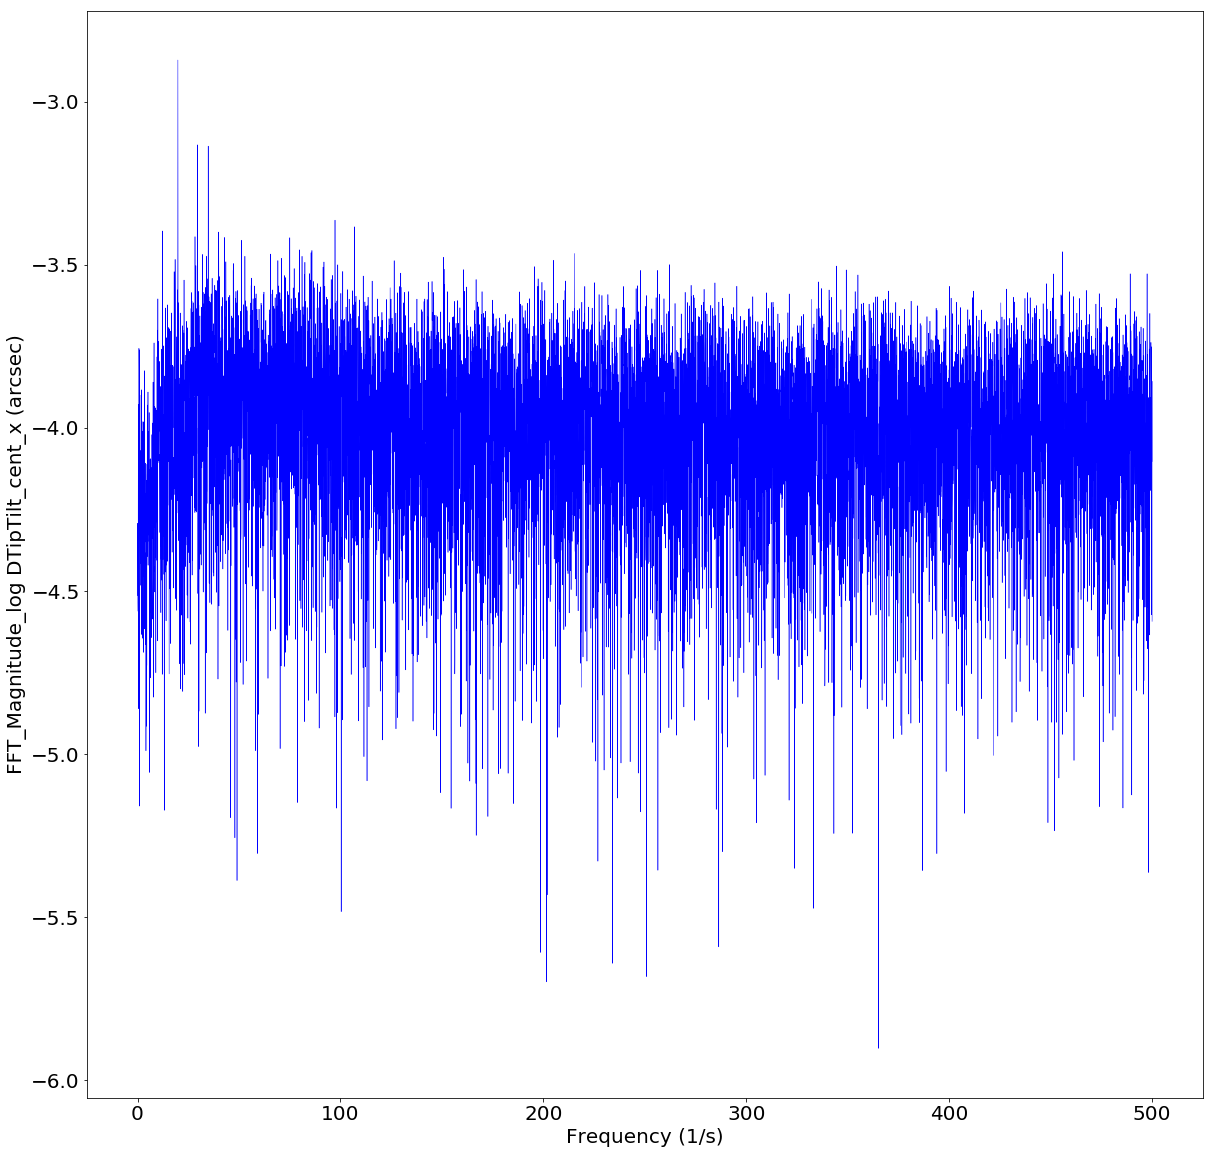

In [175]:
coef = np.fft.rfft(data.b.dttcentroids[0][:, 0])
f = np.fft.rfftfreq(t.shape[-1], d = 0.001)
fig = plt.figure(figsize = (20, 20))
plt.ylabel('FFT_Magnitude_log DTipTilt_cent_x (arcsec)', fontsize = 20)
plt.xlabel('Frequency (1/s)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(f, np.log10(coef/19072), c = 'b', linewidth = 0.5)


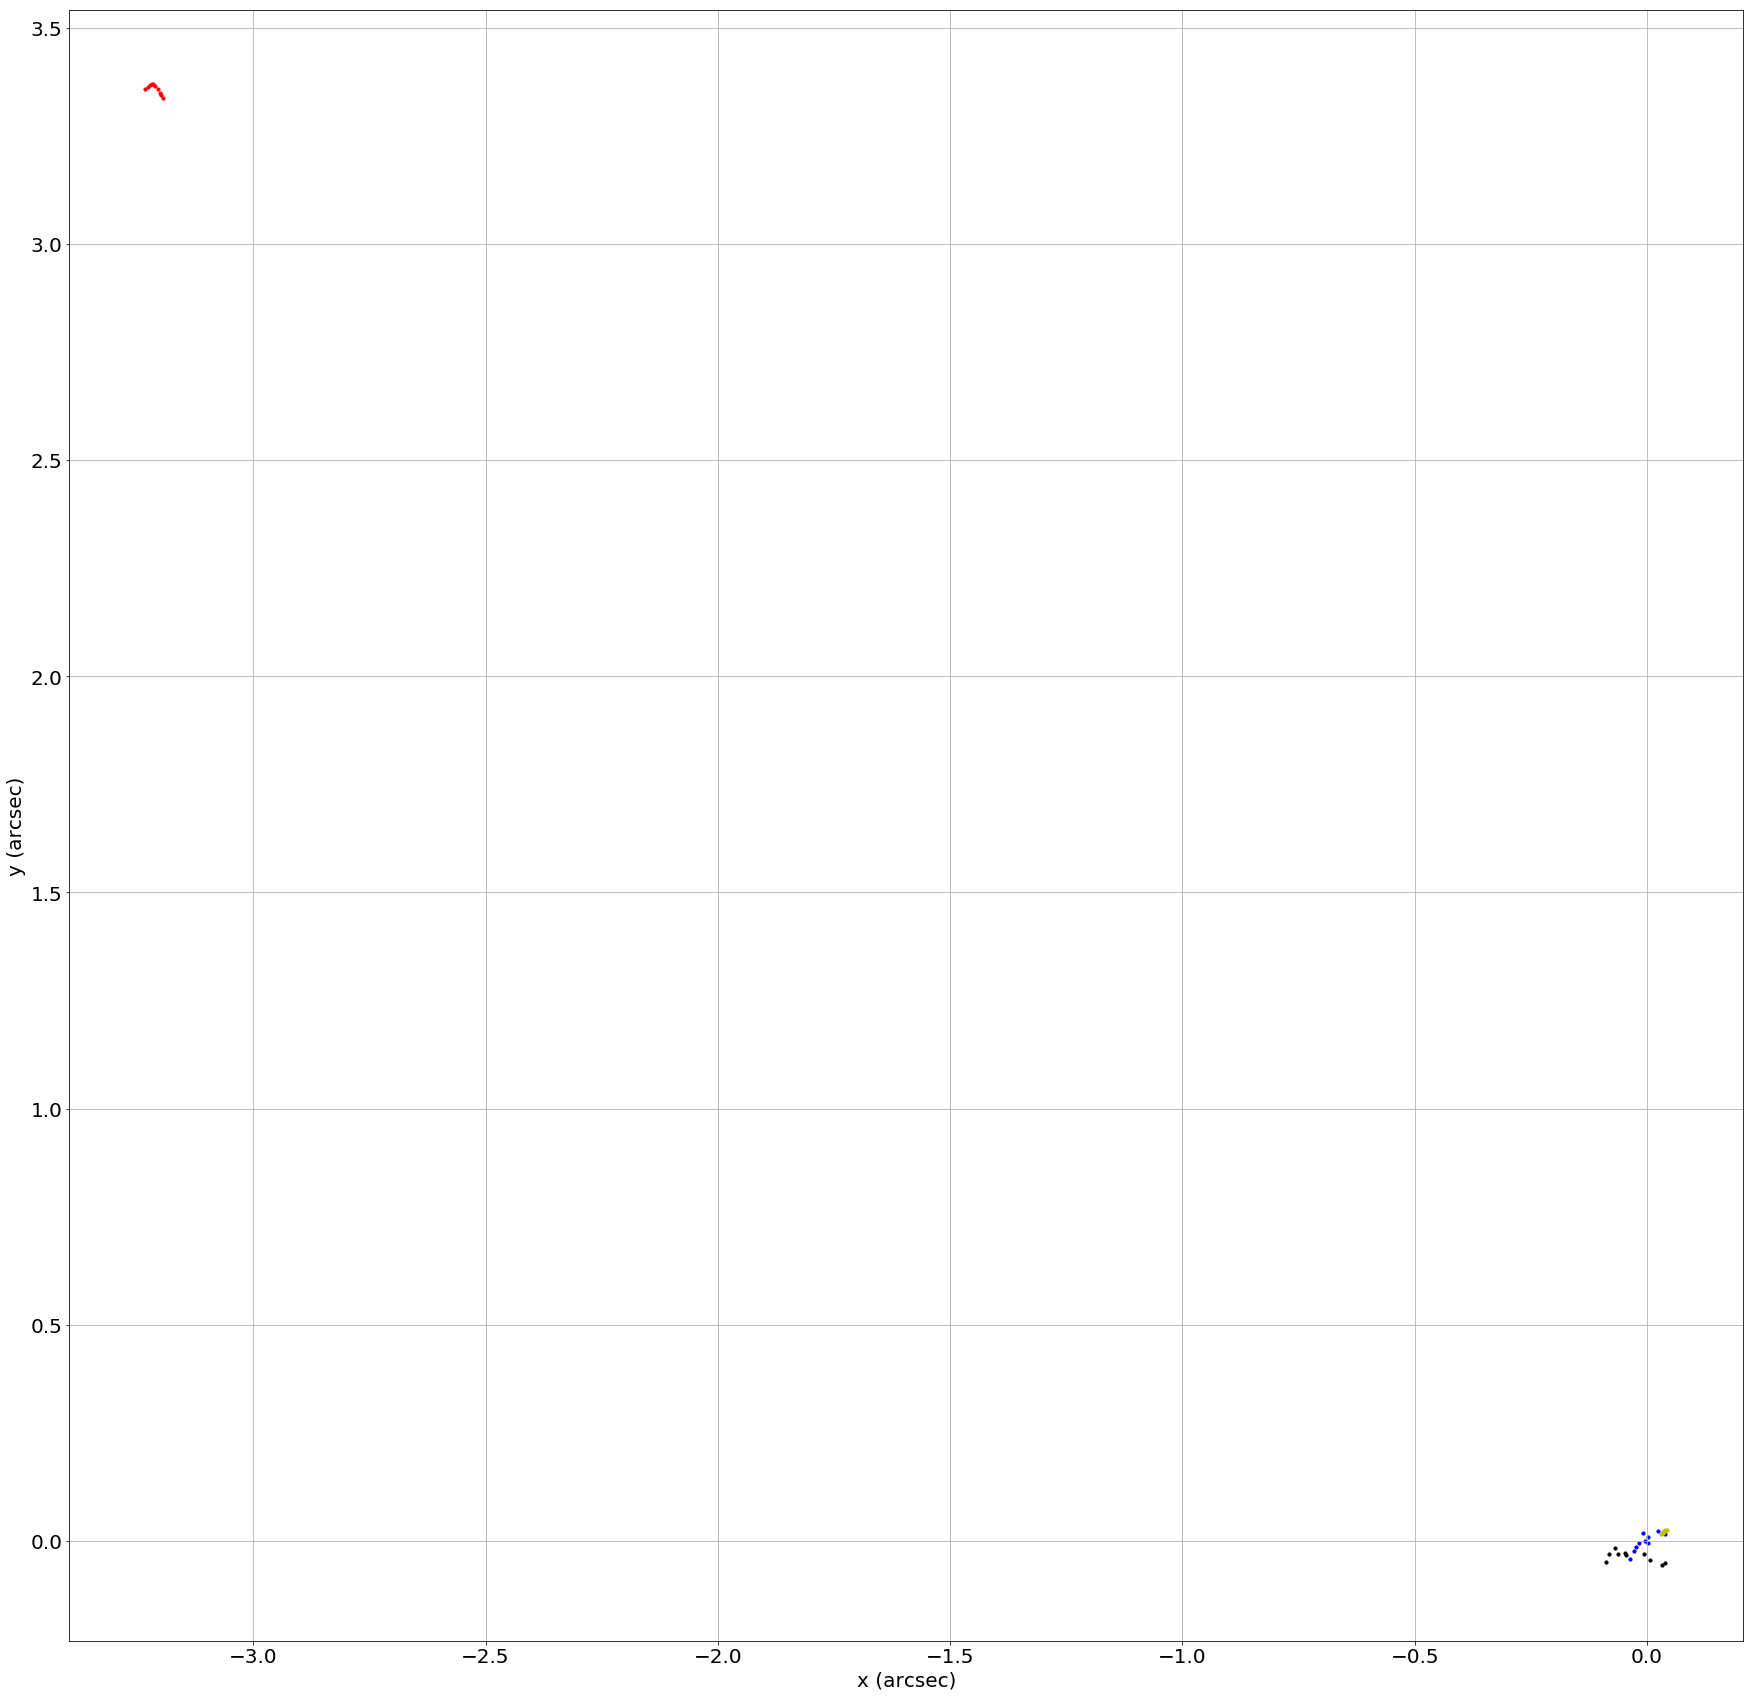

In [177]:
fig = plt.figure(figsize = (30, 30))
plt.scatter(data.b.dttcentroids[0][15000:15010, 0], data.b.dttcentroids[0][15000:15010, 1], s = 10, c = 'b')
plt.scatter(data.b.dttcommands[0][15000:15010, 0], data.b.dttcommands[0][15000:15010, 1], s = 10, c = 'y')
plt.scatter(data.a.ttcommands[0][15000:15010, 0], data.a.ttcommands[0][15000:15010, 1], s = 10, c = 'r')
plt.scatter(data.a.residualwavefront[0][15000:15010, 349], data.a.residualwavefront[0][15000:15010, 350], s = 10, c = 'k')
plt.xlabel('x (arcsec)', fontsize = 20)
plt.ylabel('y (arcsec)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.xlim(-0.1, 0.1)
#plt.ylim(-0.1, 0.1)
plt.grid()

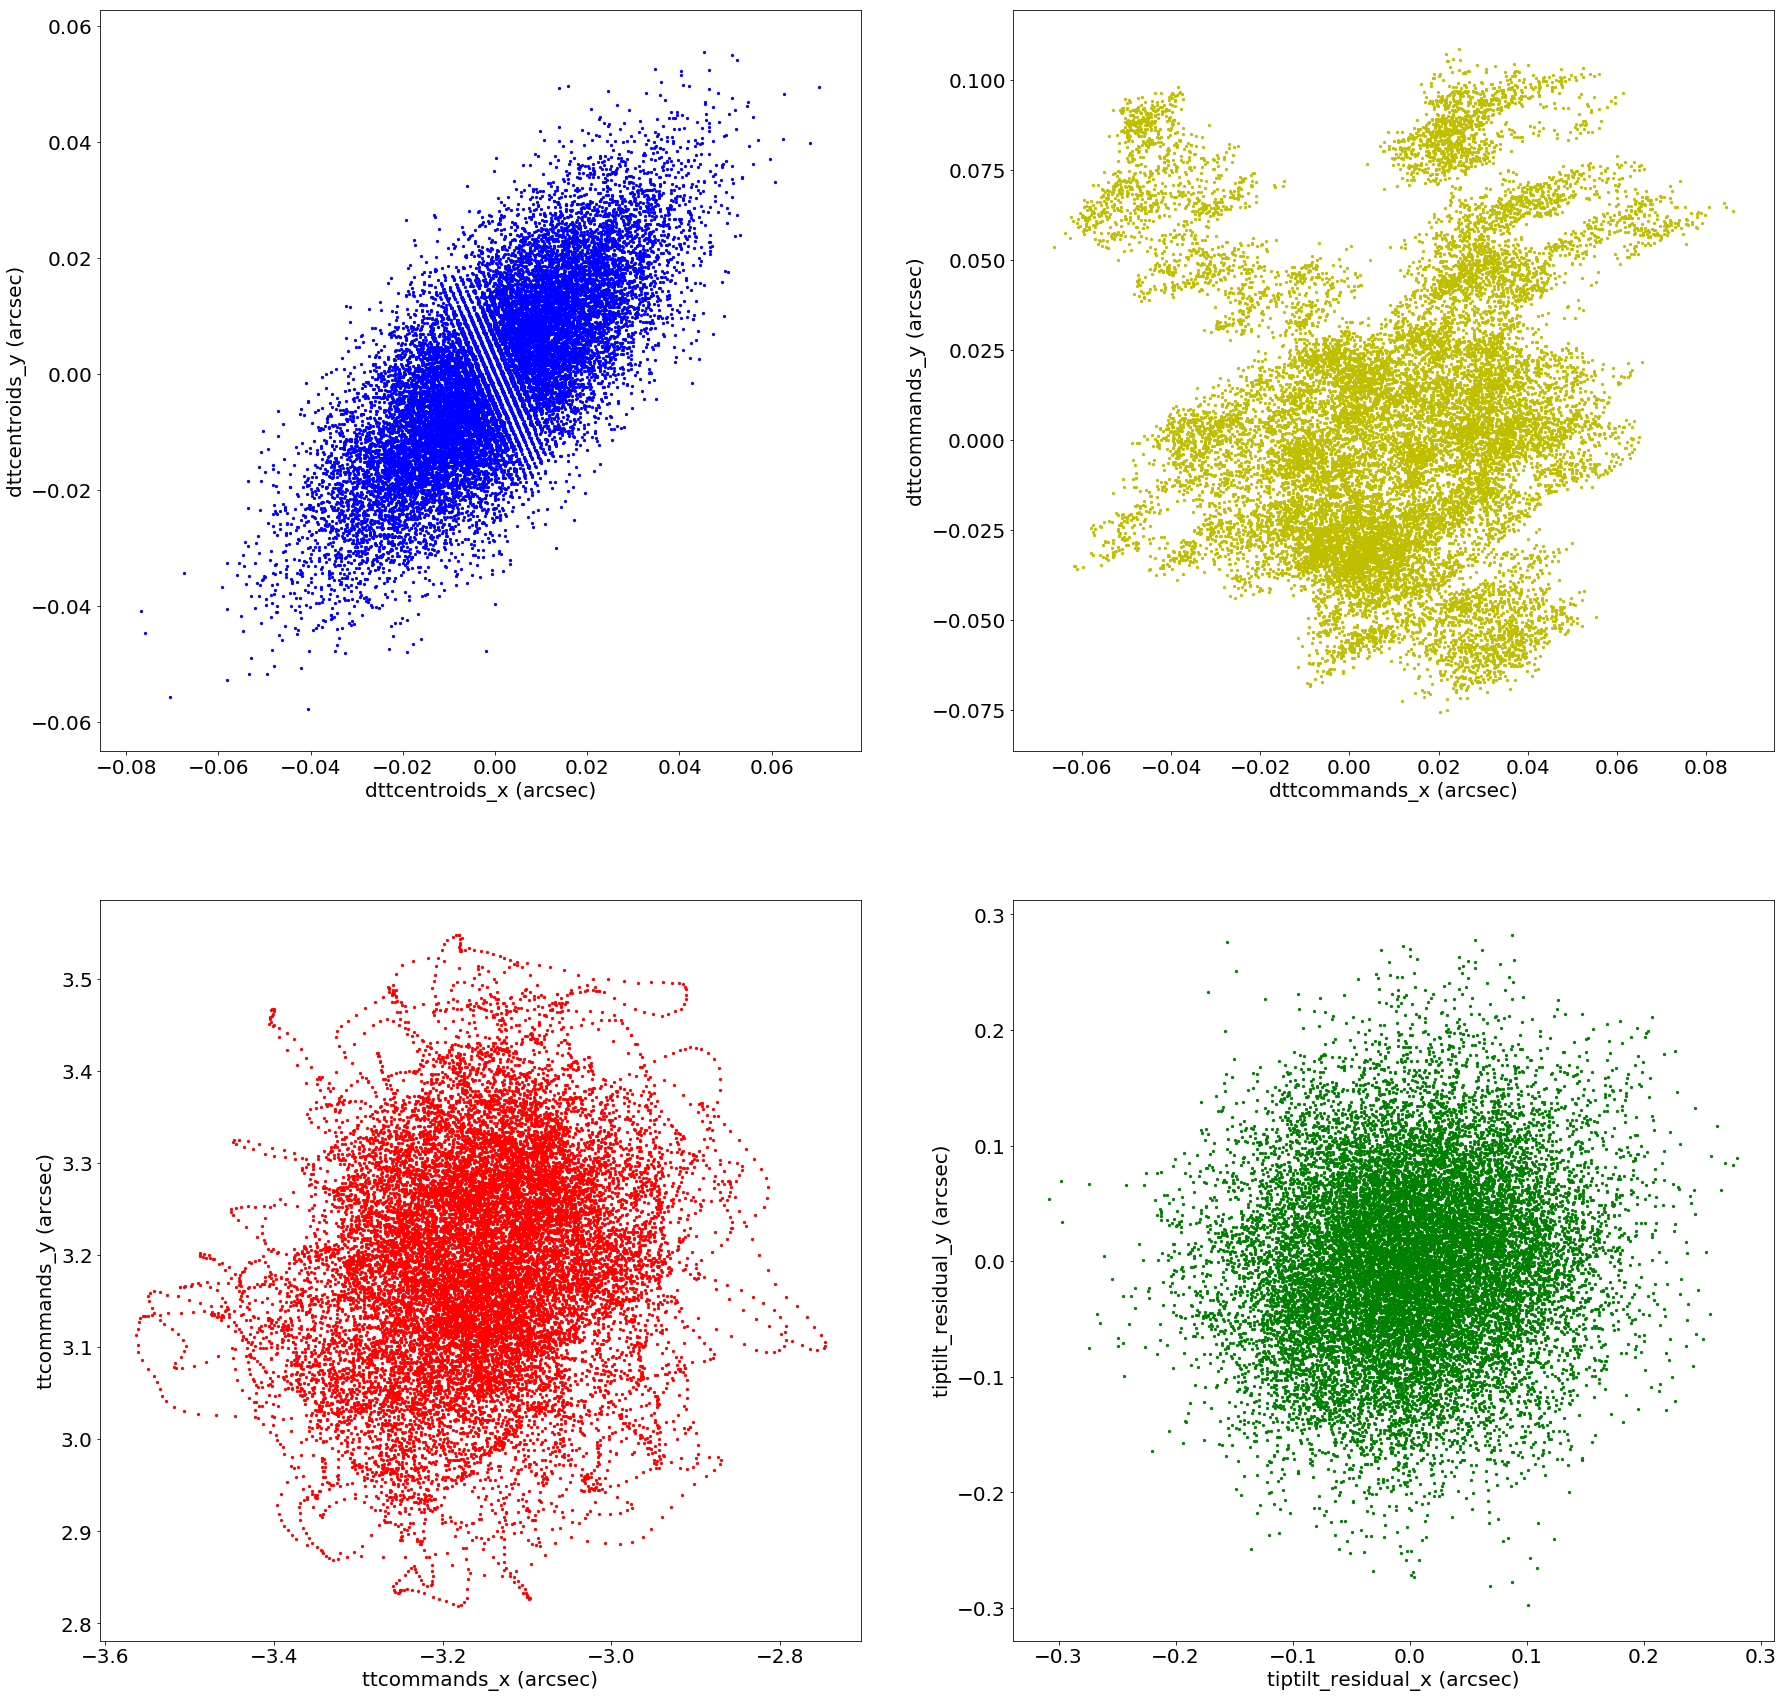

In [178]:
fig = plt.figure(figsize = (30, 30))
ax = fig.add_subplot(221)
ax.scatter(data.b.dttcentroids[0][:, 0], data.b.dttcentroids[0][:, 1], s = 5, c = 'b')
ax.set_xlabel('dttcentroids_x (arcsec)', fontsize = 20)
ax.set_ylabel('dttcentroids_y (arcsec)', fontsize = 20)
ax.tick_params(labelsize = 20)
ax = fig.add_subplot(222)
ax.scatter(data.b.dttcommands[0][:, 0], data.b.dttcommands[0][:, 1], s = 5, c = 'y')
ax.set_xlabel('dttcommands_x (arcsec)', fontsize = 20)
ax.set_ylabel('dttcommands_y (arcsec)', fontsize = 20)
ax.tick_params(labelsize = 20)
ax = fig.add_subplot(223)
ax.scatter(data.a.ttcommands[0][:, 0], data.a.ttcommands[0][:, 1], s = 5, c = 'r')
ax.set_xlabel('ttcommands_x (arcsec)', fontsize = 20)
ax.set_ylabel('ttcommands_y (arcsec)', fontsize = 20)
ax.tick_params(labelsize = 20)
ax = fig.add_subplot(224)
plt.scatter(data.a.residualwavefront[0][:, 349], data.a.residualwavefront[0][:, 350], s = 5, c = 'g')
ax.set_xlabel('tiptilt_residual_x (arcsec)', fontsize = 20)
ax.set_ylabel('tiptilt_residual_y (arcsec)', fontsize = 20)
ax.tick_params(labelsize = 20)
#plt.xlim(-0.1, 0.1)
#plt.ylim(-0.1, 0.1)
#plt.grid()